In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn import metrics

np.random.seed(5)

df=pd.read_csv('thesis_sample_100_shuffled_w_respect_to_id_Model_A.csv')

In [2]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   case_id              7100 non-null   int64  
 1   Experiment ID        7100 non-null   int64  
 2   Date Time            7100 non-null   object 
 3   time                 7100 non-null   int64  
 4   Gas Inje Cum SCTR    7100 non-null   float64
 5   cum_co2              7100 non-null   float64
 6   Water Prod Cum SCTR  7100 non-null   float64
 7   cum_brine            7100 non-null   float64
 8   i_inj                7100 non-null   int64  
 9   j_inj                7100 non-null   int64  
 10  i_pro                7100 non-null   int64  
 11  j_pro                7100 non-null   int64  
 12  k                    7100 non-null   int64  
 13  ijk_inj              7100 non-null   object 
 14  ijk_pro              7100 non-null   object 
 15  distance             7100 non-null   f

,case_id,Experiment ID,time,Gas Inje Cum SCTR,cum_co2,Water Prod Cum SCTR,cum_brine,i_inj,j_inj,i_pro,...,por3_pro,por4_pro,por5_pro,por6_pro,por7_pro,por8_pro,por9_pro,por10_pro,por11_pro,por12_pro
count,7100.000000,7100.000000,7100.000000,7.100000e+03,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,...,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000
mean,50.500000,372.220000,1095.492958,5.065765e+07,0.050658,117684.886631,0.117685,49.340000,88.060000,44.030000,...,0.322692,0.302917,0.251244,0.042201,0.151398,0.110634,0.043510,0.101082,0.094218,0.114990
std,28.868103,215.827413,623.816256,3.127186e+07,0.031272,103635.381933,0.103635,22.006649,32.304232,21.871362,...,0.022489,0.032085,0.032095,0.020304,0.047372,0.056237,0.019472,0.054633,0.058128,0.043888
min,1.000000,30.000000,31.000000,1.000352e+06,0.001000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.232294,0.198870,0.168496,0.011496,0.028061,0.011101,0.010377,0.011100,0.011100,0.011100
25%,25.750000,176.500000,547.000000,2.445799e+07,0.024458,26708.427500,0.026708,34.000000,65.750000,26.750000,...,0.311636,0.278293,0.232332,0.023597,0.122165,0.066971,0.026541,0.058052,0.033142,0.084602
50%,50.500000,365.500000,1096.000000,4.346827e+07,0.043468,91441.910000,0.091442,49.500000,92.500000,44.000000,...,0.334107,0.311130,0.259593,0.041357,0.158317,0.118826,0.040434,0.107728,0.102730,0.126339
75%,75.250000,586.000000,1643.000000,6.921627e+07,0.069216,178301.985000,0.178302,68.000000,113.250000,61.250000,...,0.339900,0.329602,0.276931,0.058516,0.186858,0.156496,0.060423,0.145863,0.152218,0.153029
max,100.000000,716.000000,2161.000000,1.680000e+08,0.168000,526227.380000,0.526227,95.000000,152.000000,95.000000,...,0.339900,0.339900,0.290151,0.079067,0.218336,0.196004,0.079772,0.182511,0.174827,0.168289


In [3]:
#this converts the panda dataframe into ndarray using function to_numpy
x=df[['i_inj','j_inj','i_pro','j_pro','time',
      'k1_inj','k2_inj','k3_inj','k4_inj','k5_inj','k6_inj',
      'k7_inj','k8_inj','k9_inj','k10_inj','k11_inj','k12_inj',
      'k1_pro','k2_pro','k3_pro','k4_pro','k5_pro','k6_pro',
      'k7_pro','k8_pro','k9_pro','k10_pro','k11_pro','k12_pro',
      'por1_inj','por2_inj','por3_inj','por4_inj','por5_inj','por6_inj',
      'por7_inj','por8_inj','por9_inj','por10_inj','por11_inj','por12_inj',
      'por1_pro','por2_pro','por3_pro','por4_pro','por5_pro','por6_pro',
      'por7_pro','por8_pro','por9_pro','por10_pro','por11_pro','por12_pro',
      'min_distance_inj','distance']].to_numpy() 

#same as above converted to nd array using to_numpy function
y=df[['cum_co2']].to_numpy() 

pd.DataFrame(x).describe(),pd.DataFrame(y).describe()

(                0            1            2            3            4   \
 count  7100.000000  7100.000000  7100.000000  7100.000000  7100.000000   
 mean     49.340000    88.060000    44.030000    91.250000  1095.492958   
 std      22.006649    32.304232    21.871362    34.052178   623.816256   
 min       1.000000     1.000000     1.000000     1.000000    31.000000   
 25%      34.000000    65.750000    26.750000    65.750000   547.000000   
 50%      49.500000    92.500000    44.000000    97.500000  1096.000000   
 75%      68.000000   113.250000    61.250000   117.000000  1643.000000   
 max      95.000000   152.000000    95.000000   152.000000  2161.000000   
 
                 5            6            7            8            9   ...  \
 count  7100.000000  7100.000000  7100.000000  7100.000000  7100.000000  ...   
 mean      0.010244   220.122031   277.623716   193.876243    59.050712  ...   
 std       0.009538   133.162587   119.037944   110.715096    36.263130  ...   
 mi

In [5]:
#test dataset read and prepare
test_last_timesteps=pd.read_csv('thesis_testing_data_last_timesteps.csv')
test_last_timesteps=test_last_timesteps.dropna()
test_last_timesteps_data=test_last_timesteps[['i_inj','j_inj','i_pro','j_pro','time',
      'k1_inj','k2_inj','k3_inj','k4_inj','k5_inj','k6_inj',
      'k7_inj','k8_inj','k9_inj','k10_inj','k11_inj','k12_inj',
      'k1_pro','k2_pro','k3_pro','k4_pro','k5_pro','k6_pro',
      'k7_pro','k8_pro','k9_pro','k10_pro','k11_pro','k12_pro',
      'por1_inj','por2_inj','por3_inj','por4_inj','por5_inj','por6_inj',
      'por7_inj','por8_inj','por9_inj','por10_inj','por11_inj','por12_inj',
      'por1_pro','por2_pro','por3_pro','por4_pro','por5_pro','por6_pro',
      'por7_pro','por8_pro','por9_pro','por10_pro','por11_pro','por12_pro',
      'min_distance_inj','distance']].to_numpy()

test_last_timesteps_actual=test_last_timesteps[['cum_co2']].to_numpy()

In [6]:
scaler=MinMaxScaler()
train_data=scaler.fit_transform(x) # it is important to fit the scaler into training set only
pd.DataFrame(train_data).describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,...,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000
mean,0.514255,0.576556,0.457766,0.597682,0.499762,0.363390,0.551650,0.694888,0.478037,0.447244,...,0.680187,0.454410,0.648207,0.538297,0.477462,0.524949,0.507664,0.660922,0.377471,0.310376
std,0.234113,0.213935,0.232674,0.225511,0.292871,0.406748,0.357945,0.332316,0.299362,0.282358,...,0.263818,0.300488,0.248963,0.304143,0.280599,0.318724,0.355029,0.279207,0.260036,0.190740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.351064,0.428808,0.273936,0.428808,0.242254,0.000000,0.207456,0.436862,0.210355,0.173097,...,0.524735,0.179088,0.494571,0.302157,0.232927,0.273913,0.134627,0.467601,0.159865,0.160292
50%,0.515957,0.605960,0.457447,0.639073,0.500000,0.155986,0.549215,0.825989,0.440795,0.468305,...,0.748820,0.441923,0.684568,0.582604,0.433135,0.563722,0.559654,0.733122,0.345733,0.293409
75%,0.712766,0.743377,0.640957,0.768212,0.756808,0.819311,0.958430,1.000000,0.708521,0.726836,...,0.891333,0.695869,0.834566,0.786330,0.721175,0.786200,0.861913,0.902917,0.590105,0.415650
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
test_last_timesteps_data=scaler.transform(test_last_timesteps_data)
pd.DataFrame(test_last_timesteps_data).describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.463830,0.601325,0.412234,0.638742,1.0,0.377560,0.520018,0.695363,0.590217,0.608306,...,0.697334,0.362745,0.709062,0.567556,0.413713,0.500425,0.469866,0.596233,0.304577,0.288334
std,0.248567,0.248095,0.242317,0.186380,0.0,0.449280,0.372769,0.342305,0.341573,0.251039,...,0.308221,0.268387,0.240356,0.265370,0.239621,0.347561,0.374965,0.276561,0.232634,0.146458
min,0.031915,0.192053,0.053191,0.264901,1.0,0.000000,-0.002761,0.103082,0.061525,0.191831,...,0.009455,0.059320,0.228752,0.000003,0.070188,0.000000,0.000000,0.085276,0.000000,0.012347
25%,0.239362,0.403974,0.215426,0.556291,1.0,0.000000,0.201070,0.501612,0.263864,0.430902,...,0.478004,0.172143,0.575274,0.433479,0.262843,0.286081,0.053111,0.418330,0.081916,0.201063
50%,0.494681,0.692053,0.398936,0.655629,1.0,0.052921,0.428200,0.806653,0.581024,0.608010,...,0.826599,0.273878,0.817063,0.631584,0.375338,0.400747,0.644403,0.649365,0.232080,0.307174
75%,0.630319,0.807947,0.614362,0.807947,1.0,0.872204,0.949432,1.000000,1.000000,0.790396,...,0.963784,0.494889,0.896879,0.759294,0.539844,0.855726,0.793049,0.809030,0.466612,0.389881
max,0.872340,0.966887,0.829787,0.887417,1.0,1.000016,1.000000,1.000000,1.000000,1.022174,...,0.998784,1.000731,0.968118,0.930716,0.972797,0.996243,0.945853,0.964590,0.735272,0.518309


In [9]:
train_targets=y

pd.DataFrame(train_targets).describe()

,0
count,7100.000000
mean,0.050658
std,0.031272
min,0.001000
25%,0.024458
50%,0.043468
75%,0.069216
max,0.168000


In [10]:
def converter(params):
    #convert the best solution into a layer sizes, integer values from floats
    # transform the layer sizes from float (possibly negative) values into hiddenLayerSizes tuple:
    if round(params[3]) <= 0:
        hiddenLayerSizes = round(params[2]),
    elif round(params[4]) <= 0:
        hiddenLayerSizes = (round(params[2]), round(params[3]))
    elif round(params[5]) <= 0:
        hiddenLayerSizes = (round(params[2]), round(params[3]), round(params[4]))
    elif round(params[6]) <= 0:
        hiddenLayerSizes = (round(params[2]), round(params[3]), round(params[4]), round(params[5]) )
    elif round(params[7]) <= 0:
        hiddenLayerSizes = (round(params[2]), round(params[3]), round(params[4]), round(params[5]),
                           round(params[6]))
    elif round(params[8]) <= 0:
        hiddenLayerSizes = (round(params[2]), round(params[3]), round(params[4]), round(params[5]),
                           round(params[6]),round(params[7]))
    elif round(params[9]) <= 0:
        hiddenLayerSizes = (round(params[2]), round(params[3]), round(params[4]), round(params[5]),
                           round(params[6]),round(params[7]),round(params[8]))
    elif round(params[10]) <= 0:
        hiddenLayerSizes = (round(params[2]), round(params[3]), round(params[4]), round(params[5]),
                           round(params[6]),round(params[7]),round(params[8]),round(params[9]))
    elif round(params[11]) <= 0:
        hiddenLayerSizes = (round(params[2]), round(params[3]), round(params[4]), round(params[5]),
                           round(params[6]),round(params[7]),round(params[8]),round(params[9]),
                           round(params[10]))
    else :
        hiddenLayerSizes = (round(params[2]), round(params[3]), round(params[4]), round(params[5]),
                           round(params[6]),round(params[7]),round(params[8]),round(params[9]),
                           round(params[10]),round(params[11]))

    return hiddenLayerSizes

In [11]:
def build_model(individuals):
    # transform the layer sizes from float (possibly negative) values into hiddenLayerSizes tuple:
    hiddenLayerSizes=converter(individuals)
    #print (hiddenLayerSizes,len(hiddenLayerSizes))
    
    from keras.models import Sequential
    from keras.layers import Activation, Dense, Dropout
    
    model = keras.Sequential()
    model.add(keras.layers.Dense(hiddenLayerSizes[0],input_dim=train_data.shape[1],activation='relu'))
    
    
    if len(hiddenLayerSizes)>1:
        for i in range(len(hiddenLayerSizes)-1):
            model.add(keras.layers.Dense(hiddenLayerSizes[i+1],activation='relu')) #hidden layer generator loop
    else:
        pass
    
    #print ('learning_rate',individuals[1])
    learning_rate=individuals[1]
    print ('learning_rate',learning_rate)
    

    
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse', metrics=['mae'],
                  optimizer=tf.keras.optimizers.Adam(learning_rate))  
    
    model.summary()
    
    return model

In [12]:
#optimal architecture

parameters=[ 32, 1e-03,
             99, 73, 63, 10, 41,-1]

In [13]:
def k_fold_validation(individual):
 
    num_epochs = 2000
    k = 4
    num_val_samples = len(train_data) // k
    print('num_val_samples:',num_val_samples)
    all_scores = []
    all_mae_histories = []
    
    batch_size=round(individual[0])
    print ('batch_size:',batch_size)
    
    for i in range(k):
        print(f"Processing fold #{i}")    
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]     
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]    
        partial_train_data = np.concatenate([train_data[:i * num_val_samples],         
                                                 train_data[(i + 1) * num_val_samples:]],axis=0)    
        partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],         
                                                    train_targets[(i + 1) * num_val_samples:]],axis=0)   
        
        model = build_model(individual)
    
        history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=batch_size, verbose=2, callbacks=None)  
        
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)
        
        mae_history = history.history["val_mae"]    
        all_mae_histories.append(mae_history)
        
    f=np.mean(all_scores)
    all_mae_histories
    return batch_size, num_epochs, all_mae_histories

In [14]:
batch_size, num_epochs, all_mae_histories= k_fold_validation(parameters)

num_val_samples: 1775
batch_size: 32
Processing fold #0
learning_rate 0.001
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 99)                5544      
_________________________________________________________________
dense_1 (Dense)              (None, 73)                7300      
_________________________________________________________________
dense_2 (Dense)              (None, 63)                4662      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 41)                451       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 42        
Total params: 18,639
Trainable params: 18,639


167/167 - 1s - loss: 5.3935e-06 - mae: 0.0017 - val_loss: 4.8830e-04 - val_mae: 0.0160
Epoch 71/2000
167/167 - 1s - loss: 3.8899e-06 - mae: 0.0015 - val_loss: 4.9838e-04 - val_mae: 0.0164
Epoch 72/2000
167/167 - 1s - loss: 5.4146e-06 - mae: 0.0018 - val_loss: 4.8470e-04 - val_mae: 0.0163
Epoch 73/2000
167/167 - 1s - loss: 2.9243e-06 - mae: 0.0013 - val_loss: 4.8136e-04 - val_mae: 0.0160
Epoch 74/2000
167/167 - 1s - loss: 1.6305e-06 - mae: 9.5928e-04 - val_loss: 4.6470e-04 - val_mae: 0.0158
Epoch 75/2000
167/167 - 1s - loss: 2.1167e-06 - mae: 0.0011 - val_loss: 4.7561e-04 - val_mae: 0.0159
Epoch 76/2000
167/167 - 1s - loss: 2.6712e-06 - mae: 0.0012 - val_loss: 4.8447e-04 - val_mae: 0.0162
Epoch 77/2000
167/167 - 1s - loss: 3.4554e-06 - mae: 0.0014 - val_loss: 4.7491e-04 - val_mae: 0.0157
Epoch 78/2000
167/167 - 1s - loss: 2.0499e-06 - mae: 0.0011 - val_loss: 4.6900e-04 - val_mae: 0.0158
Epoch 79/2000
167/167 - 1s - loss: 2.5054e-06 - mae: 0.0012 - val_loss: 4.6784e-04 - val_mae: 0.0157


Epoch 150/2000
167/167 - 1s - loss: 8.8967e-07 - mae: 6.9927e-04 - val_loss: 4.7706e-04 - val_mae: 0.0152
Epoch 151/2000
167/167 - 1s - loss: 1.1118e-06 - mae: 7.8756e-04 - val_loss: 4.6628e-04 - val_mae: 0.0150
Epoch 152/2000
167/167 - 1s - loss: 4.4246e-06 - mae: 0.0015 - val_loss: 4.6576e-04 - val_mae: 0.0151
Epoch 153/2000
167/167 - 1s - loss: 1.7989e-06 - mae: 9.9342e-04 - val_loss: 4.7336e-04 - val_mae: 0.0151
Epoch 154/2000
167/167 - 1s - loss: 2.2291e-06 - mae: 0.0011 - val_loss: 4.6155e-04 - val_mae: 0.0150
Epoch 155/2000
167/167 - 1s - loss: 1.4788e-06 - mae: 8.7927e-04 - val_loss: 4.5816e-04 - val_mae: 0.0151
Epoch 156/2000
167/167 - 1s - loss: 8.0032e-07 - mae: 6.6886e-04 - val_loss: 4.6579e-04 - val_mae: 0.0152
Epoch 157/2000
167/167 - 1s - loss: 5.8125e-07 - mae: 5.6457e-04 - val_loss: 4.6723e-04 - val_mae: 0.0151
Epoch 158/2000
167/167 - 1s - loss: 1.5209e-06 - mae: 9.0798e-04 - val_loss: 4.6748e-04 - val_mae: 0.0152
Epoch 159/2000
167/167 - 1s - loss: 9.1720e-07 - mae: 

167/167 - 1s - loss: 1.9580e-06 - mae: 9.8017e-04 - val_loss: 4.3204e-04 - val_mae: 0.0145
Epoch 229/2000
167/167 - 1s - loss: 1.2587e-06 - mae: 8.2549e-04 - val_loss: 4.4343e-04 - val_mae: 0.0146
Epoch 230/2000
167/167 - 1s - loss: 9.9527e-07 - mae: 7.4118e-04 - val_loss: 4.4069e-04 - val_mae: 0.0147
Epoch 231/2000
167/167 - 1s - loss: 1.7764e-06 - mae: 9.8287e-04 - val_loss: 4.4382e-04 - val_mae: 0.0146
Epoch 232/2000
167/167 - 1s - loss: 1.7113e-06 - mae: 9.4334e-04 - val_loss: 4.5780e-04 - val_mae: 0.0148
Epoch 233/2000
167/167 - 1s - loss: 4.1992e-07 - mae: 4.7270e-04 - val_loss: 4.5116e-04 - val_mae: 0.0149
Epoch 234/2000
167/167 - 1s - loss: 5.0111e-07 - mae: 5.0608e-04 - val_loss: 4.5468e-04 - val_mae: 0.0147
Epoch 235/2000
167/167 - 1s - loss: 7.5387e-07 - mae: 6.3382e-04 - val_loss: 4.4081e-04 - val_mae: 0.0146
Epoch 236/2000
167/167 - 1s - loss: 5.8139e-07 - mae: 5.5750e-04 - val_loss: 4.4867e-04 - val_mae: 0.0146
Epoch 237/2000
167/167 - 1s - loss: 1.6288e-06 - mae: 8.7634e

Epoch 306/2000
167/167 - 1s - loss: 3.0481e-07 - mae: 4.0538e-04 - val_loss: 4.2408e-04 - val_mae: 0.0141
Epoch 307/2000
167/167 - 1s - loss: 2.6922e-07 - mae: 3.8368e-04 - val_loss: 4.2742e-04 - val_mae: 0.0141
Epoch 308/2000
167/167 - 1s - loss: 3.4471e-07 - mae: 4.2542e-04 - val_loss: 4.3367e-04 - val_mae: 0.0144
Epoch 309/2000
167/167 - 1s - loss: 8.6554e-07 - mae: 6.8666e-04 - val_loss: 4.2404e-04 - val_mae: 0.0141
Epoch 310/2000
167/167 - 1s - loss: 6.9860e-07 - mae: 6.2248e-04 - val_loss: 4.2865e-04 - val_mae: 0.0143
Epoch 311/2000
167/167 - 1s - loss: 9.3806e-07 - mae: 7.0699e-04 - val_loss: 4.2359e-04 - val_mae: 0.0141
Epoch 312/2000
167/167 - 1s - loss: 9.2559e-07 - mae: 7.1034e-04 - val_loss: 4.3320e-04 - val_mae: 0.0142
Epoch 313/2000
167/167 - 1s - loss: 5.5650e-07 - mae: 5.4442e-04 - val_loss: 4.2344e-04 - val_mae: 0.0142
Epoch 314/2000
167/167 - 1s - loss: 7.5566e-07 - mae: 6.3636e-04 - val_loss: 4.2000e-04 - val_mae: 0.0140
Epoch 315/2000
167/167 - 1s - loss: 1.4281e-06

Epoch 384/2000
167/167 - 1s - loss: 1.8728e-06 - mae: 9.5571e-04 - val_loss: 4.4446e-04 - val_mae: 0.0146
Epoch 385/2000
167/167 - 1s - loss: 6.7400e-07 - mae: 5.8140e-04 - val_loss: 4.3191e-04 - val_mae: 0.0143
Epoch 386/2000
167/167 - 1s - loss: 2.3455e-07 - mae: 3.5074e-04 - val_loss: 4.3682e-04 - val_mae: 0.0144
Epoch 387/2000
167/167 - 1s - loss: 1.0941e-06 - mae: 7.2358e-04 - val_loss: 4.4270e-04 - val_mae: 0.0144
Epoch 388/2000
167/167 - 1s - loss: 3.2725e-07 - mae: 4.1887e-04 - val_loss: 4.3833e-04 - val_mae: 0.0144
Epoch 389/2000
167/167 - 1s - loss: 3.2302e-07 - mae: 4.1397e-04 - val_loss: 4.2902e-04 - val_mae: 0.0142
Epoch 390/2000
167/167 - 1s - loss: 3.7676e-07 - mae: 4.4596e-04 - val_loss: 4.2560e-04 - val_mae: 0.0141
Epoch 391/2000
167/167 - 1s - loss: 6.0044e-07 - mae: 5.6155e-04 - val_loss: 4.2664e-04 - val_mae: 0.0142
Epoch 392/2000
167/167 - 1s - loss: 7.6724e-07 - mae: 6.4752e-04 - val_loss: 4.3246e-04 - val_mae: 0.0143
Epoch 393/2000
167/167 - 1s - loss: 1.0042e-06

Epoch 462/2000
167/167 - 1s - loss: 4.1264e-07 - mae: 4.4871e-04 - val_loss: 4.3168e-04 - val_mae: 0.0142
Epoch 463/2000
167/167 - 1s - loss: 1.6380e-06 - mae: 9.1199e-04 - val_loss: 4.2433e-04 - val_mae: 0.0141
Epoch 464/2000
167/167 - 1s - loss: 6.9726e-07 - mae: 5.9127e-04 - val_loss: 4.2296e-04 - val_mae: 0.0141
Epoch 465/2000
167/167 - 1s - loss: 3.2924e-07 - mae: 4.1431e-04 - val_loss: 4.2342e-04 - val_mae: 0.0141
Epoch 466/2000
167/167 - 1s - loss: 4.0373e-07 - mae: 4.5127e-04 - val_loss: 4.2522e-04 - val_mae: 0.0142
Epoch 467/2000
167/167 - 1s - loss: 4.3038e-07 - mae: 4.8132e-04 - val_loss: 4.3088e-04 - val_mae: 0.0142
Epoch 468/2000
167/167 - 1s - loss: 4.7295e-07 - mae: 4.9581e-04 - val_loss: 4.2157e-04 - val_mae: 0.0140
Epoch 469/2000
167/167 - 1s - loss: 3.8346e-07 - mae: 4.4700e-04 - val_loss: 4.1898e-04 - val_mae: 0.0141
Epoch 470/2000
167/167 - 1s - loss: 7.1701e-07 - mae: 6.1855e-04 - val_loss: 4.1981e-04 - val_mae: 0.0140
Epoch 471/2000
167/167 - 1s - loss: 6.3311e-07

Epoch 540/2000
167/167 - 1s - loss: 2.1737e-07 - mae: 3.3237e-04 - val_loss: 4.2073e-04 - val_mae: 0.0141
Epoch 541/2000
167/167 - 1s - loss: 1.6569e-07 - mae: 2.9390e-04 - val_loss: 4.1904e-04 - val_mae: 0.0140
Epoch 542/2000
167/167 - 1s - loss: 2.2370e-07 - mae: 3.4562e-04 - val_loss: 4.1918e-04 - val_mae: 0.0141
Epoch 543/2000
167/167 - 1s - loss: 4.3108e-07 - mae: 4.7154e-04 - val_loss: 4.2880e-04 - val_mae: 0.0143
Epoch 544/2000
167/167 - 1s - loss: 1.0088e-06 - mae: 7.1486e-04 - val_loss: 4.2840e-04 - val_mae: 0.0140
Epoch 545/2000
167/167 - 1s - loss: 3.9740e-07 - mae: 4.5520e-04 - val_loss: 4.2081e-04 - val_mae: 0.0141
Epoch 546/2000
167/167 - 1s - loss: 1.6863e-07 - mae: 3.0106e-04 - val_loss: 4.1976e-04 - val_mae: 0.0141
Epoch 547/2000
167/167 - 1s - loss: 4.2617e-07 - mae: 4.5233e-04 - val_loss: 4.2777e-04 - val_mae: 0.0145
Epoch 548/2000
167/167 - 1s - loss: 1.4546e-06 - mae: 8.3435e-04 - val_loss: 4.3140e-04 - val_mae: 0.0143
Epoch 549/2000
167/167 - 1s - loss: 2.7919e-07

Epoch 618/2000
167/167 - 1s - loss: 3.4255e-07 - mae: 4.2882e-04 - val_loss: 4.2308e-04 - val_mae: 0.0141
Epoch 619/2000
167/167 - 1s - loss: 4.4836e-07 - mae: 4.8020e-04 - val_loss: 4.2557e-04 - val_mae: 0.0143
Epoch 620/2000
167/167 - 1s - loss: 7.7405e-07 - mae: 6.1806e-04 - val_loss: 4.1900e-04 - val_mae: 0.0142
Epoch 621/2000
167/167 - 1s - loss: 3.2815e-07 - mae: 4.1535e-04 - val_loss: 4.2413e-04 - val_mae: 0.0142
Epoch 622/2000
167/167 - 1s - loss: 5.8769e-07 - mae: 5.3624e-04 - val_loss: 4.1502e-04 - val_mae: 0.0140
Epoch 623/2000
167/167 - 1s - loss: 4.2428e-07 - mae: 4.6736e-04 - val_loss: 4.2639e-04 - val_mae: 0.0141
Epoch 624/2000
167/167 - 1s - loss: 7.7716e-07 - mae: 6.4915e-04 - val_loss: 4.2580e-04 - val_mae: 0.0142
Epoch 625/2000
167/167 - 1s - loss: 2.4393e-07 - mae: 3.6173e-04 - val_loss: 4.2544e-04 - val_mae: 0.0141
Epoch 626/2000
167/167 - 1s - loss: 1.9101e-07 - mae: 3.1904e-04 - val_loss: 4.2143e-04 - val_mae: 0.0142
Epoch 627/2000
167/167 - 1s - loss: 2.9192e-07

Epoch 696/2000
167/167 - 1s - loss: 4.7296e-07 - mae: 4.6625e-04 - val_loss: 4.3224e-04 - val_mae: 0.0142
Epoch 697/2000
167/167 - 1s - loss: 1.2738e-07 - mae: 2.5798e-04 - val_loss: 4.2865e-04 - val_mae: 0.0142
Epoch 698/2000
167/167 - 1s - loss: 1.1294e-07 - mae: 2.4114e-04 - val_loss: 4.2937e-04 - val_mae: 0.0142
Epoch 699/2000
167/167 - 1s - loss: 1.7911e-07 - mae: 3.1219e-04 - val_loss: 4.2380e-04 - val_mae: 0.0141
Epoch 700/2000
167/167 - 1s - loss: 3.8797e-07 - mae: 4.4061e-04 - val_loss: 4.1980e-04 - val_mae: 0.0140
Epoch 701/2000
167/167 - 1s - loss: 5.0687e-07 - mae: 5.2207e-04 - val_loss: 4.3677e-04 - val_mae: 0.0141
Epoch 702/2000
167/167 - 1s - loss: 5.7498e-07 - mae: 5.4910e-04 - val_loss: 4.1572e-04 - val_mae: 0.0139
Epoch 703/2000
167/167 - 1s - loss: 1.6990e-07 - mae: 2.9512e-04 - val_loss: 4.2700e-04 - val_mae: 0.0141
Epoch 704/2000
167/167 - 1s - loss: 2.5319e-07 - mae: 3.5915e-04 - val_loss: 4.3261e-04 - val_mae: 0.0142
Epoch 705/2000
167/167 - 1s - loss: 3.5363e-07

Epoch 774/2000
167/167 - 1s - loss: 8.8667e-07 - mae: 6.5395e-04 - val_loss: 4.1596e-04 - val_mae: 0.0140
Epoch 775/2000
167/167 - 1s - loss: 4.5441e-07 - mae: 4.8317e-04 - val_loss: 4.1846e-04 - val_mae: 0.0141
Epoch 776/2000
167/167 - 1s - loss: 1.6176e-07 - mae: 2.9372e-04 - val_loss: 4.1699e-04 - val_mae: 0.0139
Epoch 777/2000
167/167 - 1s - loss: 1.3777e-07 - mae: 2.6810e-04 - val_loss: 4.1287e-04 - val_mae: 0.0139
Epoch 778/2000
167/167 - 1s - loss: 1.4581e-07 - mae: 2.6551e-04 - val_loss: 4.0158e-04 - val_mae: 0.0137
Epoch 779/2000
167/167 - 1s - loss: 3.5112e-07 - mae: 4.4190e-04 - val_loss: 4.2032e-04 - val_mae: 0.0140
Epoch 780/2000
167/167 - 1s - loss: 3.1578e-07 - mae: 4.0710e-04 - val_loss: 4.2024e-04 - val_mae: 0.0139
Epoch 781/2000
167/167 - 1s - loss: 2.9673e-07 - mae: 3.8525e-04 - val_loss: 4.2191e-04 - val_mae: 0.0141
Epoch 782/2000
167/167 - 1s - loss: 5.4782e-07 - mae: 5.2416e-04 - val_loss: 4.2252e-04 - val_mae: 0.0141
Epoch 783/2000
167/167 - 1s - loss: 2.4426e-07

Epoch 852/2000
167/167 - 1s - loss: 2.4122e-07 - mae: 3.5814e-04 - val_loss: 4.1845e-04 - val_mae: 0.0139
Epoch 853/2000
167/167 - 1s - loss: 2.4617e-07 - mae: 3.6170e-04 - val_loss: 4.2295e-04 - val_mae: 0.0139
Epoch 854/2000
167/167 - 1s - loss: 2.4612e-07 - mae: 3.6272e-04 - val_loss: 4.2497e-04 - val_mae: 0.0141
Epoch 855/2000
167/167 - 1s - loss: 2.5967e-07 - mae: 3.7902e-04 - val_loss: 4.2509e-04 - val_mae: 0.0140
Epoch 856/2000
167/167 - 1s - loss: 4.2441e-07 - mae: 4.7610e-04 - val_loss: 4.2156e-04 - val_mae: 0.0140
Epoch 857/2000
167/167 - 1s - loss: 1.8962e-07 - mae: 3.1640e-04 - val_loss: 4.2371e-04 - val_mae: 0.0140
Epoch 858/2000
167/167 - 1s - loss: 2.0366e-07 - mae: 3.3214e-04 - val_loss: 4.1945e-04 - val_mae: 0.0139
Epoch 859/2000
167/167 - 1s - loss: 6.7345e-07 - mae: 5.6414e-04 - val_loss: 4.1741e-04 - val_mae: 0.0138
Epoch 860/2000
167/167 - 1s - loss: 6.3942e-07 - mae: 5.3899e-04 - val_loss: 4.1725e-04 - val_mae: 0.0138
Epoch 861/2000
167/167 - 1s - loss: 1.3757e-07

Epoch 930/2000
167/167 - 1s - loss: 1.4010e-07 - mae: 2.7382e-04 - val_loss: 4.1417e-04 - val_mae: 0.0139
Epoch 931/2000
167/167 - 1s - loss: 1.3279e-07 - mae: 2.6018e-04 - val_loss: 4.1088e-04 - val_mae: 0.0137
Epoch 932/2000
167/167 - 1s - loss: 2.4241e-07 - mae: 3.5427e-04 - val_loss: 4.0710e-04 - val_mae: 0.0136
Epoch 933/2000
167/167 - 1s - loss: 3.4010e-07 - mae: 4.1913e-04 - val_loss: 4.0171e-04 - val_mae: 0.0136
Epoch 934/2000
167/167 - 1s - loss: 4.6586e-07 - mae: 4.8501e-04 - val_loss: 4.2518e-04 - val_mae: 0.0139
Epoch 935/2000
167/167 - 1s - loss: 4.0948e-07 - mae: 4.6086e-04 - val_loss: 4.1020e-04 - val_mae: 0.0138
Epoch 936/2000
167/167 - 1s - loss: 4.0825e-07 - mae: 4.3284e-04 - val_loss: 4.2024e-04 - val_mae: 0.0139
Epoch 937/2000
167/167 - 1s - loss: 3.0337e-07 - mae: 3.8866e-04 - val_loss: 4.1702e-04 - val_mae: 0.0138
Epoch 938/2000
167/167 - 1s - loss: 2.8933e-07 - mae: 3.9415e-04 - val_loss: 4.0769e-04 - val_mae: 0.0137
Epoch 939/2000
167/167 - 1s - loss: 1.3260e-07

Epoch 1008/2000
167/167 - 1s - loss: 2.6658e-07 - mae: 3.6945e-04 - val_loss: 4.1018e-04 - val_mae: 0.0138
Epoch 1009/2000
167/167 - 1s - loss: 1.6372e-07 - mae: 2.8776e-04 - val_loss: 4.1041e-04 - val_mae: 0.0138
Epoch 1010/2000
167/167 - 1s - loss: 3.6202e-07 - mae: 4.3790e-04 - val_loss: 4.0644e-04 - val_mae: 0.0137
Epoch 1011/2000
167/167 - 1s - loss: 2.5532e-07 - mae: 3.6581e-04 - val_loss: 4.1050e-04 - val_mae: 0.0137
Epoch 1012/2000
167/167 - 1s - loss: 7.3493e-07 - mae: 6.2841e-04 - val_loss: 4.1390e-04 - val_mae: 0.0139
Epoch 1013/2000
167/167 - 1s - loss: 4.3046e-07 - mae: 4.5174e-04 - val_loss: 4.0953e-04 - val_mae: 0.0138
Epoch 1014/2000
167/167 - 1s - loss: 8.6182e-08 - mae: 2.1337e-04 - val_loss: 4.1328e-04 - val_mae: 0.0137
Epoch 1015/2000
167/167 - 1s - loss: 8.0709e-08 - mae: 2.0587e-04 - val_loss: 4.1989e-04 - val_mae: 0.0139
Epoch 1016/2000
167/167 - 1s - loss: 2.7382e-07 - mae: 3.7732e-04 - val_loss: 4.1335e-04 - val_mae: 0.0137
Epoch 1017/2000
167/167 - 1s - loss: 

Epoch 1085/2000
167/167 - 1s - loss: 2.2769e-07 - mae: 3.3577e-04 - val_loss: 4.1366e-04 - val_mae: 0.0137
Epoch 1086/2000
167/167 - 1s - loss: 7.9726e-08 - mae: 2.0376e-04 - val_loss: 4.0792e-04 - val_mae: 0.0135
Epoch 1087/2000
167/167 - 1s - loss: 5.2533e-08 - mae: 1.6671e-04 - val_loss: 4.1245e-04 - val_mae: 0.0137
Epoch 1088/2000
167/167 - 1s - loss: 1.5809e-07 - mae: 2.8693e-04 - val_loss: 4.1152e-04 - val_mae: 0.0136
Epoch 1089/2000
167/167 - 1s - loss: 1.3963e-07 - mae: 2.7090e-04 - val_loss: 4.1570e-04 - val_mae: 0.0138
Epoch 1090/2000
167/167 - 1s - loss: 9.7670e-08 - mae: 2.2673e-04 - val_loss: 4.1606e-04 - val_mae: 0.0137
Epoch 1091/2000
167/167 - 1s - loss: 1.0692e-07 - mae: 2.3834e-04 - val_loss: 4.1656e-04 - val_mae: 0.0138
Epoch 1092/2000
167/167 - 1s - loss: 1.3803e-07 - mae: 2.7287e-04 - val_loss: 4.1428e-04 - val_mae: 0.0137
Epoch 1093/2000
167/167 - 1s - loss: 9.2759e-08 - mae: 2.1351e-04 - val_loss: 4.1123e-04 - val_mae: 0.0137
Epoch 1094/2000
167/167 - 1s - loss: 

Epoch 1162/2000
167/167 - 1s - loss: 2.4402e-07 - mae: 3.5664e-04 - val_loss: 4.0406e-04 - val_mae: 0.0135
Epoch 1163/2000
167/167 - 1s - loss: 2.7299e-07 - mae: 3.8019e-04 - val_loss: 4.1619e-04 - val_mae: 0.0137
Epoch 1164/2000
167/167 - 1s - loss: 2.3794e-07 - mae: 3.4134e-04 - val_loss: 4.1046e-04 - val_mae: 0.0136
Epoch 1165/2000
167/167 - 1s - loss: 4.0508e-07 - mae: 4.5943e-04 - val_loss: 4.1031e-04 - val_mae: 0.0137
Epoch 1166/2000
167/167 - 1s - loss: 1.3354e-07 - mae: 2.6439e-04 - val_loss: 4.1520e-04 - val_mae: 0.0138
Epoch 1167/2000
167/167 - 1s - loss: 6.7020e-08 - mae: 1.8904e-04 - val_loss: 4.1216e-04 - val_mae: 0.0137
Epoch 1168/2000
167/167 - 1s - loss: 2.6922e-07 - mae: 3.7460e-04 - val_loss: 4.1275e-04 - val_mae: 0.0137
Epoch 1169/2000
167/167 - 1s - loss: 1.4909e-07 - mae: 2.8198e-04 - val_loss: 4.1704e-04 - val_mae: 0.0138
Epoch 1170/2000
167/167 - 1s - loss: 2.1316e-07 - mae: 3.3700e-04 - val_loss: 4.1208e-04 - val_mae: 0.0136
Epoch 1171/2000
167/167 - 1s - loss: 

Epoch 1239/2000
167/167 - 1s - loss: 5.0235e-07 - mae: 5.2093e-04 - val_loss: 4.1528e-04 - val_mae: 0.0138
Epoch 1240/2000
167/167 - 1s - loss: 2.3153e-07 - mae: 3.4058e-04 - val_loss: 4.1358e-04 - val_mae: 0.0137
Epoch 1241/2000
167/167 - 1s - loss: 2.3134e-07 - mae: 3.4678e-04 - val_loss: 4.0394e-04 - val_mae: 0.0136
Epoch 1242/2000
167/167 - 1s - loss: 1.5421e-07 - mae: 2.9107e-04 - val_loss: 4.0663e-04 - val_mae: 0.0137
Epoch 1243/2000
167/167 - 1s - loss: 1.0864e-07 - mae: 2.3865e-04 - val_loss: 4.0772e-04 - val_mae: 0.0137
Epoch 1244/2000
167/167 - 1s - loss: 2.3666e-07 - mae: 3.4676e-04 - val_loss: 4.1151e-04 - val_mae: 0.0137
Epoch 1245/2000
167/167 - 1s - loss: 2.7610e-07 - mae: 3.8002e-04 - val_loss: 4.0035e-04 - val_mae: 0.0134
Epoch 1246/2000
167/167 - 1s - loss: 1.4889e-07 - mae: 2.6540e-04 - val_loss: 4.1323e-04 - val_mae: 0.0137
Epoch 1247/2000
167/167 - 1s - loss: 1.5596e-07 - mae: 2.9005e-04 - val_loss: 4.0747e-04 - val_mae: 0.0136
Epoch 1248/2000
167/167 - 1s - loss: 

Epoch 1316/2000
167/167 - 1s - loss: 1.6946e-07 - mae: 2.9884e-04 - val_loss: 3.9233e-04 - val_mae: 0.0134
Epoch 1317/2000
167/167 - 1s - loss: 2.9369e-07 - mae: 3.9923e-04 - val_loss: 3.9470e-04 - val_mae: 0.0134
Epoch 1318/2000
167/167 - 1s - loss: 3.3060e-07 - mae: 4.1190e-04 - val_loss: 3.9311e-04 - val_mae: 0.0134
Epoch 1319/2000
167/167 - 1s - loss: 3.6937e-07 - mae: 4.3126e-04 - val_loss: 3.9475e-04 - val_mae: 0.0134
Epoch 1320/2000
167/167 - 1s - loss: 1.0694e-07 - mae: 2.3265e-04 - val_loss: 3.9745e-04 - val_mae: 0.0135
Epoch 1321/2000
167/167 - 1s - loss: 1.1125e-07 - mae: 2.4300e-04 - val_loss: 3.9481e-04 - val_mae: 0.0134
Epoch 1322/2000
167/167 - 1s - loss: 2.3920e-07 - mae: 3.3995e-04 - val_loss: 3.9573e-04 - val_mae: 0.0134
Epoch 1323/2000
167/167 - 1s - loss: 5.6802e-08 - mae: 1.7407e-04 - val_loss: 3.9848e-04 - val_mae: 0.0135
Epoch 1324/2000
167/167 - 1s - loss: 6.5720e-08 - mae: 1.8551e-04 - val_loss: 4.0029e-04 - val_mae: 0.0136
Epoch 1325/2000
167/167 - 1s - loss: 

Epoch 1393/2000
167/167 - 1s - loss: 1.0330e-07 - mae: 2.3313e-04 - val_loss: 3.9840e-04 - val_mae: 0.0135
Epoch 1394/2000
167/167 - 1s - loss: 1.7013e-07 - mae: 3.0076e-04 - val_loss: 4.0498e-04 - val_mae: 0.0136
Epoch 1395/2000
167/167 - 1s - loss: 2.4001e-07 - mae: 3.6065e-04 - val_loss: 4.0080e-04 - val_mae: 0.0135
Epoch 1396/2000
167/167 - 1s - loss: 2.7387e-07 - mae: 3.8231e-04 - val_loss: 3.9715e-04 - val_mae: 0.0134
Epoch 1397/2000
167/167 - 1s - loss: 2.0824e-07 - mae: 3.3531e-04 - val_loss: 3.9500e-04 - val_mae: 0.0135
Epoch 1398/2000
167/167 - 1s - loss: 1.3371e-07 - mae: 2.5672e-04 - val_loss: 3.9858e-04 - val_mae: 0.0134
Epoch 1399/2000
167/167 - 1s - loss: 1.3688e-07 - mae: 2.7282e-04 - val_loss: 3.9333e-04 - val_mae: 0.0134
Epoch 1400/2000
167/167 - 1s - loss: 1.2426e-07 - mae: 2.5362e-04 - val_loss: 3.9595e-04 - val_mae: 0.0134
Epoch 1401/2000
167/167 - 1s - loss: 9.1230e-08 - mae: 2.2000e-04 - val_loss: 3.9817e-04 - val_mae: 0.0134
Epoch 1402/2000
167/167 - 1s - loss: 

Epoch 1470/2000
167/167 - 1s - loss: 1.4455e-07 - mae: 2.6564e-04 - val_loss: 3.9725e-04 - val_mae: 0.0136
Epoch 1471/2000
167/167 - 1s - loss: 2.2940e-07 - mae: 3.3013e-04 - val_loss: 3.8805e-04 - val_mae: 0.0133
Epoch 1472/2000
167/167 - 1s - loss: 1.2737e-07 - mae: 2.5855e-04 - val_loss: 3.8894e-04 - val_mae: 0.0133
Epoch 1473/2000
167/167 - 1s - loss: 3.0805e-07 - mae: 4.0149e-04 - val_loss: 3.8667e-04 - val_mae: 0.0132
Epoch 1474/2000
167/167 - 1s - loss: 2.0424e-07 - mae: 3.3033e-04 - val_loss: 3.9963e-04 - val_mae: 0.0135
Epoch 1475/2000
167/167 - 1s - loss: 6.6734e-08 - mae: 1.8878e-04 - val_loss: 3.9396e-04 - val_mae: 0.0134
Epoch 1476/2000
167/167 - 1s - loss: 2.6409e-07 - mae: 3.5843e-04 - val_loss: 3.9088e-04 - val_mae: 0.0133
Epoch 1477/2000
167/167 - 1s - loss: 1.9508e-07 - mae: 3.2057e-04 - val_loss: 3.9400e-04 - val_mae: 0.0134
Epoch 1478/2000
167/167 - 1s - loss: 2.3002e-07 - mae: 3.3429e-04 - val_loss: 3.9352e-04 - val_mae: 0.0134
Epoch 1479/2000
167/167 - 1s - loss: 

Epoch 1547/2000
167/167 - 1s - loss: 2.6459e-07 - mae: 3.6197e-04 - val_loss: 3.9101e-04 - val_mae: 0.0134
Epoch 1548/2000
167/167 - 1s - loss: 9.1956e-08 - mae: 2.2252e-04 - val_loss: 3.9917e-04 - val_mae: 0.0134
Epoch 1549/2000
167/167 - 1s - loss: 1.1053e-07 - mae: 2.4455e-04 - val_loss: 3.9861e-04 - val_mae: 0.0135
Epoch 1550/2000
167/167 - 1s - loss: 7.8258e-08 - mae: 2.0388e-04 - val_loss: 3.9992e-04 - val_mae: 0.0135
Epoch 1551/2000
167/167 - 1s - loss: 9.7153e-08 - mae: 2.2637e-04 - val_loss: 3.9735e-04 - val_mae: 0.0135
Epoch 1552/2000
167/167 - 1s - loss: 3.8695e-07 - mae: 4.4683e-04 - val_loss: 3.9625e-04 - val_mae: 0.0133
Epoch 1553/2000
167/167 - 1s - loss: 1.8677e-07 - mae: 3.0563e-04 - val_loss: 3.9801e-04 - val_mae: 0.0135
Epoch 1554/2000
167/167 - 1s - loss: 1.4102e-07 - mae: 2.7502e-04 - val_loss: 3.9876e-04 - val_mae: 0.0136
Epoch 1555/2000
167/167 - 1s - loss: 1.0250e-07 - mae: 2.3601e-04 - val_loss: 3.9143e-04 - val_mae: 0.0134
Epoch 1556/2000
167/167 - 1s - loss: 

Epoch 1624/2000
167/167 - 1s - loss: 1.1076e-07 - mae: 2.3927e-04 - val_loss: 4.0344e-04 - val_mae: 0.0137
Epoch 1625/2000
167/167 - 1s - loss: 1.3323e-07 - mae: 2.6645e-04 - val_loss: 3.9380e-04 - val_mae: 0.0134
Epoch 1626/2000
167/167 - 1s - loss: 1.0977e-07 - mae: 2.4318e-04 - val_loss: 4.0069e-04 - val_mae: 0.0135
Epoch 1627/2000
167/167 - 1s - loss: 2.1579e-07 - mae: 3.4537e-04 - val_loss: 4.0619e-04 - val_mae: 0.0137
Epoch 1628/2000
167/167 - 1s - loss: 1.4971e-07 - mae: 2.8708e-04 - val_loss: 4.0146e-04 - val_mae: 0.0135
Epoch 1629/2000
167/167 - 1s - loss: 2.5092e-07 - mae: 3.6248e-04 - val_loss: 3.9957e-04 - val_mae: 0.0134
Epoch 1630/2000
167/167 - 1s - loss: 1.7592e-07 - mae: 3.0756e-04 - val_loss: 4.0866e-04 - val_mae: 0.0136
Epoch 1631/2000
167/167 - 1s - loss: 1.6472e-07 - mae: 2.8401e-04 - val_loss: 3.9568e-04 - val_mae: 0.0134
Epoch 1632/2000
167/167 - 1s - loss: 1.2373e-07 - mae: 2.5688e-04 - val_loss: 3.9462e-04 - val_mae: 0.0134
Epoch 1633/2000
167/167 - 1s - loss: 

Epoch 1701/2000
167/167 - 1s - loss: 1.4790e-07 - mae: 2.7475e-04 - val_loss: 3.9568e-04 - val_mae: 0.0134
Epoch 1702/2000
167/167 - 1s - loss: 1.4153e-07 - mae: 2.7937e-04 - val_loss: 3.9341e-04 - val_mae: 0.0134
Epoch 1703/2000
167/167 - 1s - loss: 1.1999e-07 - mae: 2.5801e-04 - val_loss: 3.9725e-04 - val_mae: 0.0135
Epoch 1704/2000
167/167 - 1s - loss: 8.8612e-08 - mae: 2.1769e-04 - val_loss: 3.9358e-04 - val_mae: 0.0134
Epoch 1705/2000
167/167 - 1s - loss: 2.0715e-07 - mae: 3.3816e-04 - val_loss: 3.9861e-04 - val_mae: 0.0136
Epoch 1706/2000
167/167 - 1s - loss: 4.1186e-07 - mae: 4.7369e-04 - val_loss: 3.9578e-04 - val_mae: 0.0134
Epoch 1707/2000
167/167 - 1s - loss: 1.0211e-07 - mae: 2.2923e-04 - val_loss: 3.9228e-04 - val_mae: 0.0133
Epoch 1708/2000
167/167 - 1s - loss: 1.3983e-07 - mae: 2.6083e-04 - val_loss: 3.9148e-04 - val_mae: 0.0133
Epoch 1709/2000
167/167 - 1s - loss: 5.1346e-08 - mae: 1.6037e-04 - val_loss: 3.9193e-04 - val_mae: 0.0133
Epoch 1710/2000
167/167 - 1s - loss: 

Epoch 1778/2000
167/167 - 1s - loss: 1.6535e-07 - mae: 2.9594e-04 - val_loss: 3.9690e-04 - val_mae: 0.0135
Epoch 1779/2000
167/167 - 1s - loss: 1.1299e-07 - mae: 2.4153e-04 - val_loss: 4.0014e-04 - val_mae: 0.0135
Epoch 1780/2000
167/167 - 1s - loss: 1.2413e-07 - mae: 2.5333e-04 - val_loss: 3.9067e-04 - val_mae: 0.0133
Epoch 1781/2000
167/167 - 1s - loss: 1.3085e-07 - mae: 2.6138e-04 - val_loss: 3.9392e-04 - val_mae: 0.0134
Epoch 1782/2000
167/167 - 1s - loss: 3.2988e-07 - mae: 4.1581e-04 - val_loss: 3.9258e-04 - val_mae: 0.0133
Epoch 1783/2000
167/167 - 1s - loss: 1.8178e-07 - mae: 2.9228e-04 - val_loss: 3.9540e-04 - val_mae: 0.0134
Epoch 1784/2000
167/167 - 1s - loss: 1.2233e-07 - mae: 2.5242e-04 - val_loss: 4.0096e-04 - val_mae: 0.0136
Epoch 1785/2000
167/167 - 1s - loss: 2.0084e-07 - mae: 3.2587e-04 - val_loss: 3.9084e-04 - val_mae: 0.0133
Epoch 1786/2000
167/167 - 1s - loss: 2.1952e-07 - mae: 3.3852e-04 - val_loss: 3.9289e-04 - val_mae: 0.0134
Epoch 1787/2000
167/167 - 1s - loss: 

Epoch 1855/2000
167/167 - 1s - loss: 7.6278e-08 - mae: 1.9330e-04 - val_loss: 3.9691e-04 - val_mae: 0.0136
Epoch 1856/2000
167/167 - 1s - loss: 5.6555e-07 - mae: 5.0038e-04 - val_loss: 3.9358e-04 - val_mae: 0.0134
Epoch 1857/2000
167/167 - 1s - loss: 1.0077e-07 - mae: 2.2305e-04 - val_loss: 3.9144e-04 - val_mae: 0.0134
Epoch 1858/2000
167/167 - 1s - loss: 8.3842e-08 - mae: 1.9938e-04 - val_loss: 3.9044e-04 - val_mae: 0.0133
Epoch 1859/2000
167/167 - 1s - loss: 5.3836e-08 - mae: 1.6699e-04 - val_loss: 3.9361e-04 - val_mae: 0.0134
Epoch 1860/2000
167/167 - 1s - loss: 9.1374e-08 - mae: 2.2596e-04 - val_loss: 3.8950e-04 - val_mae: 0.0132
Epoch 1861/2000
167/167 - 1s - loss: 9.8420e-08 - mae: 2.2685e-04 - val_loss: 3.9079e-04 - val_mae: 0.0133
Epoch 1862/2000
167/167 - 1s - loss: 1.2193e-07 - mae: 2.5328e-04 - val_loss: 3.9426e-04 - val_mae: 0.0134
Epoch 1863/2000
167/167 - 1s - loss: 1.1687e-07 - mae: 2.3936e-04 - val_loss: 3.8769e-04 - val_mae: 0.0133
Epoch 1864/2000
167/167 - 1s - loss: 

Epoch 1932/2000
167/167 - 1s - loss: 1.1319e-07 - mae: 2.4490e-04 - val_loss: 3.9513e-04 - val_mae: 0.0135
Epoch 1933/2000
167/167 - 1s - loss: 1.1099e-07 - mae: 2.3774e-04 - val_loss: 3.9293e-04 - val_mae: 0.0134
Epoch 1934/2000
167/167 - 1s - loss: 4.5461e-08 - mae: 1.5317e-04 - val_loss: 3.9476e-04 - val_mae: 0.0134
Epoch 1935/2000
167/167 - 1s - loss: 1.4358e-07 - mae: 2.4657e-04 - val_loss: 3.9169e-04 - val_mae: 0.0133
Epoch 1936/2000
167/167 - 1s - loss: 3.4878e-07 - mae: 4.1570e-04 - val_loss: 4.0551e-04 - val_mae: 0.0136
Epoch 1937/2000
167/167 - 1s - loss: 1.0587e-07 - mae: 2.3806e-04 - val_loss: 4.0157e-04 - val_mae: 0.0135
Epoch 1938/2000
167/167 - 1s - loss: 1.0658e-07 - mae: 2.3700e-04 - val_loss: 3.9176e-04 - val_mae: 0.0134
Epoch 1939/2000
167/167 - 1s - loss: 1.6825e-07 - mae: 2.9822e-04 - val_loss: 4.0590e-04 - val_mae: 0.0135
Epoch 1940/2000
167/167 - 1s - loss: 2.0856e-07 - mae: 3.4137e-04 - val_loss: 3.9669e-04 - val_mae: 0.0135
Epoch 1941/2000
167/167 - 1s - loss: 

Epoch 1/2000
167/167 - 3s - loss: 7.2581e-04 - mae: 0.0191 - val_loss: 5.4039e-04 - val_mae: 0.0179
Epoch 2/2000
167/167 - 1s - loss: 1.2347e-04 - mae: 0.0086 - val_loss: 6.5474e-04 - val_mae: 0.0197
Epoch 3/2000
167/167 - 1s - loss: 6.7395e-05 - mae: 0.0063 - val_loss: 6.1333e-04 - val_mae: 0.0187
Epoch 4/2000
167/167 - 1s - loss: 4.6073e-05 - mae: 0.0051 - val_loss: 6.2101e-04 - val_mae: 0.0187
Epoch 5/2000
167/167 - 1s - loss: 2.9364e-05 - mae: 0.0041 - val_loss: 6.2599e-04 - val_mae: 0.0186
Epoch 6/2000
167/167 - 1s - loss: 2.4861e-05 - mae: 0.0037 - val_loss: 6.7985e-04 - val_mae: 0.0193
Epoch 7/2000
167/167 - 1s - loss: 1.8405e-05 - mae: 0.0032 - val_loss: 6.5934e-04 - val_mae: 0.0190
Epoch 8/2000
167/167 - 1s - loss: 1.4754e-05 - mae: 0.0028 - val_loss: 6.5052e-04 - val_mae: 0.0190
Epoch 9/2000
167/167 - 1s - loss: 1.8158e-05 - mae: 0.0032 - val_loss: 6.4607e-04 - val_mae: 0.0188
Epoch 10/2000
167/167 - 1s - loss: 1.8073e-05 - mae: 0.0032 - val_loss: 6.9202e-04 - val_mae: 0.0194

Epoch 83/2000
167/167 - 1s - loss: 2.9997e-06 - mae: 0.0013 - val_loss: 5.7587e-04 - val_mae: 0.0159
Epoch 84/2000
167/167 - 1s - loss: 2.1712e-06 - mae: 0.0011 - val_loss: 5.7448e-04 - val_mae: 0.0159
Epoch 85/2000
167/167 - 1s - loss: 7.8551e-06 - mae: 0.0021 - val_loss: 5.8167e-04 - val_mae: 0.0160
Epoch 86/2000
167/167 - 1s - loss: 2.4341e-06 - mae: 0.0012 - val_loss: 5.8349e-04 - val_mae: 0.0160
Epoch 87/2000
167/167 - 1s - loss: 2.3507e-06 - mae: 0.0011 - val_loss: 5.8168e-04 - val_mae: 0.0160
Epoch 88/2000
167/167 - 1s - loss: 1.9417e-06 - mae: 0.0010 - val_loss: 5.8022e-04 - val_mae: 0.0160
Epoch 89/2000
167/167 - 1s - loss: 1.5234e-06 - mae: 9.2469e-04 - val_loss: 5.6961e-04 - val_mae: 0.0160
Epoch 90/2000
167/167 - 1s - loss: 2.5260e-06 - mae: 0.0011 - val_loss: 5.8050e-04 - val_mae: 0.0160
Epoch 91/2000
167/167 - 1s - loss: 2.5085e-06 - mae: 0.0012 - val_loss: 5.5988e-04 - val_mae: 0.0157
Epoch 92/2000
167/167 - 1s - loss: 3.8464e-06 - mae: 0.0015 - val_loss: 6.3649e-04 - va

Epoch 163/2000
167/167 - 1s - loss: 6.9966e-07 - mae: 6.2465e-04 - val_loss: 5.7168e-04 - val_mae: 0.0156
Epoch 164/2000
167/167 - 1s - loss: 3.0236e-06 - mae: 0.0013 - val_loss: 5.4186e-04 - val_mae: 0.0153
Epoch 165/2000
167/167 - 1s - loss: 4.5303e-06 - mae: 0.0015 - val_loss: 5.7432e-04 - val_mae: 0.0157
Epoch 166/2000
167/167 - 1s - loss: 8.9967e-07 - mae: 7.0426e-04 - val_loss: 6.0360e-04 - val_mae: 0.0162
Epoch 167/2000
167/167 - 1s - loss: 9.5539e-07 - mae: 7.4055e-04 - val_loss: 5.8511e-04 - val_mae: 0.0158
Epoch 168/2000
167/167 - 1s - loss: 1.3560e-06 - mae: 8.6005e-04 - val_loss: 6.0056e-04 - val_mae: 0.0161
Epoch 169/2000
167/167 - 1s - loss: 1.2711e-06 - mae: 8.5791e-04 - val_loss: 6.0714e-04 - val_mae: 0.0161
Epoch 170/2000
167/167 - 1s - loss: 4.8827e-06 - mae: 0.0014 - val_loss: 7.0208e-04 - val_mae: 0.0180
Epoch 171/2000
167/167 - 1s - loss: 2.8516e-06 - mae: 0.0012 - val_loss: 5.5813e-04 - val_mae: 0.0153
Epoch 172/2000
167/167 - 1s - loss: 8.6933e-07 - mae: 7.0925e-

167/167 - 1s - loss: 2.9992e-06 - mae: 0.0013 - val_loss: 5.4546e-04 - val_mae: 0.0150
Epoch 242/2000
167/167 - 1s - loss: 4.7124e-06 - mae: 0.0015 - val_loss: 5.7536e-04 - val_mae: 0.0158
Epoch 243/2000
167/167 - 1s - loss: 5.7672e-07 - mae: 5.6017e-04 - val_loss: 5.8385e-04 - val_mae: 0.0158
Epoch 244/2000
167/167 - 1s - loss: 4.1377e-07 - mae: 4.8062e-04 - val_loss: 5.7867e-04 - val_mae: 0.0156
Epoch 245/2000
167/167 - 1s - loss: 4.3186e-07 - mae: 4.9397e-04 - val_loss: 5.7197e-04 - val_mae: 0.0156
Epoch 246/2000
167/167 - 1s - loss: 3.2182e-07 - mae: 4.1698e-04 - val_loss: 5.7520e-04 - val_mae: 0.0156
Epoch 247/2000
167/167 - 1s - loss: 1.0750e-06 - mae: 7.6869e-04 - val_loss: 5.6368e-04 - val_mae: 0.0154
Epoch 248/2000
167/167 - 1s - loss: 1.1812e-06 - mae: 8.1909e-04 - val_loss: 5.8576e-04 - val_mae: 0.0157
Epoch 249/2000
167/167 - 1s - loss: 1.3395e-06 - mae: 8.5813e-04 - val_loss: 5.5246e-04 - val_mae: 0.0152
Epoch 250/2000
167/167 - 1s - loss: 4.1396e-07 - mae: 4.8303e-04 - va

Epoch 319/2000
167/167 - 1s - loss: 3.6021e-07 - mae: 4.4076e-04 - val_loss: 5.2247e-04 - val_mae: 0.0146
Epoch 320/2000
167/167 - 1s - loss: 5.4513e-07 - mae: 5.4368e-04 - val_loss: 5.3907e-04 - val_mae: 0.0148
Epoch 321/2000
167/167 - 1s - loss: 6.9325e-07 - mae: 6.0963e-04 - val_loss: 5.4923e-04 - val_mae: 0.0150
Epoch 322/2000
167/167 - 1s - loss: 1.2320e-06 - mae: 7.8731e-04 - val_loss: 5.5649e-04 - val_mae: 0.0153
Epoch 323/2000
167/167 - 1s - loss: 2.5932e-06 - mae: 0.0012 - val_loss: 5.7892e-04 - val_mae: 0.0155
Epoch 324/2000
167/167 - 1s - loss: 5.8442e-07 - mae: 5.6475e-04 - val_loss: 5.3590e-04 - val_mae: 0.0148
Epoch 325/2000
167/167 - 1s - loss: 4.7843e-07 - mae: 5.1711e-04 - val_loss: 5.6761e-04 - val_mae: 0.0153
Epoch 326/2000
167/167 - 1s - loss: 8.5130e-07 - mae: 6.7302e-04 - val_loss: 5.4786e-04 - val_mae: 0.0150
Epoch 327/2000
167/167 - 1s - loss: 8.1052e-07 - mae: 6.4967e-04 - val_loss: 5.4647e-04 - val_mae: 0.0150
Epoch 328/2000
167/167 - 1s - loss: 6.2060e-07 - m

Epoch 397/2000
167/167 - 1s - loss: 6.2066e-07 - mae: 5.9092e-04 - val_loss: 5.4654e-04 - val_mae: 0.0151
Epoch 398/2000
167/167 - 1s - loss: 3.5911e-07 - mae: 4.3958e-04 - val_loss: 5.3762e-04 - val_mae: 0.0150
Epoch 399/2000
167/167 - 1s - loss: 3.3199e-07 - mae: 4.2359e-04 - val_loss: 5.4504e-04 - val_mae: 0.0150
Epoch 400/2000
167/167 - 1s - loss: 3.2727e-07 - mae: 4.2639e-04 - val_loss: 5.5617e-04 - val_mae: 0.0152
Epoch 401/2000
167/167 - 1s - loss: 9.0495e-07 - mae: 7.0866e-04 - val_loss: 5.4055e-04 - val_mae: 0.0150
Epoch 402/2000
167/167 - 1s - loss: 6.8497e-07 - mae: 6.0742e-04 - val_loss: 5.5156e-04 - val_mae: 0.0152
Epoch 403/2000
167/167 - 1s - loss: 5.2212e-07 - mae: 5.2770e-04 - val_loss: 5.3484e-04 - val_mae: 0.0149
Epoch 404/2000
167/167 - 1s - loss: 6.1074e-07 - mae: 5.8355e-04 - val_loss: 5.4623e-04 - val_mae: 0.0151
Epoch 405/2000
167/167 - 1s - loss: 7.3276e-07 - mae: 6.3048e-04 - val_loss: 5.4837e-04 - val_mae: 0.0152
Epoch 406/2000
167/167 - 1s - loss: 7.3246e-07

Epoch 475/2000
167/167 - 1s - loss: 3.1442e-07 - mae: 4.1846e-04 - val_loss: 5.2325e-04 - val_mae: 0.0148
Epoch 476/2000
167/167 - 1s - loss: 5.6309e-07 - mae: 5.5895e-04 - val_loss: 5.3361e-04 - val_mae: 0.0149
Epoch 477/2000
167/167 - 1s - loss: 7.3657e-07 - mae: 6.2556e-04 - val_loss: 5.0779e-04 - val_mae: 0.0146
Epoch 478/2000
167/167 - 1s - loss: 8.2111e-07 - mae: 6.5086e-04 - val_loss: 5.3720e-04 - val_mae: 0.0150
Epoch 479/2000
167/167 - 1s - loss: 4.4223e-07 - mae: 5.0025e-04 - val_loss: 5.1603e-04 - val_mae: 0.0147
Epoch 480/2000
167/167 - 1s - loss: 4.2501e-07 - mae: 4.7965e-04 - val_loss: 5.1957e-04 - val_mae: 0.0147
Epoch 481/2000
167/167 - 1s - loss: 8.7059e-07 - mae: 6.8509e-04 - val_loss: 5.2032e-04 - val_mae: 0.0148
Epoch 482/2000
167/167 - 1s - loss: 5.9056e-07 - mae: 5.7426e-04 - val_loss: 5.3620e-04 - val_mae: 0.0150
Epoch 483/2000
167/167 - 1s - loss: 6.7724e-07 - mae: 6.1174e-04 - val_loss: 5.1835e-04 - val_mae: 0.0147
Epoch 484/2000
167/167 - 1s - loss: 5.9417e-07

Epoch 553/2000
167/167 - 1s - loss: 4.7822e-07 - mae: 5.0720e-04 - val_loss: 5.2242e-04 - val_mae: 0.0148
Epoch 554/2000
167/167 - 1s - loss: 1.0654e-06 - mae: 7.6405e-04 - val_loss: 5.1596e-04 - val_mae: 0.0148
Epoch 555/2000
167/167 - 1s - loss: 7.2591e-07 - mae: 6.3484e-04 - val_loss: 5.2984e-04 - val_mae: 0.0150
Epoch 556/2000
167/167 - 1s - loss: 2.6543e-07 - mae: 3.7219e-04 - val_loss: 5.1355e-04 - val_mae: 0.0148
Epoch 557/2000
167/167 - 1s - loss: 4.9174e-07 - mae: 5.2107e-04 - val_loss: 5.0994e-04 - val_mae: 0.0148
Epoch 558/2000
167/167 - 1s - loss: 3.0547e-07 - mae: 4.0907e-04 - val_loss: 5.1235e-04 - val_mae: 0.0147
Epoch 559/2000
167/167 - 1s - loss: 4.4211e-07 - mae: 4.9121e-04 - val_loss: 5.1268e-04 - val_mae: 0.0148
Epoch 560/2000
167/167 - 1s - loss: 8.2835e-07 - mae: 6.5288e-04 - val_loss: 5.1727e-04 - val_mae: 0.0149
Epoch 561/2000
167/167 - 1s - loss: 2.1345e-07 - mae: 3.4025e-04 - val_loss: 4.9375e-04 - val_mae: 0.0145
Epoch 562/2000
167/167 - 1s - loss: 1.7692e-07

Epoch 631/2000
167/167 - 1s - loss: 3.7795e-07 - mae: 4.4256e-04 - val_loss: 5.2540e-04 - val_mae: 0.0149
Epoch 632/2000
167/167 - 1s - loss: 1.6781e-07 - mae: 3.0232e-04 - val_loss: 5.1757e-04 - val_mae: 0.0149
Epoch 633/2000
167/167 - 1s - loss: 3.9471e-07 - mae: 4.6924e-04 - val_loss: 5.1916e-04 - val_mae: 0.0149
Epoch 634/2000
167/167 - 1s - loss: 7.5897e-07 - mae: 6.4565e-04 - val_loss: 5.2000e-04 - val_mae: 0.0148
Epoch 635/2000
167/167 - 1s - loss: 2.5427e-07 - mae: 3.6586e-04 - val_loss: 5.2430e-04 - val_mae: 0.0150
Epoch 636/2000
167/167 - 1s - loss: 3.9884e-07 - mae: 4.5858e-04 - val_loss: 5.1748e-04 - val_mae: 0.0148
Epoch 637/2000
167/167 - 1s - loss: 5.3323e-07 - mae: 5.5021e-04 - val_loss: 5.3054e-04 - val_mae: 0.0151
Epoch 638/2000
167/167 - 1s - loss: 5.4939e-07 - mae: 5.5024e-04 - val_loss: 5.1119e-04 - val_mae: 0.0148
Epoch 639/2000
167/167 - 1s - loss: 9.1376e-07 - mae: 7.0549e-04 - val_loss: 5.1386e-04 - val_mae: 0.0147
Epoch 640/2000
167/167 - 1s - loss: 1.8723e-07

Epoch 709/2000
167/167 - 1s - loss: 1.4948e-07 - mae: 2.8399e-04 - val_loss: 5.0191e-04 - val_mae: 0.0146
Epoch 710/2000
167/167 - 1s - loss: 1.2919e-06 - mae: 8.1398e-04 - val_loss: 5.1444e-04 - val_mae: 0.0147
Epoch 711/2000
167/167 - 1s - loss: 7.9457e-07 - mae: 6.4830e-04 - val_loss: 5.0873e-04 - val_mae: 0.0147
Epoch 712/2000
167/167 - 1s - loss: 3.1684e-07 - mae: 4.0864e-04 - val_loss: 5.0899e-04 - val_mae: 0.0147
Epoch 713/2000
167/167 - 1s - loss: 1.8261e-07 - mae: 3.1058e-04 - val_loss: 4.8770e-04 - val_mae: 0.0144
Epoch 714/2000
167/167 - 1s - loss: 3.0027e-07 - mae: 4.0228e-04 - val_loss: 4.9082e-04 - val_mae: 0.0145
Epoch 715/2000
167/167 - 1s - loss: 1.7621e-07 - mae: 3.0416e-04 - val_loss: 5.0232e-04 - val_mae: 0.0146
Epoch 716/2000
167/167 - 1s - loss: 2.1914e-07 - mae: 3.4512e-04 - val_loss: 5.0039e-04 - val_mae: 0.0146
Epoch 717/2000
167/167 - 1s - loss: 7.3001e-07 - mae: 6.3424e-04 - val_loss: 5.1078e-04 - val_mae: 0.0147
Epoch 718/2000
167/167 - 1s - loss: 1.5583e-06

Epoch 787/2000
167/167 - 1s - loss: 4.5747e-07 - mae: 5.0767e-04 - val_loss: 5.0089e-04 - val_mae: 0.0146
Epoch 788/2000
167/167 - 1s - loss: 2.4940e-07 - mae: 3.5440e-04 - val_loss: 5.1260e-04 - val_mae: 0.0147
Epoch 789/2000
167/167 - 1s - loss: 2.3542e-07 - mae: 3.3281e-04 - val_loss: 5.0553e-04 - val_mae: 0.0147
Epoch 790/2000
167/167 - 1s - loss: 5.4841e-07 - mae: 5.3237e-04 - val_loss: 4.9965e-04 - val_mae: 0.0146
Epoch 791/2000
167/167 - 1s - loss: 2.0182e-07 - mae: 3.2651e-04 - val_loss: 5.1013e-04 - val_mae: 0.0147
Epoch 792/2000
167/167 - 1s - loss: 7.2063e-07 - mae: 6.0826e-04 - val_loss: 4.9270e-04 - val_mae: 0.0144
Epoch 793/2000
167/167 - 1s - loss: 2.3647e-07 - mae: 3.6362e-04 - val_loss: 5.0516e-04 - val_mae: 0.0147
Epoch 794/2000
167/167 - 1s - loss: 4.3393e-07 - mae: 4.7562e-04 - val_loss: 5.2122e-04 - val_mae: 0.0148
Epoch 795/2000
167/167 - 1s - loss: 4.8267e-07 - mae: 5.1909e-04 - val_loss: 5.2152e-04 - val_mae: 0.0150
Epoch 796/2000
167/167 - 1s - loss: 9.1675e-07

Epoch 865/2000
167/167 - 1s - loss: 2.3088e-07 - mae: 3.3895e-04 - val_loss: 4.7616e-04 - val_mae: 0.0143
Epoch 866/2000
167/167 - 1s - loss: 3.0649e-07 - mae: 4.0407e-04 - val_loss: 4.8295e-04 - val_mae: 0.0143
Epoch 867/2000
167/167 - 1s - loss: 2.2320e-07 - mae: 3.4626e-04 - val_loss: 4.9324e-04 - val_mae: 0.0145
Epoch 868/2000
167/167 - 1s - loss: 8.8820e-07 - mae: 7.0007e-04 - val_loss: 4.9799e-04 - val_mae: 0.0145
Epoch 869/2000
167/167 - 1s - loss: 4.0940e-07 - mae: 4.6765e-04 - val_loss: 5.0653e-04 - val_mae: 0.0148
Epoch 870/2000
167/167 - 1s - loss: 5.5346e-07 - mae: 5.5778e-04 - val_loss: 4.8844e-04 - val_mae: 0.0143
Epoch 871/2000
167/167 - 1s - loss: 4.5398e-07 - mae: 4.6975e-04 - val_loss: 4.9970e-04 - val_mae: 0.0146
Epoch 872/2000
167/167 - 1s - loss: 1.3540e-07 - mae: 2.7179e-04 - val_loss: 5.0643e-04 - val_mae: 0.0147
Epoch 873/2000
167/167 - 1s - loss: 1.3560e-07 - mae: 2.6831e-04 - val_loss: 5.0337e-04 - val_mae: 0.0147
Epoch 874/2000
167/167 - 1s - loss: 2.2007e-07

Epoch 943/2000
167/167 - 1s - loss: 5.5786e-07 - mae: 5.4847e-04 - val_loss: 4.7847e-04 - val_mae: 0.0144
Epoch 944/2000
167/167 - 1s - loss: 2.0610e-07 - mae: 3.2828e-04 - val_loss: 4.8102e-04 - val_mae: 0.0144
Epoch 945/2000
167/167 - 1s - loss: 5.2955e-07 - mae: 5.3555e-04 - val_loss: 4.8658e-04 - val_mae: 0.0144
Epoch 946/2000
167/167 - 1s - loss: 2.5632e-07 - mae: 3.6934e-04 - val_loss: 4.8372e-04 - val_mae: 0.0144
Epoch 947/2000
167/167 - 1s - loss: 2.3829e-07 - mae: 3.6383e-04 - val_loss: 4.8539e-04 - val_mae: 0.0144
Epoch 948/2000
167/167 - 1s - loss: 2.3391e-07 - mae: 3.5648e-04 - val_loss: 4.7420e-04 - val_mae: 0.0142
Epoch 949/2000
167/167 - 1s - loss: 1.1827e-07 - mae: 2.4816e-04 - val_loss: 5.0186e-04 - val_mae: 0.0147
Epoch 950/2000
167/167 - 1s - loss: 1.5701e-07 - mae: 2.9751e-04 - val_loss: 4.9027e-04 - val_mae: 0.0146
Epoch 951/2000
167/167 - 1s - loss: 1.0615e-07 - mae: 2.4244e-04 - val_loss: 5.0162e-04 - val_mae: 0.0147
Epoch 952/2000
167/167 - 1s - loss: 1.3162e-07

167/167 - 1s - loss: 9.9181e-08 - mae: 2.2927e-04 - val_loss: 5.0755e-04 - val_mae: 0.0148
Epoch 1021/2000
167/167 - 1s - loss: 1.0511e-07 - mae: 2.3785e-04 - val_loss: 4.9706e-04 - val_mae: 0.0146
Epoch 1022/2000
167/167 - 1s - loss: 1.7212e-07 - mae: 3.0584e-04 - val_loss: 4.9781e-04 - val_mae: 0.0147
Epoch 1023/2000
167/167 - 1s - loss: 2.0788e-07 - mae: 3.3538e-04 - val_loss: 5.0105e-04 - val_mae: 0.0147
Epoch 1024/2000
167/167 - 1s - loss: 2.4296e-07 - mae: 3.5089e-04 - val_loss: 5.0305e-04 - val_mae: 0.0148
Epoch 1025/2000
167/167 - 1s - loss: 2.0456e-07 - mae: 3.2306e-04 - val_loss: 4.9782e-04 - val_mae: 0.0147
Epoch 1026/2000
167/167 - 1s - loss: 3.4950e-07 - mae: 4.3677e-04 - val_loss: 5.0162e-04 - val_mae: 0.0147
Epoch 1027/2000
167/167 - 1s - loss: 2.8353e-07 - mae: 3.8969e-04 - val_loss: 4.8268e-04 - val_mae: 0.0144
Epoch 1028/2000
167/167 - 1s - loss: 3.1825e-07 - mae: 4.1514e-04 - val_loss: 4.9338e-04 - val_mae: 0.0146
Epoch 1029/2000
167/167 - 1s - loss: 2.6896e-07 - mae

Epoch 1097/2000
167/167 - 1s - loss: 2.3665e-07 - mae: 3.5581e-04 - val_loss: 4.9897e-04 - val_mae: 0.0147
Epoch 1098/2000
167/167 - 1s - loss: 2.0964e-07 - mae: 3.2761e-04 - val_loss: 5.1058e-04 - val_mae: 0.0148
Epoch 1099/2000
167/167 - 1s - loss: 3.0254e-07 - mae: 4.0252e-04 - val_loss: 5.1471e-04 - val_mae: 0.0150
Epoch 1100/2000
167/167 - 1s - loss: 3.5301e-07 - mae: 4.3771e-04 - val_loss: 4.8886e-04 - val_mae: 0.0146
Epoch 1101/2000
167/167 - 1s - loss: 1.4506e-07 - mae: 2.8075e-04 - val_loss: 4.9038e-04 - val_mae: 0.0145
Epoch 1102/2000
167/167 - 1s - loss: 1.2402e-07 - mae: 2.5974e-04 - val_loss: 4.9879e-04 - val_mae: 0.0147
Epoch 1103/2000
167/167 - 1s - loss: 2.6232e-07 - mae: 3.7626e-04 - val_loss: 5.0144e-04 - val_mae: 0.0147
Epoch 1104/2000
167/167 - 1s - loss: 3.3225e-07 - mae: 4.2405e-04 - val_loss: 4.8507e-04 - val_mae: 0.0145
Epoch 1105/2000
167/167 - 1s - loss: 3.4028e-07 - mae: 4.3665e-04 - val_loss: 4.9755e-04 - val_mae: 0.0148
Epoch 1106/2000
167/167 - 1s - loss: 

Epoch 1174/2000
167/167 - 1s - loss: 4.4276e-07 - mae: 4.6647e-04 - val_loss: 5.0649e-04 - val_mae: 0.0148
Epoch 1175/2000
167/167 - 1s - loss: 1.6563e-07 - mae: 2.9272e-04 - val_loss: 5.0994e-04 - val_mae: 0.0148
Epoch 1176/2000
167/167 - 1s - loss: 1.0945e-07 - mae: 2.3833e-04 - val_loss: 5.0795e-04 - val_mae: 0.0149
Epoch 1177/2000
167/167 - 1s - loss: 5.1868e-07 - mae: 5.2899e-04 - val_loss: 4.9423e-04 - val_mae: 0.0147
Epoch 1178/2000
167/167 - 1s - loss: 1.9316e-07 - mae: 3.0802e-04 - val_loss: 5.0157e-04 - val_mae: 0.0147
Epoch 1179/2000
167/167 - 1s - loss: 1.0132e-07 - mae: 2.2934e-04 - val_loss: 5.1447e-04 - val_mae: 0.0149
Epoch 1180/2000
167/167 - 1s - loss: 1.5236e-07 - mae: 2.9131e-04 - val_loss: 5.0536e-04 - val_mae: 0.0149
Epoch 1181/2000
167/167 - 1s - loss: 1.6131e-07 - mae: 2.8929e-04 - val_loss: 5.0134e-04 - val_mae: 0.0148
Epoch 1182/2000
167/167 - 1s - loss: 5.1682e-07 - mae: 5.3793e-04 - val_loss: 4.9598e-04 - val_mae: 0.0147
Epoch 1183/2000
167/167 - 1s - loss: 

Epoch 1251/2000
167/167 - 1s - loss: 1.3081e-07 - mae: 2.6568e-04 - val_loss: 4.8496e-04 - val_mae: 0.0146
Epoch 1252/2000
167/167 - 1s - loss: 2.0844e-07 - mae: 3.3761e-04 - val_loss: 4.9855e-04 - val_mae: 0.0147
Epoch 1253/2000
167/167 - 1s - loss: 2.7540e-07 - mae: 3.7315e-04 - val_loss: 4.9539e-04 - val_mae: 0.0148
Epoch 1254/2000
167/167 - 1s - loss: 2.7216e-07 - mae: 3.9691e-04 - val_loss: 4.9308e-04 - val_mae: 0.0147
Epoch 1255/2000
167/167 - 1s - loss: 1.6050e-07 - mae: 2.9847e-04 - val_loss: 4.9461e-04 - val_mae: 0.0147
Epoch 1256/2000
167/167 - 1s - loss: 2.0946e-07 - mae: 3.3612e-04 - val_loss: 5.0119e-04 - val_mae: 0.0148
Epoch 1257/2000
167/167 - 1s - loss: 1.6843e-07 - mae: 2.8966e-04 - val_loss: 4.9027e-04 - val_mae: 0.0146
Epoch 1258/2000
167/167 - 1s - loss: 2.1250e-07 - mae: 3.4378e-04 - val_loss: 4.9335e-04 - val_mae: 0.0146
Epoch 1259/2000
167/167 - 1s - loss: 1.5103e-07 - mae: 2.8537e-04 - val_loss: 5.0796e-04 - val_mae: 0.0149
Epoch 1260/2000
167/167 - 1s - loss: 

Epoch 1328/2000
167/167 - 1s - loss: 1.6626e-07 - mae: 2.9619e-04 - val_loss: 5.0749e-04 - val_mae: 0.0149
Epoch 1329/2000
167/167 - 1s - loss: 1.5572e-07 - mae: 2.9439e-04 - val_loss: 5.0644e-04 - val_mae: 0.0148
Epoch 1330/2000
167/167 - 1s - loss: 3.3127e-07 - mae: 4.1975e-04 - val_loss: 4.8625e-04 - val_mae: 0.0145
Epoch 1331/2000
167/167 - 1s - loss: 1.2810e-07 - mae: 2.6204e-04 - val_loss: 4.9476e-04 - val_mae: 0.0147
Epoch 1332/2000
167/167 - 1s - loss: 1.4064e-07 - mae: 2.7570e-04 - val_loss: 4.9975e-04 - val_mae: 0.0148
Epoch 1333/2000
167/167 - 1s - loss: 1.5870e-07 - mae: 2.9410e-04 - val_loss: 4.9172e-04 - val_mae: 0.0146
Epoch 1334/2000
167/167 - 1s - loss: 1.2778e-07 - mae: 2.6427e-04 - val_loss: 4.9611e-04 - val_mae: 0.0147
Epoch 1335/2000
167/167 - 1s - loss: 1.2551e-07 - mae: 2.5555e-04 - val_loss: 5.0217e-04 - val_mae: 0.0148
Epoch 1336/2000
167/167 - 1s - loss: 3.1703e-07 - mae: 4.0298e-04 - val_loss: 5.1582e-04 - val_mae: 0.0150
Epoch 1337/2000
167/167 - 1s - loss: 

Epoch 1405/2000
167/167 - 1s - loss: 5.7890e-08 - mae: 1.7363e-04 - val_loss: 5.1182e-04 - val_mae: 0.0149
Epoch 1406/2000
167/167 - 1s - loss: 2.0514e-07 - mae: 3.3022e-04 - val_loss: 5.0534e-04 - val_mae: 0.0148
Epoch 1407/2000
167/167 - 1s - loss: 3.6080e-07 - mae: 4.3749e-04 - val_loss: 4.9263e-04 - val_mae: 0.0146
Epoch 1408/2000
167/167 - 1s - loss: 2.4986e-07 - mae: 3.5599e-04 - val_loss: 4.9736e-04 - val_mae: 0.0148
Epoch 1409/2000
167/167 - 1s - loss: 1.4974e-07 - mae: 2.7762e-04 - val_loss: 4.9713e-04 - val_mae: 0.0147
Epoch 1410/2000
167/167 - 1s - loss: 2.3136e-07 - mae: 3.6056e-04 - val_loss: 5.0247e-04 - val_mae: 0.0147
Epoch 1411/2000
167/167 - 1s - loss: 2.1204e-07 - mae: 3.2960e-04 - val_loss: 5.0267e-04 - val_mae: 0.0147
Epoch 1412/2000
167/167 - 1s - loss: 1.9854e-07 - mae: 3.2566e-04 - val_loss: 4.9653e-04 - val_mae: 0.0147
Epoch 1413/2000
167/167 - 1s - loss: 2.2549e-07 - mae: 3.3735e-04 - val_loss: 5.0483e-04 - val_mae: 0.0148
Epoch 1414/2000
167/167 - 1s - loss: 

Epoch 1482/2000
167/167 - 1s - loss: 1.1999e-07 - mae: 2.5356e-04 - val_loss: 5.1246e-04 - val_mae: 0.0149
Epoch 1483/2000
167/167 - 1s - loss: 2.5471e-07 - mae: 3.6700e-04 - val_loss: 5.0460e-04 - val_mae: 0.0148
Epoch 1484/2000
167/167 - 1s - loss: 4.3228e-07 - mae: 4.8572e-04 - val_loss: 5.1191e-04 - val_mae: 0.0148
Epoch 1485/2000
167/167 - 1s - loss: 1.3023e-07 - mae: 2.6648e-04 - val_loss: 5.0446e-04 - val_mae: 0.0148
Epoch 1486/2000
167/167 - 1s - loss: 1.4307e-07 - mae: 2.7677e-04 - val_loss: 5.1034e-04 - val_mae: 0.0149
Epoch 1487/2000
167/167 - 1s - loss: 1.7570e-07 - mae: 3.0895e-04 - val_loss: 4.9909e-04 - val_mae: 0.0146
Epoch 1488/2000
167/167 - 1s - loss: 6.8039e-07 - mae: 5.7680e-04 - val_loss: 5.0821e-04 - val_mae: 0.0148
Epoch 1489/2000
167/167 - 1s - loss: 2.2195e-07 - mae: 3.4380e-04 - val_loss: 5.1002e-04 - val_mae: 0.0148
Epoch 1490/2000
167/167 - 1s - loss: 1.2295e-07 - mae: 2.5877e-04 - val_loss: 5.1332e-04 - val_mae: 0.0149
Epoch 1491/2000
167/167 - 1s - loss: 

Epoch 1559/2000
167/167 - 1s - loss: 1.3006e-07 - mae: 2.5179e-04 - val_loss: 5.1422e-04 - val_mae: 0.0150
Epoch 1560/2000
167/167 - 1s - loss: 9.8839e-08 - mae: 2.3090e-04 - val_loss: 5.0976e-04 - val_mae: 0.0149
Epoch 1561/2000
167/167 - 1s - loss: 1.9706e-07 - mae: 3.2688e-04 - val_loss: 5.1455e-04 - val_mae: 0.0149
Epoch 1562/2000
167/167 - 1s - loss: 1.1295e-07 - mae: 2.4614e-04 - val_loss: 5.1366e-04 - val_mae: 0.0149
Epoch 1563/2000
167/167 - 1s - loss: 2.1158e-07 - mae: 3.4588e-04 - val_loss: 5.2308e-04 - val_mae: 0.0151
Epoch 1564/2000
167/167 - 1s - loss: 3.2015e-07 - mae: 4.0477e-04 - val_loss: 5.2079e-04 - val_mae: 0.0149
Epoch 1565/2000
167/167 - 1s - loss: 1.3713e-07 - mae: 2.6614e-04 - val_loss: 5.0837e-04 - val_mae: 0.0148
Epoch 1566/2000
167/167 - 1s - loss: 2.3000e-07 - mae: 3.5113e-04 - val_loss: 5.1763e-04 - val_mae: 0.0150
Epoch 1567/2000
167/167 - 1s - loss: 1.1014e-07 - mae: 2.4150e-04 - val_loss: 5.0998e-04 - val_mae: 0.0148
Epoch 1568/2000
167/167 - 1s - loss: 

Epoch 1636/2000
167/167 - 1s - loss: 1.4867e-07 - mae: 2.6780e-04 - val_loss: 5.2055e-04 - val_mae: 0.0151
Epoch 1637/2000
167/167 - 1s - loss: 2.3342e-07 - mae: 3.5113e-04 - val_loss: 5.0187e-04 - val_mae: 0.0148
Epoch 1638/2000
167/167 - 1s - loss: 6.9480e-08 - mae: 1.8540e-04 - val_loss: 5.1118e-04 - val_mae: 0.0149
Epoch 1639/2000
167/167 - 1s - loss: 1.9058e-07 - mae: 3.2189e-04 - val_loss: 5.2022e-04 - val_mae: 0.0150
Epoch 1640/2000
167/167 - 1s - loss: 1.6574e-07 - mae: 2.8480e-04 - val_loss: 5.1114e-04 - val_mae: 0.0149
Epoch 1641/2000
167/167 - 1s - loss: 1.7156e-07 - mae: 3.0260e-04 - val_loss: 5.1377e-04 - val_mae: 0.0149
Epoch 1642/2000
167/167 - 1s - loss: 8.2316e-08 - mae: 2.0947e-04 - val_loss: 5.0675e-04 - val_mae: 0.0148
Epoch 1643/2000
167/167 - 1s - loss: 3.6936e-07 - mae: 4.4457e-04 - val_loss: 5.1272e-04 - val_mae: 0.0149
Epoch 1644/2000
167/167 - 1s - loss: 1.1832e-07 - mae: 2.3837e-04 - val_loss: 5.0654e-04 - val_mae: 0.0149
Epoch 1645/2000
167/167 - 1s - loss: 

Epoch 1713/2000
167/167 - 1s - loss: 1.1995e-07 - mae: 2.5336e-04 - val_loss: 5.1916e-04 - val_mae: 0.0151
Epoch 1714/2000
167/167 - 1s - loss: 1.6007e-07 - mae: 2.9232e-04 - val_loss: 5.0790e-04 - val_mae: 0.0149
Epoch 1715/2000
167/167 - 1s - loss: 2.6118e-07 - mae: 3.5879e-04 - val_loss: 5.1705e-04 - val_mae: 0.0150
Epoch 1716/2000
167/167 - 1s - loss: 6.6438e-07 - mae: 5.4334e-04 - val_loss: 5.2783e-04 - val_mae: 0.0153
Epoch 1717/2000
167/167 - 1s - loss: 8.6433e-07 - mae: 6.5883e-04 - val_loss: 5.0894e-04 - val_mae: 0.0148
Epoch 1718/2000
167/167 - 1s - loss: 7.4348e-08 - mae: 1.9818e-04 - val_loss: 5.1704e-04 - val_mae: 0.0150
Epoch 1719/2000
167/167 - 1s - loss: 9.8077e-08 - mae: 2.2606e-04 - val_loss: 5.1443e-04 - val_mae: 0.0150
Epoch 1720/2000
167/167 - 1s - loss: 9.6912e-08 - mae: 2.3128e-04 - val_loss: 5.0904e-04 - val_mae: 0.0149
Epoch 1721/2000
167/167 - 1s - loss: 5.1426e-08 - mae: 1.6502e-04 - val_loss: 5.0860e-04 - val_mae: 0.0148
Epoch 1722/2000
167/167 - 1s - loss: 

Epoch 1790/2000
167/167 - 1s - loss: 6.6721e-08 - mae: 1.8593e-04 - val_loss: 5.0653e-04 - val_mae: 0.0148
Epoch 1791/2000
167/167 - 1s - loss: 8.3249e-08 - mae: 2.0887e-04 - val_loss: 4.9661e-04 - val_mae: 0.0147
Epoch 1792/2000
167/167 - 1s - loss: 8.9080e-08 - mae: 2.2107e-04 - val_loss: 4.9907e-04 - val_mae: 0.0148
Epoch 1793/2000
167/167 - 1s - loss: 3.2949e-07 - mae: 4.0481e-04 - val_loss: 5.2100e-04 - val_mae: 0.0150
Epoch 1794/2000
167/167 - 1s - loss: 2.1633e-07 - mae: 3.3725e-04 - val_loss: 5.0172e-04 - val_mae: 0.0147
Epoch 1795/2000
167/167 - 1s - loss: 2.2029e-07 - mae: 3.3830e-04 - val_loss: 5.0096e-04 - val_mae: 0.0147
Epoch 1796/2000
167/167 - 1s - loss: 1.2627e-07 - mae: 2.6526e-04 - val_loss: 5.1564e-04 - val_mae: 0.0149
Epoch 1797/2000
167/167 - 1s - loss: 1.2088e-07 - mae: 2.5655e-04 - val_loss: 5.0409e-04 - val_mae: 0.0148
Epoch 1798/2000
167/167 - 1s - loss: 1.8979e-07 - mae: 3.1711e-04 - val_loss: 5.0500e-04 - val_mae: 0.0148
Epoch 1799/2000
167/167 - 1s - loss: 

Epoch 1867/2000
167/167 - 1s - loss: 2.0252e-07 - mae: 3.2339e-04 - val_loss: 5.1243e-04 - val_mae: 0.0150
Epoch 1868/2000
167/167 - 1s - loss: 1.8387e-07 - mae: 2.9922e-04 - val_loss: 5.1120e-04 - val_mae: 0.0149
Epoch 1869/2000
167/167 - 1s - loss: 5.8050e-08 - mae: 1.7485e-04 - val_loss: 4.9678e-04 - val_mae: 0.0147
Epoch 1870/2000
167/167 - 1s - loss: 6.1750e-08 - mae: 1.8395e-04 - val_loss: 5.0213e-04 - val_mae: 0.0148
Epoch 1871/2000
167/167 - 1s - loss: 1.0113e-07 - mae: 2.2340e-04 - val_loss: 5.0285e-04 - val_mae: 0.0148
Epoch 1872/2000
167/167 - 1s - loss: 1.0228e-07 - mae: 2.3477e-04 - val_loss: 5.0212e-04 - val_mae: 0.0148
Epoch 1873/2000
167/167 - 1s - loss: 1.6183e-07 - mae: 2.6661e-04 - val_loss: 5.2410e-04 - val_mae: 0.0152
Epoch 1874/2000
167/167 - 1s - loss: 1.9064e-07 - mae: 3.2397e-04 - val_loss: 5.0452e-04 - val_mae: 0.0149
Epoch 1875/2000
167/167 - 1s - loss: 1.9029e-07 - mae: 3.2080e-04 - val_loss: 5.1592e-04 - val_mae: 0.0150
Epoch 1876/2000
167/167 - 1s - loss: 

Epoch 1944/2000
167/167 - 1s - loss: 5.7891e-08 - mae: 1.7481e-04 - val_loss: 5.0408e-04 - val_mae: 0.0149
Epoch 1945/2000
167/167 - 1s - loss: 6.7138e-08 - mae: 1.8883e-04 - val_loss: 5.0233e-04 - val_mae: 0.0148
Epoch 1946/2000
167/167 - 1s - loss: 9.7307e-08 - mae: 2.2427e-04 - val_loss: 5.0485e-04 - val_mae: 0.0149
Epoch 1947/2000
167/167 - 1s - loss: 4.1102e-07 - mae: 4.4157e-04 - val_loss: 5.1613e-04 - val_mae: 0.0150
Epoch 1948/2000
167/167 - 1s - loss: 8.4235e-08 - mae: 2.0829e-04 - val_loss: 4.9802e-04 - val_mae: 0.0148
Epoch 1949/2000
167/167 - 1s - loss: 8.2930e-08 - mae: 2.1210e-04 - val_loss: 5.1014e-04 - val_mae: 0.0150
Epoch 1950/2000
167/167 - 1s - loss: 1.0034e-07 - mae: 2.2925e-04 - val_loss: 4.9952e-04 - val_mae: 0.0148
Epoch 1951/2000
167/167 - 1s - loss: 1.1535e-07 - mae: 2.4588e-04 - val_loss: 4.9069e-04 - val_mae: 0.0147
Epoch 1952/2000
167/167 - 1s - loss: 9.5553e-08 - mae: 2.2419e-04 - val_loss: 5.0164e-04 - val_mae: 0.0149
Epoch 1953/2000
167/167 - 1s - loss: 

167/167 - 1s - loss: 2.8115e-05 - mae: 0.0040 - val_loss: 7.6916e-04 - val_mae: 0.0211
Epoch 11/2000
167/167 - 1s - loss: 2.0929e-05 - mae: 0.0034 - val_loss: 7.3572e-04 - val_mae: 0.0205
Epoch 12/2000
167/167 - 1s - loss: 1.8668e-05 - mae: 0.0033 - val_loss: 7.0815e-04 - val_mae: 0.0201
Epoch 13/2000
167/167 - 1s - loss: 1.5549e-05 - mae: 0.0030 - val_loss: 6.9785e-04 - val_mae: 0.0198
Epoch 14/2000
167/167 - 1s - loss: 1.5613e-05 - mae: 0.0030 - val_loss: 6.5917e-04 - val_mae: 0.0190
Epoch 15/2000
167/167 - 1s - loss: 1.3404e-05 - mae: 0.0027 - val_loss: 7.2383e-04 - val_mae: 0.0204
Epoch 16/2000
167/167 - 1s - loss: 1.3551e-05 - mae: 0.0027 - val_loss: 6.5508e-04 - val_mae: 0.0192
Epoch 17/2000
167/167 - 1s - loss: 1.3968e-05 - mae: 0.0028 - val_loss: 6.2507e-04 - val_mae: 0.0186
Epoch 18/2000
167/167 - 1s - loss: 1.3980e-05 - mae: 0.0028 - val_loss: 6.5381e-04 - val_mae: 0.0192
Epoch 19/2000
167/167 - 1s - loss: 1.3902e-05 - mae: 0.0028 - val_loss: 5.9251e-04 - val_mae: 0.0181
Epoc

Epoch 92/2000
167/167 - 1s - loss: 3.7220e-06 - mae: 0.0015 - val_loss: 3.9015e-04 - val_mae: 0.0138
Epoch 93/2000
167/167 - 1s - loss: 3.0676e-06 - mae: 0.0013 - val_loss: 3.8031e-04 - val_mae: 0.0135
Epoch 94/2000
167/167 - 1s - loss: 2.2043e-06 - mae: 0.0011 - val_loss: 3.9626e-04 - val_mae: 0.0137
Epoch 95/2000
167/167 - 1s - loss: 3.4101e-06 - mae: 0.0014 - val_loss: 3.8938e-04 - val_mae: 0.0135
Epoch 96/2000
167/167 - 1s - loss: 2.7181e-06 - mae: 0.0012 - val_loss: 3.7878e-04 - val_mae: 0.0135
Epoch 97/2000
167/167 - 1s - loss: 3.4577e-06 - mae: 0.0014 - val_loss: 3.8938e-04 - val_mae: 0.0135
Epoch 98/2000
167/167 - 1s - loss: 3.8860e-06 - mae: 0.0015 - val_loss: 3.8298e-04 - val_mae: 0.0136
Epoch 99/2000
167/167 - 1s - loss: 3.8748e-06 - mae: 0.0015 - val_loss: 3.9336e-04 - val_mae: 0.0135
Epoch 100/2000
167/167 - 1s - loss: 2.2487e-06 - mae: 0.0011 - val_loss: 3.7762e-04 - val_mae: 0.0131
Epoch 101/2000
167/167 - 1s - loss: 2.5575e-06 - mae: 0.0012 - val_loss: 3.7092e-04 - val_

Epoch 172/2000
167/167 - 1s - loss: 7.3157e-07 - mae: 6.2349e-04 - val_loss: 3.9314e-04 - val_mae: 0.0134
Epoch 173/2000
167/167 - 1s - loss: 3.1932e-06 - mae: 0.0013 - val_loss: 3.8924e-04 - val_mae: 0.0136
Epoch 174/2000
167/167 - 1s - loss: 2.2505e-06 - mae: 0.0011 - val_loss: 3.9392e-04 - val_mae: 0.0134
Epoch 175/2000
167/167 - 1s - loss: 8.8783e-07 - mae: 6.9012e-04 - val_loss: 3.8014e-04 - val_mae: 0.0133
Epoch 176/2000
167/167 - 1s - loss: 8.8889e-07 - mae: 6.9880e-04 - val_loss: 3.8989e-04 - val_mae: 0.0133
Epoch 177/2000
167/167 - 1s - loss: 1.2675e-06 - mae: 8.4155e-04 - val_loss: 3.7905e-04 - val_mae: 0.0131
Epoch 178/2000
167/167 - 1s - loss: 1.0717e-06 - mae: 7.6075e-04 - val_loss: 3.9075e-04 - val_mae: 0.0134
Epoch 179/2000
167/167 - 1s - loss: 4.8284e-06 - mae: 0.0016 - val_loss: 3.8624e-04 - val_mae: 0.0132
Epoch 180/2000
167/167 - 1s - loss: 2.3955e-06 - mae: 0.0011 - val_loss: 3.8471e-04 - val_mae: 0.0133
Epoch 181/2000
167/167 - 1s - loss: 1.6307e-06 - mae: 9.5957e-

Epoch 251/2000
167/167 - 1s - loss: 8.4250e-07 - mae: 6.7799e-04 - val_loss: 4.0251e-04 - val_mae: 0.0132
Epoch 252/2000
167/167 - 1s - loss: 1.5824e-06 - mae: 9.2180e-04 - val_loss: 3.9121e-04 - val_mae: 0.0130
Epoch 253/2000
167/167 - 1s - loss: 1.2435e-06 - mae: 8.2400e-04 - val_loss: 3.9315e-04 - val_mae: 0.0129
Epoch 254/2000
167/167 - 1s - loss: 1.9672e-06 - mae: 9.6664e-04 - val_loss: 3.7340e-04 - val_mae: 0.0125
Epoch 255/2000
167/167 - 1s - loss: 2.6576e-06 - mae: 0.0011 - val_loss: 4.0716e-04 - val_mae: 0.0133
Epoch 256/2000
167/167 - 1s - loss: 1.1981e-06 - mae: 8.0927e-04 - val_loss: 4.0803e-04 - val_mae: 0.0133
Epoch 257/2000
167/167 - 1s - loss: 6.5671e-07 - mae: 6.0165e-04 - val_loss: 4.0549e-04 - val_mae: 0.0133
Epoch 258/2000
167/167 - 1s - loss: 3.4411e-07 - mae: 4.3145e-04 - val_loss: 4.0377e-04 - val_mae: 0.0132
Epoch 259/2000
167/167 - 1s - loss: 5.5396e-07 - mae: 5.5452e-04 - val_loss: 4.0004e-04 - val_mae: 0.0132
Epoch 260/2000
167/167 - 1s - loss: 2.2818e-06 - m

Epoch 329/2000
167/167 - 1s - loss: 8.0874e-07 - mae: 6.7227e-04 - val_loss: 4.0056e-04 - val_mae: 0.0132
Epoch 330/2000
167/167 - 1s - loss: 5.6593e-07 - mae: 5.6528e-04 - val_loss: 3.8723e-04 - val_mae: 0.0131
Epoch 331/2000
167/167 - 1s - loss: 3.3625e-07 - mae: 4.3341e-04 - val_loss: 3.8297e-04 - val_mae: 0.0130
Epoch 332/2000
167/167 - 1s - loss: 5.4316e-07 - mae: 5.4249e-04 - val_loss: 3.7666e-04 - val_mae: 0.0128
Epoch 333/2000
167/167 - 1s - loss: 5.3209e-06 - mae: 0.0016 - val_loss: 4.3040e-04 - val_mae: 0.0138
Epoch 334/2000
167/167 - 1s - loss: 9.7690e-07 - mae: 7.2168e-04 - val_loss: 3.8957e-04 - val_mae: 0.0133
Epoch 335/2000
167/167 - 1s - loss: 5.0335e-07 - mae: 5.3847e-04 - val_loss: 3.9164e-04 - val_mae: 0.0133
Epoch 336/2000
167/167 - 1s - loss: 2.5882e-07 - mae: 3.7118e-04 - val_loss: 3.9734e-04 - val_mae: 0.0134
Epoch 337/2000
167/167 - 1s - loss: 5.8006e-07 - mae: 5.5006e-04 - val_loss: 3.9321e-04 - val_mae: 0.0133
Epoch 338/2000
167/167 - 1s - loss: 6.0625e-07 - m

Epoch 407/2000
167/167 - 1s - loss: 1.3759e-06 - mae: 8.8404e-04 - val_loss: 3.8441e-04 - val_mae: 0.0129
Epoch 408/2000
167/167 - 1s - loss: 3.6219e-07 - mae: 4.3041e-04 - val_loss: 3.8239e-04 - val_mae: 0.0131
Epoch 409/2000
167/167 - 1s - loss: 2.4117e-07 - mae: 3.5710e-04 - val_loss: 3.8968e-04 - val_mae: 0.0132
Epoch 410/2000
167/167 - 1s - loss: 3.2054e-07 - mae: 4.2241e-04 - val_loss: 3.9997e-04 - val_mae: 0.0133
Epoch 411/2000
167/167 - 1s - loss: 4.2347e-07 - mae: 4.7454e-04 - val_loss: 3.8814e-04 - val_mae: 0.0131
Epoch 412/2000
167/167 - 1s - loss: 7.1673e-07 - mae: 6.1816e-04 - val_loss: 3.9439e-04 - val_mae: 0.0132
Epoch 413/2000
167/167 - 1s - loss: 6.8724e-07 - mae: 6.0600e-04 - val_loss: 4.0416e-04 - val_mae: 0.0133
Epoch 414/2000
167/167 - 1s - loss: 3.5639e-06 - mae: 0.0013 - val_loss: 3.9927e-04 - val_mae: 0.0135
Epoch 415/2000
167/167 - 1s - loss: 3.6408e-07 - mae: 4.4711e-04 - val_loss: 3.9771e-04 - val_mae: 0.0135
Epoch 416/2000
167/167 - 1s - loss: 3.1412e-07 - m

Epoch 485/2000
167/167 - 1s - loss: 5.3402e-07 - mae: 5.5069e-04 - val_loss: 4.0065e-04 - val_mae: 0.0132
Epoch 486/2000
167/167 - 1s - loss: 2.6339e-07 - mae: 3.8334e-04 - val_loss: 3.9157e-04 - val_mae: 0.0130
Epoch 487/2000
167/167 - 1s - loss: 1.5844e-07 - mae: 2.9891e-04 - val_loss: 3.9314e-04 - val_mae: 0.0131
Epoch 488/2000
167/167 - 1s - loss: 1.2005e-06 - mae: 7.4124e-04 - val_loss: 4.0436e-04 - val_mae: 0.0132
Epoch 489/2000
167/167 - 1s - loss: 1.0157e-06 - mae: 7.5088e-04 - val_loss: 3.9404e-04 - val_mae: 0.0132
Epoch 490/2000
167/167 - 1s - loss: 5.9841e-07 - mae: 5.8625e-04 - val_loss: 3.9669e-04 - val_mae: 0.0133
Epoch 491/2000
167/167 - 1s - loss: 4.5090e-07 - mae: 4.8031e-04 - val_loss: 3.9605e-04 - val_mae: 0.0131
Epoch 492/2000
167/167 - 1s - loss: 6.6726e-07 - mae: 6.0031e-04 - val_loss: 3.9704e-04 - val_mae: 0.0131
Epoch 493/2000
167/167 - 1s - loss: 5.1993e-07 - mae: 5.3241e-04 - val_loss: 3.9168e-04 - val_mae: 0.0130
Epoch 494/2000
167/167 - 1s - loss: 3.3287e-07

Epoch 563/2000
167/167 - 1s - loss: 2.7074e-07 - mae: 3.9187e-04 - val_loss: 3.8913e-04 - val_mae: 0.0129
Epoch 564/2000
167/167 - 1s - loss: 1.7738e-07 - mae: 3.1210e-04 - val_loss: 3.9426e-04 - val_mae: 0.0130
Epoch 565/2000
167/167 - 1s - loss: 6.5412e-07 - mae: 5.9630e-04 - val_loss: 3.8935e-04 - val_mae: 0.0131
Epoch 566/2000
167/167 - 1s - loss: 1.2703e-06 - mae: 8.3199e-04 - val_loss: 3.8684e-04 - val_mae: 0.0128
Epoch 567/2000
167/167 - 1s - loss: 5.8303e-07 - mae: 5.6222e-04 - val_loss: 3.9215e-04 - val_mae: 0.0130
Epoch 568/2000
167/167 - 1s - loss: 4.2381e-07 - mae: 4.5405e-04 - val_loss: 4.0329e-04 - val_mae: 0.0129
Epoch 569/2000
167/167 - 1s - loss: 1.0835e-06 - mae: 7.8877e-04 - val_loss: 3.9437e-04 - val_mae: 0.0131
Epoch 570/2000
167/167 - 1s - loss: 4.1217e-07 - mae: 4.6785e-04 - val_loss: 3.9216e-04 - val_mae: 0.0130
Epoch 571/2000
167/167 - 1s - loss: 1.3229e-07 - mae: 2.6983e-04 - val_loss: 3.9658e-04 - val_mae: 0.0131
Epoch 572/2000
167/167 - 1s - loss: 3.7639e-07

Epoch 641/2000
167/167 - 1s - loss: 8.8904e-07 - mae: 6.5947e-04 - val_loss: 3.8688e-04 - val_mae: 0.0127
Epoch 642/2000
167/167 - 1s - loss: 1.0439e-06 - mae: 7.6429e-04 - val_loss: 4.0307e-04 - val_mae: 0.0128
Epoch 643/2000
167/167 - 1s - loss: 4.5731e-07 - mae: 4.8229e-04 - val_loss: 3.9178e-04 - val_mae: 0.0130
Epoch 644/2000
167/167 - 1s - loss: 3.6357e-07 - mae: 4.4619e-04 - val_loss: 3.9842e-04 - val_mae: 0.0131
Epoch 645/2000
167/167 - 1s - loss: 1.0572e-06 - mae: 7.7021e-04 - val_loss: 3.9163e-04 - val_mae: 0.0132
Epoch 646/2000
167/167 - 1s - loss: 1.7519e-06 - mae: 9.7388e-04 - val_loss: 3.9408e-04 - val_mae: 0.0130
Epoch 647/2000
167/167 - 1s - loss: 2.0823e-07 - mae: 3.3551e-04 - val_loss: 4.0468e-04 - val_mae: 0.0131
Epoch 648/2000
167/167 - 1s - loss: 1.2182e-07 - mae: 2.5637e-04 - val_loss: 3.9948e-04 - val_mae: 0.0131
Epoch 649/2000
167/167 - 1s - loss: 1.4821e-07 - mae: 2.8599e-04 - val_loss: 4.0162e-04 - val_mae: 0.0131
Epoch 650/2000
167/167 - 1s - loss: 1.8018e-07

Epoch 719/2000
167/167 - 1s - loss: 1.8103e-07 - mae: 3.1898e-04 - val_loss: 3.8512e-04 - val_mae: 0.0127
Epoch 720/2000
167/167 - 1s - loss: 5.9475e-07 - mae: 5.7887e-04 - val_loss: 3.7667e-04 - val_mae: 0.0125
Epoch 721/2000
167/167 - 1s - loss: 4.7756e-07 - mae: 5.2952e-04 - val_loss: 3.9397e-04 - val_mae: 0.0128
Epoch 722/2000
167/167 - 1s - loss: 3.2308e-07 - mae: 4.1505e-04 - val_loss: 3.7709e-04 - val_mae: 0.0125
Epoch 723/2000
167/167 - 1s - loss: 1.0299e-06 - mae: 6.2036e-04 - val_loss: 3.8554e-04 - val_mae: 0.0127
Epoch 724/2000
167/167 - 1s - loss: 1.8294e-06 - mae: 9.6184e-04 - val_loss: 3.9822e-04 - val_mae: 0.0130
Epoch 725/2000
167/167 - 1s - loss: 1.7045e-07 - mae: 3.0225e-04 - val_loss: 3.8935e-04 - val_mae: 0.0128
Epoch 726/2000
167/167 - 1s - loss: 2.1853e-07 - mae: 3.4664e-04 - val_loss: 3.8889e-04 - val_mae: 0.0128
Epoch 727/2000
167/167 - 1s - loss: 1.4564e-07 - mae: 2.8313e-04 - val_loss: 3.9217e-04 - val_mae: 0.0128
Epoch 728/2000
167/167 - 1s - loss: 1.3589e-07

Epoch 797/2000
167/167 - 1s - loss: 4.0510e-07 - mae: 4.6374e-04 - val_loss: 3.9657e-04 - val_mae: 0.0129
Epoch 798/2000
167/167 - 1s - loss: 1.6825e-07 - mae: 3.0048e-04 - val_loss: 3.8887e-04 - val_mae: 0.0127
Epoch 799/2000
167/167 - 1s - loss: 1.9351e-07 - mae: 3.3028e-04 - val_loss: 3.9071e-04 - val_mae: 0.0129
Epoch 800/2000
167/167 - 1s - loss: 1.3895e-07 - mae: 2.7462e-04 - val_loss: 3.9283e-04 - val_mae: 0.0128
Epoch 801/2000
167/167 - 1s - loss: 1.7946e-07 - mae: 3.1181e-04 - val_loss: 3.9010e-04 - val_mae: 0.0128
Epoch 802/2000
167/167 - 1s - loss: 4.2491e-07 - mae: 4.8248e-04 - val_loss: 3.9648e-04 - val_mae: 0.0128
Epoch 803/2000
167/167 - 1s - loss: 5.2194e-07 - mae: 5.2284e-04 - val_loss: 3.8811e-04 - val_mae: 0.0126
Epoch 804/2000
167/167 - 1s - loss: 7.0254e-07 - mae: 6.2418e-04 - val_loss: 3.8122e-04 - val_mae: 0.0126
Epoch 805/2000
167/167 - 1s - loss: 1.9850e-07 - mae: 3.3399e-04 - val_loss: 3.8854e-04 - val_mae: 0.0128
Epoch 806/2000
167/167 - 1s - loss: 1.8539e-07

Epoch 875/2000
167/167 - 1s - loss: 1.2156e-07 - mae: 2.5757e-04 - val_loss: 3.8560e-04 - val_mae: 0.0126
Epoch 876/2000
167/167 - 1s - loss: 1.3630e-07 - mae: 2.7221e-04 - val_loss: 3.9051e-04 - val_mae: 0.0127
Epoch 877/2000
167/167 - 1s - loss: 3.9576e-07 - mae: 4.6268e-04 - val_loss: 3.9162e-04 - val_mae: 0.0127
Epoch 878/2000
167/167 - 1s - loss: 4.2684e-07 - mae: 4.6871e-04 - val_loss: 3.8467e-04 - val_mae: 0.0127
Epoch 879/2000
167/167 - 1s - loss: 1.7456e-07 - mae: 3.1179e-04 - val_loss: 3.9048e-04 - val_mae: 0.0127
Epoch 880/2000
167/167 - 1s - loss: 3.2498e-07 - mae: 4.2700e-04 - val_loss: 3.7984e-04 - val_mae: 0.0125
Epoch 881/2000
167/167 - 1s - loss: 1.1003e-06 - mae: 7.0187e-04 - val_loss: 3.8605e-04 - val_mae: 0.0127
Epoch 882/2000
167/167 - 1s - loss: 1.5035e-06 - mae: 8.3554e-04 - val_loss: 4.0018e-04 - val_mae: 0.0128
Epoch 883/2000
167/167 - 1s - loss: 1.3221e-07 - mae: 2.6204e-04 - val_loss: 3.9406e-04 - val_mae: 0.0126
Epoch 884/2000
167/167 - 1s - loss: 1.3492e-07

Epoch 953/2000
167/167 - 1s - loss: 1.1217e-07 - mae: 2.5115e-04 - val_loss: 3.8841e-04 - val_mae: 0.0126
Epoch 954/2000
167/167 - 1s - loss: 3.3765e-07 - mae: 4.3418e-04 - val_loss: 3.9671e-04 - val_mae: 0.0127
Epoch 955/2000
167/167 - 1s - loss: 2.2241e-07 - mae: 3.4811e-04 - val_loss: 3.8792e-04 - val_mae: 0.0126
Epoch 956/2000
167/167 - 1s - loss: 5.0056e-07 - mae: 5.2898e-04 - val_loss: 3.9657e-04 - val_mae: 0.0127
Epoch 957/2000
167/167 - 1s - loss: 2.4852e-07 - mae: 3.6533e-04 - val_loss: 3.9023e-04 - val_mae: 0.0127
Epoch 958/2000
167/167 - 1s - loss: 2.3363e-07 - mae: 3.5438e-04 - val_loss: 4.0013e-04 - val_mae: 0.0128
Epoch 959/2000
167/167 - 1s - loss: 1.6772e-07 - mae: 3.0686e-04 - val_loss: 3.9996e-04 - val_mae: 0.0129
Epoch 960/2000
167/167 - 1s - loss: 3.4743e-07 - mae: 4.0939e-04 - val_loss: 3.9257e-04 - val_mae: 0.0127
Epoch 961/2000
167/167 - 1s - loss: 2.1215e-07 - mae: 3.4065e-04 - val_loss: 3.8931e-04 - val_mae: 0.0126
Epoch 962/2000
167/167 - 1s - loss: 5.0214e-07

167/167 - 1s - loss: 4.1323e-07 - mae: 4.7007e-04 - val_loss: 4.0041e-04 - val_mae: 0.0129
Epoch 1031/2000
167/167 - 1s - loss: 3.3666e-07 - mae: 4.2812e-04 - val_loss: 3.9582e-04 - val_mae: 0.0127
Epoch 1032/2000
167/167 - 1s - loss: 1.7632e-07 - mae: 3.1036e-04 - val_loss: 3.9691e-04 - val_mae: 0.0128
Epoch 1033/2000
167/167 - 1s - loss: 1.3044e-07 - mae: 2.6732e-04 - val_loss: 3.9512e-04 - val_mae: 0.0128
Epoch 1034/2000
167/167 - 1s - loss: 1.0304e-07 - mae: 2.3126e-04 - val_loss: 3.9157e-04 - val_mae: 0.0127
Epoch 1035/2000
167/167 - 1s - loss: 3.0178e-07 - mae: 3.9950e-04 - val_loss: 3.9583e-04 - val_mae: 0.0128
Epoch 1036/2000
167/167 - 1s - loss: 7.0389e-07 - mae: 6.2723e-04 - val_loss: 3.9419e-04 - val_mae: 0.0126
Epoch 1037/2000
167/167 - 1s - loss: 2.1061e-07 - mae: 3.2992e-04 - val_loss: 3.9175e-04 - val_mae: 0.0126
Epoch 1038/2000
167/167 - 1s - loss: 1.7613e-07 - mae: 3.1641e-04 - val_loss: 3.9220e-04 - val_mae: 0.0126
Epoch 1039/2000
167/167 - 1s - loss: 4.3429e-07 - mae

Epoch 1107/2000
167/167 - 1s - loss: 9.6974e-08 - mae: 2.2608e-04 - val_loss: 4.0081e-04 - val_mae: 0.0128
Epoch 1108/2000
167/167 - 1s - loss: 4.9824e-08 - mae: 1.6041e-04 - val_loss: 4.0015e-04 - val_mae: 0.0128
Epoch 1109/2000
167/167 - 1s - loss: 2.3222e-07 - mae: 3.5766e-04 - val_loss: 3.9475e-04 - val_mae: 0.0127
Epoch 1110/2000
167/167 - 1s - loss: 1.0721e-07 - mae: 2.4299e-04 - val_loss: 4.0054e-04 - val_mae: 0.0128
Epoch 1111/2000
167/167 - 1s - loss: 9.5824e-08 - mae: 2.3088e-04 - val_loss: 3.9593e-04 - val_mae: 0.0127
Epoch 1112/2000
167/167 - 1s - loss: 4.1702e-07 - mae: 4.8785e-04 - val_loss: 4.0203e-04 - val_mae: 0.0129
Epoch 1113/2000
167/167 - 1s - loss: 2.7469e-07 - mae: 3.7910e-04 - val_loss: 4.0644e-04 - val_mae: 0.0129
Epoch 1114/2000
167/167 - 1s - loss: 3.4203e-07 - mae: 4.1854e-04 - val_loss: 4.0148e-04 - val_mae: 0.0128
Epoch 1115/2000
167/167 - 1s - loss: 4.6886e-07 - mae: 5.2074e-04 - val_loss: 4.1730e-04 - val_mae: 0.0129
Epoch 1116/2000
167/167 - 1s - loss: 

Epoch 1184/2000
167/167 - 1s - loss: 2.8167e-07 - mae: 3.9792e-04 - val_loss: 3.9882e-04 - val_mae: 0.0129
Epoch 1185/2000
167/167 - 1s - loss: 1.2958e-07 - mae: 2.6126e-04 - val_loss: 3.9643e-04 - val_mae: 0.0127
Epoch 1186/2000
167/167 - 1s - loss: 2.1534e-07 - mae: 3.3361e-04 - val_loss: 3.9996e-04 - val_mae: 0.0129
Epoch 1187/2000
167/167 - 1s - loss: 1.4033e-07 - mae: 2.7801e-04 - val_loss: 4.0234e-04 - val_mae: 0.0128
Epoch 1188/2000
167/167 - 1s - loss: 1.4012e-07 - mae: 2.7837e-04 - val_loss: 3.9692e-04 - val_mae: 0.0128
Epoch 1189/2000
167/167 - 1s - loss: 9.7808e-08 - mae: 2.3205e-04 - val_loss: 3.9949e-04 - val_mae: 0.0127
Epoch 1190/2000
167/167 - 1s - loss: 2.5150e-07 - mae: 3.6577e-04 - val_loss: 4.0568e-04 - val_mae: 0.0129
Epoch 1191/2000
167/167 - 1s - loss: 5.2737e-07 - mae: 5.3098e-04 - val_loss: 3.9799e-04 - val_mae: 0.0129
Epoch 1192/2000
167/167 - 1s - loss: 3.1447e-07 - mae: 4.2079e-04 - val_loss: 4.1032e-04 - val_mae: 0.0129
Epoch 1193/2000
167/167 - 1s - loss: 

Epoch 1261/2000
167/167 - 1s - loss: 1.9091e-07 - mae: 3.3110e-04 - val_loss: 4.0657e-04 - val_mae: 0.0129
Epoch 1262/2000
167/167 - 1s - loss: 2.0968e-07 - mae: 3.4235e-04 - val_loss: 4.0627e-04 - val_mae: 0.0129
Epoch 1263/2000
167/167 - 1s - loss: 1.8236e-07 - mae: 3.2018e-04 - val_loss: 4.0844e-04 - val_mae: 0.0129
Epoch 1264/2000
167/167 - 1s - loss: 5.8647e-07 - mae: 5.2791e-04 - val_loss: 4.0159e-04 - val_mae: 0.0130
Epoch 1265/2000
167/167 - 1s - loss: 4.7112e-07 - mae: 4.7029e-04 - val_loss: 4.0065e-04 - val_mae: 0.0129
Epoch 1266/2000
167/167 - 1s - loss: 1.7306e-07 - mae: 2.9992e-04 - val_loss: 4.0683e-04 - val_mae: 0.0130
Epoch 1267/2000
167/167 - 1s - loss: 1.1474e-07 - mae: 2.4918e-04 - val_loss: 4.0603e-04 - val_mae: 0.0130
Epoch 1268/2000
167/167 - 1s - loss: 2.1569e-07 - mae: 3.4545e-04 - val_loss: 4.0527e-04 - val_mae: 0.0129
Epoch 1269/2000
167/167 - 1s - loss: 5.6866e-07 - mae: 5.4814e-04 - val_loss: 4.0998e-04 - val_mae: 0.0130
Epoch 1270/2000
167/167 - 1s - loss: 

Epoch 1338/2000
167/167 - 1s - loss: 1.3618e-07 - mae: 2.7093e-04 - val_loss: 4.2125e-04 - val_mae: 0.0131
Epoch 1339/2000
167/167 - 1s - loss: 1.3904e-07 - mae: 2.6995e-04 - val_loss: 4.1813e-04 - val_mae: 0.0131
Epoch 1340/2000
167/167 - 1s - loss: 2.5848e-07 - mae: 3.7188e-04 - val_loss: 4.1130e-04 - val_mae: 0.0131
Epoch 1341/2000
167/167 - 1s - loss: 9.7681e-07 - mae: 7.0278e-04 - val_loss: 3.9888e-04 - val_mae: 0.0127
Epoch 1342/2000
167/167 - 1s - loss: 1.3863e-07 - mae: 2.7809e-04 - val_loss: 3.9876e-04 - val_mae: 0.0127
Epoch 1343/2000
167/167 - 1s - loss: 1.2748e-07 - mae: 2.6546e-04 - val_loss: 4.0388e-04 - val_mae: 0.0128
Epoch 1344/2000
167/167 - 1s - loss: 8.6052e-08 - mae: 2.2109e-04 - val_loss: 4.0790e-04 - val_mae: 0.0129
Epoch 1345/2000
167/167 - 1s - loss: 1.1071e-07 - mae: 2.4425e-04 - val_loss: 3.9872e-04 - val_mae: 0.0128
Epoch 1346/2000
167/167 - 1s - loss: 1.3103e-07 - mae: 2.7122e-04 - val_loss: 4.0495e-04 - val_mae: 0.0128
Epoch 1347/2000
167/167 - 1s - loss: 

Epoch 1415/2000
167/167 - 1s - loss: 2.7167e-07 - mae: 3.8706e-04 - val_loss: 4.3308e-04 - val_mae: 0.0133
Epoch 1416/2000
167/167 - 1s - loss: 1.7948e-07 - mae: 3.0702e-04 - val_loss: 4.1264e-04 - val_mae: 0.0130
Epoch 1417/2000
167/167 - 1s - loss: 3.1267e-07 - mae: 4.0272e-04 - val_loss: 4.2391e-04 - val_mae: 0.0133
Epoch 1418/2000
167/167 - 1s - loss: 1.5668e-07 - mae: 2.9169e-04 - val_loss: 4.1578e-04 - val_mae: 0.0131
Epoch 1419/2000
167/167 - 1s - loss: 1.9993e-07 - mae: 3.3171e-04 - val_loss: 4.1580e-04 - val_mae: 0.0132
Epoch 1420/2000
167/167 - 1s - loss: 2.4410e-07 - mae: 3.5711e-04 - val_loss: 4.2692e-04 - val_mae: 0.0132
Epoch 1421/2000
167/167 - 1s - loss: 3.5100e-07 - mae: 4.2829e-04 - val_loss: 4.1683e-04 - val_mae: 0.0131
Epoch 1422/2000
167/167 - 1s - loss: 7.5423e-08 - mae: 2.0395e-04 - val_loss: 4.1532e-04 - val_mae: 0.0131
Epoch 1423/2000
167/167 - 1s - loss: 1.0162e-07 - mae: 2.3616e-04 - val_loss: 4.2047e-04 - val_mae: 0.0131
Epoch 1424/2000
167/167 - 1s - loss: 

Epoch 1492/2000
167/167 - 1s - loss: 2.5291e-07 - mae: 3.7209e-04 - val_loss: 4.2086e-04 - val_mae: 0.0132
Epoch 1493/2000
167/167 - 1s - loss: 1.3337e-07 - mae: 2.6279e-04 - val_loss: 4.1809e-04 - val_mae: 0.0131
Epoch 1494/2000
167/167 - 1s - loss: 2.4596e-07 - mae: 3.4702e-04 - val_loss: 4.0770e-04 - val_mae: 0.0131
Epoch 1495/2000
167/167 - 1s - loss: 2.0296e-07 - mae: 3.3693e-04 - val_loss: 4.2013e-04 - val_mae: 0.0133
Epoch 1496/2000
167/167 - 1s - loss: 8.8147e-08 - mae: 2.2095e-04 - val_loss: 4.1815e-04 - val_mae: 0.0132
Epoch 1497/2000
167/167 - 1s - loss: 1.5032e-07 - mae: 2.8901e-04 - val_loss: 4.1882e-04 - val_mae: 0.0133
Epoch 1498/2000
167/167 - 1s - loss: 4.4836e-07 - mae: 4.8135e-04 - val_loss: 4.1964e-04 - val_mae: 0.0132
Epoch 1499/2000
167/167 - 1s - loss: 3.0013e-07 - mae: 4.0943e-04 - val_loss: 4.1395e-04 - val_mae: 0.0131
Epoch 1500/2000
167/167 - 1s - loss: 1.0549e-07 - mae: 2.3990e-04 - val_loss: 4.1194e-04 - val_mae: 0.0131
Epoch 1501/2000
167/167 - 1s - loss: 

Epoch 1569/2000
167/167 - 1s - loss: 5.0862e-07 - mae: 5.3003e-04 - val_loss: 4.1457e-04 - val_mae: 0.0131
Epoch 1570/2000
167/167 - 1s - loss: 1.6089e-07 - mae: 2.9499e-04 - val_loss: 4.1812e-04 - val_mae: 0.0131
Epoch 1571/2000
167/167 - 1s - loss: 9.9978e-08 - mae: 2.3409e-04 - val_loss: 4.1692e-04 - val_mae: 0.0132
Epoch 1572/2000
167/167 - 1s - loss: 5.8537e-08 - mae: 1.8216e-04 - val_loss: 4.2421e-04 - val_mae: 0.0132
Epoch 1573/2000
167/167 - 1s - loss: 1.5506e-07 - mae: 2.7030e-04 - val_loss: 4.1850e-04 - val_mae: 0.0131
Epoch 1574/2000
167/167 - 1s - loss: 3.0491e-07 - mae: 4.0111e-04 - val_loss: 4.2160e-04 - val_mae: 0.0132
Epoch 1575/2000
167/167 - 1s - loss: 1.6607e-07 - mae: 3.0046e-04 - val_loss: 4.2489e-04 - val_mae: 0.0133
Epoch 1576/2000
167/167 - 1s - loss: 9.3306e-08 - mae: 2.1718e-04 - val_loss: 4.2321e-04 - val_mae: 0.0132
Epoch 1577/2000
167/167 - 1s - loss: 1.3390e-07 - mae: 2.7089e-04 - val_loss: 4.2092e-04 - val_mae: 0.0132
Epoch 1578/2000
167/167 - 1s - loss: 

Epoch 1646/2000
167/167 - 1s - loss: 6.9937e-07 - mae: 6.1615e-04 - val_loss: 4.1605e-04 - val_mae: 0.0131
Epoch 1647/2000
167/167 - 1s - loss: 1.4922e-07 - mae: 2.7126e-04 - val_loss: 4.1622e-04 - val_mae: 0.0131
Epoch 1648/2000
167/167 - 1s - loss: 7.0189e-08 - mae: 1.9270e-04 - val_loss: 4.1685e-04 - val_mae: 0.0131
Epoch 1649/2000
167/167 - 1s - loss: 3.6071e-08 - mae: 1.3734e-04 - val_loss: 4.1560e-04 - val_mae: 0.0131
Epoch 1650/2000
167/167 - 1s - loss: 7.9348e-08 - mae: 2.0543e-04 - val_loss: 4.2035e-04 - val_mae: 0.0132
Epoch 1651/2000
167/167 - 1s - loss: 1.0301e-07 - mae: 2.3659e-04 - val_loss: 4.2055e-04 - val_mae: 0.0132
Epoch 1652/2000
167/167 - 1s - loss: 1.3148e-07 - mae: 2.7113e-04 - val_loss: 4.1761e-04 - val_mae: 0.0132
Epoch 1653/2000
167/167 - 1s - loss: 3.0102e-07 - mae: 4.0853e-04 - val_loss: 4.1799e-04 - val_mae: 0.0131
Epoch 1654/2000
167/167 - 1s - loss: 1.2666e-07 - mae: 2.6594e-04 - val_loss: 4.2169e-04 - val_mae: 0.0132
Epoch 1655/2000
167/167 - 1s - loss: 

Epoch 1723/2000
167/167 - 1s - loss: 8.3386e-08 - mae: 2.1225e-04 - val_loss: 4.2303e-04 - val_mae: 0.0132
Epoch 1724/2000
167/167 - 1s - loss: 1.5767e-07 - mae: 2.9876e-04 - val_loss: 4.3139e-04 - val_mae: 0.0132
Epoch 1725/2000
167/167 - 1s - loss: 8.4501e-08 - mae: 2.2093e-04 - val_loss: 4.2900e-04 - val_mae: 0.0133
Epoch 1726/2000
167/167 - 1s - loss: 1.0077e-07 - mae: 2.2984e-04 - val_loss: 4.2405e-04 - val_mae: 0.0133
Epoch 1727/2000
167/167 - 1s - loss: 3.3052e-07 - mae: 4.2390e-04 - val_loss: 4.2219e-04 - val_mae: 0.0132
Epoch 1728/2000
167/167 - 1s - loss: 7.5429e-08 - mae: 2.0421e-04 - val_loss: 4.2112e-04 - val_mae: 0.0132
Epoch 1729/2000
167/167 - 1s - loss: 8.8686e-08 - mae: 2.1885e-04 - val_loss: 4.2906e-04 - val_mae: 0.0133
Epoch 1730/2000
167/167 - 1s - loss: 1.1533e-07 - mae: 2.5460e-04 - val_loss: 4.2626e-04 - val_mae: 0.0132
Epoch 1731/2000
167/167 - 1s - loss: 2.4651e-07 - mae: 3.6466e-04 - val_loss: 4.1809e-04 - val_mae: 0.0132
Epoch 1732/2000
167/167 - 1s - loss: 

Epoch 1800/2000
167/167 - 1s - loss: 6.3016e-08 - mae: 1.8296e-04 - val_loss: 4.2246e-04 - val_mae: 0.0132
Epoch 1801/2000
167/167 - 1s - loss: 5.4866e-08 - mae: 1.7060e-04 - val_loss: 4.2730e-04 - val_mae: 0.0133
Epoch 1802/2000
167/167 - 1s - loss: 4.0001e-08 - mae: 1.4740e-04 - val_loss: 4.2773e-04 - val_mae: 0.0132
Epoch 1803/2000
167/167 - 1s - loss: 6.0258e-08 - mae: 1.8443e-04 - val_loss: 4.2185e-04 - val_mae: 0.0132
Epoch 1804/2000
167/167 - 1s - loss: 5.8252e-08 - mae: 1.8068e-04 - val_loss: 4.2620e-04 - val_mae: 0.0132
Epoch 1805/2000
167/167 - 1s - loss: 8.0370e-08 - mae: 2.1090e-04 - val_loss: 4.2356e-04 - val_mae: 0.0132
Epoch 1806/2000
167/167 - 1s - loss: 1.7305e-07 - mae: 3.1471e-04 - val_loss: 4.2908e-04 - val_mae: 0.0132
Epoch 1807/2000
167/167 - 1s - loss: 1.1581e-07 - mae: 2.5742e-04 - val_loss: 4.2791e-04 - val_mae: 0.0133
Epoch 1808/2000
167/167 - 1s - loss: 8.6337e-08 - mae: 2.1784e-04 - val_loss: 4.2158e-04 - val_mae: 0.0132
Epoch 1809/2000
167/167 - 1s - loss: 

Epoch 1877/2000
167/167 - 1s - loss: 5.7237e-08 - mae: 1.7831e-04 - val_loss: 4.2234e-04 - val_mae: 0.0132
Epoch 1878/2000
167/167 - 1s - loss: 6.2420e-08 - mae: 1.8631e-04 - val_loss: 4.2665e-04 - val_mae: 0.0132
Epoch 1879/2000
167/167 - 1s - loss: 6.5299e-08 - mae: 1.9116e-04 - val_loss: 4.2558e-04 - val_mae: 0.0132
Epoch 1880/2000
167/167 - 1s - loss: 6.5282e-08 - mae: 1.8769e-04 - val_loss: 4.1986e-04 - val_mae: 0.0132
Epoch 1881/2000
167/167 - 1s - loss: 1.6226e-07 - mae: 3.0064e-04 - val_loss: 4.2993e-04 - val_mae: 0.0132
Epoch 1882/2000
167/167 - 1s - loss: 8.5519e-08 - mae: 2.1943e-04 - val_loss: 4.2166e-04 - val_mae: 0.0131
Epoch 1883/2000
167/167 - 1s - loss: 8.0361e-08 - mae: 2.0501e-04 - val_loss: 4.2691e-04 - val_mae: 0.0132
Epoch 1884/2000
167/167 - 1s - loss: 9.1575e-08 - mae: 2.1921e-04 - val_loss: 4.2038e-04 - val_mae: 0.0132
Epoch 1885/2000
167/167 - 1s - loss: 7.5621e-08 - mae: 2.0282e-04 - val_loss: 4.2923e-04 - val_mae: 0.0133
Epoch 1886/2000
167/167 - 1s - loss: 

Epoch 1954/2000
167/167 - 1s - loss: 4.1093e-07 - mae: 4.7643e-04 - val_loss: 4.1731e-04 - val_mae: 0.0132
Epoch 1955/2000
167/167 - 1s - loss: 2.2324e-07 - mae: 3.4420e-04 - val_loss: 4.3076e-04 - val_mae: 0.0133
Epoch 1956/2000
167/167 - 1s - loss: 7.5114e-08 - mae: 2.0606e-04 - val_loss: 4.3147e-04 - val_mae: 0.0133
Epoch 1957/2000
167/167 - 1s - loss: 6.1251e-08 - mae: 1.8291e-04 - val_loss: 4.1999e-04 - val_mae: 0.0131
Epoch 1958/2000
167/167 - 1s - loss: 4.5451e-07 - mae: 4.7846e-04 - val_loss: 4.2178e-04 - val_mae: 0.0133
Epoch 1959/2000
167/167 - 1s - loss: 2.0205e-07 - mae: 3.1502e-04 - val_loss: 4.3064e-04 - val_mae: 0.0133
Epoch 1960/2000
167/167 - 1s - loss: 7.9956e-08 - mae: 2.1180e-04 - val_loss: 4.3340e-04 - val_mae: 0.0134
Epoch 1961/2000
167/167 - 1s - loss: 5.3157e-08 - mae: 1.6759e-04 - val_loss: 4.2758e-04 - val_mae: 0.0133
Epoch 1962/2000
167/167 - 1s - loss: 7.2192e-08 - mae: 1.9522e-04 - val_loss: 4.3194e-04 - val_mae: 0.0133
Epoch 1963/2000
167/167 - 1s - loss: 

Epoch 21/2000
167/167 - 1s - loss: 1.1889e-05 - mae: 0.0026 - val_loss: 3.5779e-04 - val_mae: 0.0146
Epoch 22/2000
167/167 - 1s - loss: 6.7702e-06 - mae: 0.0019 - val_loss: 3.3017e-04 - val_mae: 0.0141
Epoch 23/2000
167/167 - 1s - loss: 7.2959e-06 - mae: 0.0020 - val_loss: 3.2966e-04 - val_mae: 0.0138
Epoch 24/2000
167/167 - 1s - loss: 6.1736e-06 - mae: 0.0019 - val_loss: 3.0401e-04 - val_mae: 0.0133
Epoch 25/2000
167/167 - 1s - loss: 9.9796e-06 - mae: 0.0024 - val_loss: 3.1540e-04 - val_mae: 0.0134
Epoch 26/2000
167/167 - 1s - loss: 1.3986e-05 - mae: 0.0028 - val_loss: 3.5631e-04 - val_mae: 0.0146
Epoch 27/2000
167/167 - 1s - loss: 7.2515e-06 - mae: 0.0020 - val_loss: 3.3981e-04 - val_mae: 0.0141
Epoch 28/2000
167/167 - 1s - loss: 1.9891e-05 - mae: 0.0033 - val_loss: 3.2528e-04 - val_mae: 0.0134
Epoch 29/2000
167/167 - 1s - loss: 7.3677e-06 - mae: 0.0021 - val_loss: 3.3536e-04 - val_mae: 0.0142
Epoch 30/2000
167/167 - 1s - loss: 5.9254e-06 - mae: 0.0018 - val_loss: 3.2115e-04 - val_ma

Epoch 102/2000
167/167 - 1s - loss: 1.9659e-06 - mae: 0.0010 - val_loss: 3.1991e-04 - val_mae: 0.0134
Epoch 103/2000
167/167 - 1s - loss: 9.4694e-06 - mae: 0.0022 - val_loss: 3.7485e-04 - val_mae: 0.0145
Epoch 104/2000
167/167 - 1s - loss: 6.9084e-06 - mae: 0.0019 - val_loss: 3.4760e-04 - val_mae: 0.0140
Epoch 105/2000
167/167 - 1s - loss: 1.6446e-06 - mae: 9.7563e-04 - val_loss: 3.5765e-04 - val_mae: 0.0143
Epoch 106/2000
167/167 - 1s - loss: 1.5515e-06 - mae: 9.3557e-04 - val_loss: 3.6558e-04 - val_mae: 0.0146
Epoch 107/2000
167/167 - 1s - loss: 1.2696e-06 - mae: 8.5307e-04 - val_loss: 3.5166e-04 - val_mae: 0.0143
Epoch 108/2000
167/167 - 1s - loss: 1.1199e-06 - mae: 7.9608e-04 - val_loss: 3.7892e-04 - val_mae: 0.0147
Epoch 109/2000
167/167 - 1s - loss: 1.0974e-06 - mae: 7.8888e-04 - val_loss: 3.5134e-04 - val_mae: 0.0141
Epoch 110/2000
167/167 - 1s - loss: 1.1091e-06 - mae: 7.8831e-04 - val_loss: 3.6115e-04 - val_mae: 0.0142
Epoch 111/2000
167/167 - 1s - loss: 1.9697e-06 - mae: 0.00

Epoch 181/2000
167/167 - 1s - loss: 6.9911e-07 - mae: 6.3022e-04 - val_loss: 3.6578e-04 - val_mae: 0.0145
Epoch 182/2000
167/167 - 1s - loss: 8.5938e-07 - mae: 6.9549e-04 - val_loss: 3.4769e-04 - val_mae: 0.0141
Epoch 183/2000
167/167 - 1s - loss: 3.0460e-06 - mae: 0.0013 - val_loss: 3.5657e-04 - val_mae: 0.0141
Epoch 184/2000
167/167 - 1s - loss: 5.1304e-07 - mae: 5.3581e-04 - val_loss: 3.8327e-04 - val_mae: 0.0148
Epoch 185/2000
167/167 - 1s - loss: 2.0556e-06 - mae: 9.2019e-04 - val_loss: 3.5882e-04 - val_mae: 0.0142
Epoch 186/2000
167/167 - 1s - loss: 2.5142e-06 - mae: 0.0011 - val_loss: 3.7106e-04 - val_mae: 0.0145
Epoch 187/2000
167/167 - 1s - loss: 9.2750e-07 - mae: 6.9292e-04 - val_loss: 3.8101e-04 - val_mae: 0.0147
Epoch 188/2000
167/167 - 1s - loss: 6.0679e-07 - mae: 5.8719e-04 - val_loss: 3.5362e-04 - val_mae: 0.0141
Epoch 189/2000
167/167 - 1s - loss: 5.0292e-07 - mae: 5.3281e-04 - val_loss: 3.7847e-04 - val_mae: 0.0147
Epoch 190/2000
167/167 - 1s - loss: 2.3650e-06 - mae: 

Epoch 259/2000
167/167 - 1s - loss: 1.6268e-06 - mae: 9.6041e-04 - val_loss: 3.8833e-04 - val_mae: 0.0148
Epoch 260/2000
167/167 - 1s - loss: 1.2545e-06 - mae: 8.3208e-04 - val_loss: 3.7788e-04 - val_mae: 0.0146
Epoch 261/2000
167/167 - 1s - loss: 1.2209e-06 - mae: 8.3320e-04 - val_loss: 3.8327e-04 - val_mae: 0.0148
Epoch 262/2000
167/167 - 1s - loss: 1.1517e-06 - mae: 8.0101e-04 - val_loss: 3.6077e-04 - val_mae: 0.0145
Epoch 263/2000
167/167 - 1s - loss: 6.4177e-07 - mae: 5.8269e-04 - val_loss: 3.7986e-04 - val_mae: 0.0148
Epoch 264/2000
167/167 - 1s - loss: 1.1335e-06 - mae: 7.8538e-04 - val_loss: 3.9575e-04 - val_mae: 0.0151
Epoch 265/2000
167/167 - 1s - loss: 1.2494e-06 - mae: 7.9432e-04 - val_loss: 3.8401e-04 - val_mae: 0.0151
Epoch 266/2000
167/167 - 1s - loss: 1.1810e-06 - mae: 8.2460e-04 - val_loss: 3.9378e-04 - val_mae: 0.0149
Epoch 267/2000
167/167 - 1s - loss: 1.6536e-06 - mae: 9.6615e-04 - val_loss: 3.5872e-04 - val_mae: 0.0144
Epoch 268/2000
167/167 - 1s - loss: 7.0617e-07

Epoch 337/2000
167/167 - 1s - loss: 6.0915e-07 - mae: 5.8073e-04 - val_loss: 3.6589e-04 - val_mae: 0.0144
Epoch 338/2000
167/167 - 1s - loss: 4.4206e-07 - mae: 4.9262e-04 - val_loss: 3.5779e-04 - val_mae: 0.0143
Epoch 339/2000
167/167 - 1s - loss: 4.6036e-07 - mae: 5.0029e-04 - val_loss: 3.5778e-04 - val_mae: 0.0143
Epoch 340/2000
167/167 - 1s - loss: 1.0344e-06 - mae: 7.4054e-04 - val_loss: 3.5254e-04 - val_mae: 0.0143
Epoch 341/2000
167/167 - 1s - loss: 3.2896e-06 - mae: 0.0013 - val_loss: 3.4782e-04 - val_mae: 0.0142
Epoch 342/2000
167/167 - 1s - loss: 1.9588e-06 - mae: 0.0010 - val_loss: 3.8001e-04 - val_mae: 0.0146
Epoch 343/2000
167/167 - 1s - loss: 4.3383e-07 - mae: 4.9203e-04 - val_loss: 3.5492e-04 - val_mae: 0.0143
Epoch 344/2000
167/167 - 1s - loss: 2.9911e-07 - mae: 4.0593e-04 - val_loss: 3.5923e-04 - val_mae: 0.0144
Epoch 345/2000
167/167 - 1s - loss: 1.8402e-07 - mae: 3.1581e-04 - val_loss: 3.5809e-04 - val_mae: 0.0143
Epoch 346/2000
167/167 - 1s - loss: 2.6236e-07 - mae: 

Epoch 415/2000
167/167 - 1s - loss: 3.8619e-07 - mae: 4.5783e-04 - val_loss: 3.6814e-04 - val_mae: 0.0144
Epoch 416/2000
167/167 - 1s - loss: 9.2309e-07 - mae: 7.0524e-04 - val_loss: 3.9349e-04 - val_mae: 0.0147
Epoch 417/2000
167/167 - 1s - loss: 1.0456e-06 - mae: 7.3948e-04 - val_loss: 3.6956e-04 - val_mae: 0.0143
Epoch 418/2000
167/167 - 1s - loss: 7.9839e-07 - mae: 6.5857e-04 - val_loss: 3.8067e-04 - val_mae: 0.0146
Epoch 419/2000
167/167 - 1s - loss: 2.8587e-07 - mae: 3.9395e-04 - val_loss: 3.8835e-04 - val_mae: 0.0147
Epoch 420/2000
167/167 - 1s - loss: 2.9010e-07 - mae: 3.9807e-04 - val_loss: 3.6407e-04 - val_mae: 0.0143
Epoch 421/2000
167/167 - 1s - loss: 9.6905e-07 - mae: 7.2324e-04 - val_loss: 3.4509e-04 - val_mae: 0.0140
Epoch 422/2000
167/167 - 1s - loss: 9.1002e-07 - mae: 7.1497e-04 - val_loss: 3.7204e-04 - val_mae: 0.0143
Epoch 423/2000
167/167 - 1s - loss: 8.3585e-07 - mae: 6.7662e-04 - val_loss: 3.8966e-04 - val_mae: 0.0147
Epoch 424/2000
167/167 - 1s - loss: 7.5727e-07

Epoch 493/2000
167/167 - 1s - loss: 4.1059e-07 - mae: 4.7448e-04 - val_loss: 3.8047e-04 - val_mae: 0.0144
Epoch 494/2000
167/167 - 1s - loss: 4.2165e-07 - mae: 4.7654e-04 - val_loss: 3.7460e-04 - val_mae: 0.0144
Epoch 495/2000
167/167 - 1s - loss: 2.4251e-06 - mae: 0.0011 - val_loss: 3.8773e-04 - val_mae: 0.0146
Epoch 496/2000
167/167 - 1s - loss: 1.0465e-06 - mae: 7.5552e-04 - val_loss: 3.6412e-04 - val_mae: 0.0142
Epoch 497/2000
167/167 - 1s - loss: 7.5412e-07 - mae: 6.4521e-04 - val_loss: 3.6977e-04 - val_mae: 0.0143
Epoch 498/2000
167/167 - 1s - loss: 2.1380e-07 - mae: 3.3557e-04 - val_loss: 3.8168e-04 - val_mae: 0.0145
Epoch 499/2000
167/167 - 1s - loss: 1.3540e-07 - mae: 2.6858e-04 - val_loss: 3.7685e-04 - val_mae: 0.0144
Epoch 500/2000
167/167 - 1s - loss: 2.0249e-07 - mae: 3.3626e-04 - val_loss: 3.7916e-04 - val_mae: 0.0146
Epoch 501/2000
167/167 - 1s - loss: 3.2360e-07 - mae: 4.2148e-04 - val_loss: 3.7630e-04 - val_mae: 0.0144
Epoch 502/2000
167/167 - 1s - loss: 6.2092e-07 - m

Epoch 571/2000
167/167 - 1s - loss: 3.4500e-07 - mae: 4.3954e-04 - val_loss: 3.8373e-04 - val_mae: 0.0147
Epoch 572/2000
167/167 - 1s - loss: 4.5856e-07 - mae: 5.0506e-04 - val_loss: 3.8168e-04 - val_mae: 0.0145
Epoch 573/2000
167/167 - 1s - loss: 1.1527e-06 - mae: 7.4102e-04 - val_loss: 3.8643e-04 - val_mae: 0.0146
Epoch 574/2000
167/167 - 1s - loss: 1.8126e-06 - mae: 8.9883e-04 - val_loss: 3.9773e-04 - val_mae: 0.0148
Epoch 575/2000
167/167 - 1s - loss: 2.3122e-07 - mae: 3.6137e-04 - val_loss: 3.8233e-04 - val_mae: 0.0145
Epoch 576/2000
167/167 - 1s - loss: 2.7680e-07 - mae: 3.9304e-04 - val_loss: 3.8262e-04 - val_mae: 0.0145
Epoch 577/2000
167/167 - 1s - loss: 2.1727e-07 - mae: 3.5070e-04 - val_loss: 3.8184e-04 - val_mae: 0.0145
Epoch 578/2000
167/167 - 1s - loss: 4.9022e-07 - mae: 4.9304e-04 - val_loss: 3.8947e-04 - val_mae: 0.0146
Epoch 579/2000
167/167 - 1s - loss: 5.2065e-07 - mae: 5.3449e-04 - val_loss: 3.8231e-04 - val_mae: 0.0145
Epoch 580/2000
167/167 - 1s - loss: 2.3242e-07

Epoch 649/2000
167/167 - 1s - loss: 4.9749e-07 - mae: 5.1228e-04 - val_loss: 3.8454e-04 - val_mae: 0.0146
Epoch 650/2000
167/167 - 1s - loss: 4.8148e-07 - mae: 5.0769e-04 - val_loss: 3.8924e-04 - val_mae: 0.0146
Epoch 651/2000
167/167 - 1s - loss: 3.8572e-07 - mae: 4.4631e-04 - val_loss: 3.9106e-04 - val_mae: 0.0146
Epoch 652/2000
167/167 - 1s - loss: 6.4006e-07 - mae: 5.8829e-04 - val_loss: 3.8824e-04 - val_mae: 0.0146
Epoch 653/2000
167/167 - 1s - loss: 3.3511e-07 - mae: 4.2767e-04 - val_loss: 3.8542e-04 - val_mae: 0.0146
Epoch 654/2000
167/167 - 1s - loss: 1.1858e-06 - mae: 8.0642e-04 - val_loss: 4.0551e-04 - val_mae: 0.0150
Epoch 655/2000
167/167 - 1s - loss: 3.0734e-07 - mae: 4.0929e-04 - val_loss: 3.7327e-04 - val_mae: 0.0144
Epoch 656/2000
167/167 - 1s - loss: 1.0426e-07 - mae: 2.3863e-04 - val_loss: 3.7732e-04 - val_mae: 0.0144
Epoch 657/2000
167/167 - 1s - loss: 1.8019e-07 - mae: 3.0601e-04 - val_loss: 3.8405e-04 - val_mae: 0.0146
Epoch 658/2000
167/167 - 1s - loss: 1.0481e-06

Epoch 727/2000
167/167 - 1s - loss: 2.8627e-07 - mae: 3.9174e-04 - val_loss: 3.5291e-04 - val_mae: 0.0140
Epoch 728/2000
167/167 - 1s - loss: 5.4588e-07 - mae: 5.3505e-04 - val_loss: 4.0478e-04 - val_mae: 0.0148
Epoch 729/2000
167/167 - 1s - loss: 1.2160e-07 - mae: 2.5229e-04 - val_loss: 3.8912e-04 - val_mae: 0.0146
Epoch 730/2000
167/167 - 1s - loss: 2.0676e-07 - mae: 3.2597e-04 - val_loss: 3.8910e-04 - val_mae: 0.0146
Epoch 731/2000
167/167 - 1s - loss: 5.0011e-07 - mae: 5.3336e-04 - val_loss: 3.7258e-04 - val_mae: 0.0142
Epoch 732/2000
167/167 - 1s - loss: 2.8132e-07 - mae: 3.9288e-04 - val_loss: 3.7835e-04 - val_mae: 0.0144
Epoch 733/2000
167/167 - 1s - loss: 1.8343e-07 - mae: 3.1929e-04 - val_loss: 3.8383e-04 - val_mae: 0.0144
Epoch 734/2000
167/167 - 1s - loss: 3.0163e-07 - mae: 4.1466e-04 - val_loss: 4.0839e-04 - val_mae: 0.0148
Epoch 735/2000
167/167 - 1s - loss: 3.7028e-07 - mae: 4.2547e-04 - val_loss: 3.7117e-04 - val_mae: 0.0143
Epoch 736/2000
167/167 - 1s - loss: 3.2416e-07

Epoch 805/2000
167/167 - 1s - loss: 1.4063e-07 - mae: 2.7795e-04 - val_loss: 3.5065e-04 - val_mae: 0.0139
Epoch 806/2000
167/167 - 1s - loss: 2.7888e-07 - mae: 3.7692e-04 - val_loss: 3.6939e-04 - val_mae: 0.0142
Epoch 807/2000
167/167 - 1s - loss: 4.4461e-07 - mae: 4.8914e-04 - val_loss: 3.6775e-04 - val_mae: 0.0143
Epoch 808/2000
167/167 - 1s - loss: 1.5719e-07 - mae: 2.9895e-04 - val_loss: 3.6984e-04 - val_mae: 0.0143
Epoch 809/2000
167/167 - 1s - loss: 1.9803e-07 - mae: 3.3318e-04 - val_loss: 3.6411e-04 - val_mae: 0.0142
Epoch 810/2000
167/167 - 1s - loss: 2.4580e-07 - mae: 3.6765e-04 - val_loss: 3.5422e-04 - val_mae: 0.0140
Epoch 811/2000
167/167 - 1s - loss: 6.8168e-07 - mae: 6.1321e-04 - val_loss: 3.6055e-04 - val_mae: 0.0142
Epoch 812/2000
167/167 - 1s - loss: 9.4289e-07 - mae: 6.5871e-04 - val_loss: 3.4295e-04 - val_mae: 0.0138
Epoch 813/2000
167/167 - 1s - loss: 9.7079e-07 - mae: 7.0925e-04 - val_loss: 3.6848e-04 - val_mae: 0.0142
Epoch 814/2000
167/167 - 1s - loss: 1.1385e-07

Epoch 883/2000
167/167 - 1s - loss: 1.9719e-07 - mae: 3.2787e-04 - val_loss: 3.7214e-04 - val_mae: 0.0143
Epoch 884/2000
167/167 - 1s - loss: 2.8329e-07 - mae: 3.9385e-04 - val_loss: 3.7247e-04 - val_mae: 0.0143
Epoch 885/2000
167/167 - 1s - loss: 3.2590e-07 - mae: 4.1974e-04 - val_loss: 3.5731e-04 - val_mae: 0.0141
Epoch 886/2000
167/167 - 1s - loss: 5.7120e-07 - mae: 5.5252e-04 - val_loss: 3.6541e-04 - val_mae: 0.0142
Epoch 887/2000
167/167 - 1s - loss: 1.2276e-07 - mae: 2.6500e-04 - val_loss: 3.7677e-04 - val_mae: 0.0144
Epoch 888/2000
167/167 - 1s - loss: 3.4168e-07 - mae: 4.1150e-04 - val_loss: 3.8023e-04 - val_mae: 0.0145
Epoch 889/2000
167/167 - 1s - loss: 3.9474e-07 - mae: 4.7272e-04 - val_loss: 3.6348e-04 - val_mae: 0.0141
Epoch 890/2000
167/167 - 1s - loss: 2.7767e-07 - mae: 3.8991e-04 - val_loss: 3.5540e-04 - val_mae: 0.0141
Epoch 891/2000
167/167 - 1s - loss: 1.8097e-07 - mae: 3.1576e-04 - val_loss: 3.6362e-04 - val_mae: 0.0142
Epoch 892/2000
167/167 - 1s - loss: 2.0190e-07

Epoch 961/2000
167/167 - 1s - loss: 4.4243e-07 - mae: 5.0215e-04 - val_loss: 3.4887e-04 - val_mae: 0.0140
Epoch 962/2000
167/167 - 1s - loss: 2.0467e-07 - mae: 3.3828e-04 - val_loss: 3.5365e-04 - val_mae: 0.0140
Epoch 963/2000
167/167 - 1s - loss: 1.8910e-07 - mae: 3.2238e-04 - val_loss: 3.5993e-04 - val_mae: 0.0141
Epoch 964/2000
167/167 - 1s - loss: 1.8509e-07 - mae: 3.2546e-04 - val_loss: 3.6710e-04 - val_mae: 0.0143
Epoch 965/2000
167/167 - 1s - loss: 2.0228e-07 - mae: 3.3858e-04 - val_loss: 3.6160e-04 - val_mae: 0.0142
Epoch 966/2000
167/167 - 1s - loss: 5.5508e-07 - mae: 5.5278e-04 - val_loss: 3.6888e-04 - val_mae: 0.0143
Epoch 967/2000
167/167 - 1s - loss: 3.2699e-07 - mae: 4.2103e-04 - val_loss: 3.6989e-04 - val_mae: 0.0143
Epoch 968/2000
167/167 - 1s - loss: 3.0285e-07 - mae: 4.0720e-04 - val_loss: 3.7271e-04 - val_mae: 0.0143
Epoch 969/2000
167/167 - 1s - loss: 1.5541e-07 - mae: 2.9242e-04 - val_loss: 3.6031e-04 - val_mae: 0.0141
Epoch 970/2000
167/167 - 1s - loss: 1.2966e-07

Epoch 1038/2000
167/167 - 1s - loss: 1.7154e-07 - mae: 3.0560e-04 - val_loss: 3.7020e-04 - val_mae: 0.0143
Epoch 1039/2000
167/167 - 1s - loss: 1.0910e-07 - mae: 2.4165e-04 - val_loss: 3.7771e-04 - val_mae: 0.0144
Epoch 1040/2000
167/167 - 1s - loss: 2.3359e-07 - mae: 3.5923e-04 - val_loss: 3.7198e-04 - val_mae: 0.0144
Epoch 1041/2000
167/167 - 1s - loss: 2.9080e-07 - mae: 3.9150e-04 - val_loss: 3.6942e-04 - val_mae: 0.0144
Epoch 1042/2000
167/167 - 1s - loss: 1.9109e-07 - mae: 3.2403e-04 - val_loss: 3.6327e-04 - val_mae: 0.0142
Epoch 1043/2000
167/167 - 1s - loss: 2.1998e-07 - mae: 3.4265e-04 - val_loss: 3.5408e-04 - val_mae: 0.0141
Epoch 1044/2000
167/167 - 1s - loss: 2.0004e-07 - mae: 3.3540e-04 - val_loss: 3.7251e-04 - val_mae: 0.0144
Epoch 1045/2000
167/167 - 1s - loss: 9.5570e-08 - mae: 2.2497e-04 - val_loss: 3.6926e-04 - val_mae: 0.0143
Epoch 1046/2000
167/167 - 1s - loss: 6.1773e-07 - mae: 5.5070e-04 - val_loss: 3.6751e-04 - val_mae: 0.0143
Epoch 1047/2000
167/167 - 1s - loss: 

Epoch 1115/2000
167/167 - 1s - loss: 1.8079e-07 - mae: 3.1936e-04 - val_loss: 3.6847e-04 - val_mae: 0.0143
Epoch 1116/2000
167/167 - 1s - loss: 1.1594e-07 - mae: 2.5546e-04 - val_loss: 3.7383e-04 - val_mae: 0.0144
Epoch 1117/2000
167/167 - 1s - loss: 1.3564e-07 - mae: 2.7556e-04 - val_loss: 3.8010e-04 - val_mae: 0.0144
Epoch 1118/2000
167/167 - 1s - loss: 1.0306e-07 - mae: 2.3296e-04 - val_loss: 3.8964e-04 - val_mae: 0.0146
Epoch 1119/2000
167/167 - 1s - loss: 3.0957e-07 - mae: 4.1692e-04 - val_loss: 3.7823e-04 - val_mae: 0.0144
Epoch 1120/2000
167/167 - 1s - loss: 3.4274e-07 - mae: 4.3516e-04 - val_loss: 3.7760e-04 - val_mae: 0.0144
Epoch 1121/2000
167/167 - 1s - loss: 1.6651e-07 - mae: 3.0546e-04 - val_loss: 3.8143e-04 - val_mae: 0.0145
Epoch 1122/2000
167/167 - 1s - loss: 2.5627e-07 - mae: 3.7291e-04 - val_loss: 3.7235e-04 - val_mae: 0.0143
Epoch 1123/2000
167/167 - 1s - loss: 4.5550e-07 - mae: 4.5955e-04 - val_loss: 3.7650e-04 - val_mae: 0.0144
Epoch 1124/2000
167/167 - 1s - loss: 

Epoch 1192/2000
167/167 - 1s - loss: 1.6190e-07 - mae: 2.9866e-04 - val_loss: 3.7068e-04 - val_mae: 0.0143
Epoch 1193/2000
167/167 - 1s - loss: 1.7408e-07 - mae: 3.0428e-04 - val_loss: 3.6704e-04 - val_mae: 0.0143
Epoch 1194/2000
167/167 - 1s - loss: 8.6652e-07 - mae: 7.0583e-04 - val_loss: 3.5202e-04 - val_mae: 0.0141
Epoch 1195/2000
167/167 - 1s - loss: 3.5515e-07 - mae: 4.4221e-04 - val_loss: 3.6588e-04 - val_mae: 0.0142
Epoch 1196/2000
167/167 - 1s - loss: 2.2593e-07 - mae: 3.4540e-04 - val_loss: 3.7400e-04 - val_mae: 0.0144
Epoch 1197/2000
167/167 - 1s - loss: 6.8726e-08 - mae: 1.9451e-04 - val_loss: 3.7607e-04 - val_mae: 0.0144
Epoch 1198/2000
167/167 - 1s - loss: 6.8055e-08 - mae: 1.9260e-04 - val_loss: 3.7336e-04 - val_mae: 0.0144
Epoch 1199/2000
167/167 - 1s - loss: 1.3580e-07 - mae: 2.7249e-04 - val_loss: 3.6166e-04 - val_mae: 0.0142
Epoch 1200/2000
167/167 - 1s - loss: 2.1787e-07 - mae: 3.4591e-04 - val_loss: 3.6501e-04 - val_mae: 0.0143
Epoch 1201/2000
167/167 - 1s - loss: 

Epoch 1269/2000
167/167 - 1s - loss: 1.5484e-07 - mae: 2.9615e-04 - val_loss: 3.7529e-04 - val_mae: 0.0144
Epoch 1270/2000
167/167 - 1s - loss: 2.3106e-07 - mae: 3.5797e-04 - val_loss: 3.8412e-04 - val_mae: 0.0145
Epoch 1271/2000
167/167 - 1s - loss: 9.6813e-08 - mae: 2.3314e-04 - val_loss: 3.7989e-04 - val_mae: 0.0144
Epoch 1272/2000
167/167 - 1s - loss: 2.1333e-07 - mae: 3.4284e-04 - val_loss: 3.7318e-04 - val_mae: 0.0142
Epoch 1273/2000
167/167 - 1s - loss: 2.6501e-07 - mae: 3.8769e-04 - val_loss: 3.8678e-04 - val_mae: 0.0144
Epoch 1274/2000
167/167 - 1s - loss: 2.1000e-07 - mae: 3.4002e-04 - val_loss: 3.7921e-04 - val_mae: 0.0144
Epoch 1275/2000
167/167 - 1s - loss: 1.8260e-07 - mae: 3.1769e-04 - val_loss: 3.8888e-04 - val_mae: 0.0145
Epoch 1276/2000
167/167 - 1s - loss: 4.2593e-07 - mae: 4.7846e-04 - val_loss: 3.7560e-04 - val_mae: 0.0144
Epoch 1277/2000
167/167 - 1s - loss: 1.5303e-07 - mae: 2.9367e-04 - val_loss: 3.9600e-04 - val_mae: 0.0146
Epoch 1278/2000
167/167 - 1s - loss: 

Epoch 1346/2000
167/167 - 1s - loss: 9.6102e-08 - mae: 2.2359e-04 - val_loss: 3.6650e-04 - val_mae: 0.0142
Epoch 1347/2000
167/167 - 1s - loss: 1.5621e-07 - mae: 2.9487e-04 - val_loss: 3.6530e-04 - val_mae: 0.0142
Epoch 1348/2000
167/167 - 1s - loss: 4.9469e-07 - mae: 4.6528e-04 - val_loss: 3.7153e-04 - val_mae: 0.0142
Epoch 1349/2000
167/167 - 1s - loss: 2.1452e-07 - mae: 3.3225e-04 - val_loss: 3.8992e-04 - val_mae: 0.0146
Epoch 1350/2000
167/167 - 1s - loss: 1.3032e-07 - mae: 2.5665e-04 - val_loss: 3.6884e-04 - val_mae: 0.0143
Epoch 1351/2000
167/167 - 1s - loss: 1.0151e-07 - mae: 2.3979e-04 - val_loss: 3.6536e-04 - val_mae: 0.0142
Epoch 1352/2000
167/167 - 1s - loss: 4.2929e-07 - mae: 4.7342e-04 - val_loss: 3.7263e-04 - val_mae: 0.0143
Epoch 1353/2000
167/167 - 1s - loss: 2.1257e-07 - mae: 3.4260e-04 - val_loss: 3.7143e-04 - val_mae: 0.0143
Epoch 1354/2000
167/167 - 1s - loss: 9.8129e-08 - mae: 2.3179e-04 - val_loss: 3.6250e-04 - val_mae: 0.0142
Epoch 1355/2000
167/167 - 1s - loss: 

Epoch 1423/2000
167/167 - 1s - loss: 2.8317e-07 - mae: 3.9649e-04 - val_loss: 3.7088e-04 - val_mae: 0.0144
Epoch 1424/2000
167/167 - 1s - loss: 2.5849e-07 - mae: 3.7148e-04 - val_loss: 3.7062e-04 - val_mae: 0.0143
Epoch 1425/2000
167/167 - 1s - loss: 1.0010e-07 - mae: 2.3615e-04 - val_loss: 3.7461e-04 - val_mae: 0.0143
Epoch 1426/2000
167/167 - 1s - loss: 7.4788e-08 - mae: 2.0565e-04 - val_loss: 3.8153e-04 - val_mae: 0.0144
Epoch 1427/2000
167/167 - 1s - loss: 1.7369e-07 - mae: 3.1968e-04 - val_loss: 3.8089e-04 - val_mae: 0.0145
Epoch 1428/2000
167/167 - 1s - loss: 4.5862e-07 - mae: 5.0124e-04 - val_loss: 3.9978e-04 - val_mae: 0.0148
Epoch 1429/2000
167/167 - 1s - loss: 5.6030e-07 - mae: 5.2882e-04 - val_loss: 3.7178e-04 - val_mae: 0.0143
Epoch 1430/2000
167/167 - 1s - loss: 8.1392e-08 - mae: 2.1129e-04 - val_loss: 3.7563e-04 - val_mae: 0.0143
Epoch 1431/2000
167/167 - 1s - loss: 5.8639e-08 - mae: 1.7761e-04 - val_loss: 3.7077e-04 - val_mae: 0.0143
Epoch 1432/2000
167/167 - 1s - loss: 

Epoch 1500/2000
167/167 - 1s - loss: 1.1067e-07 - mae: 2.2918e-04 - val_loss: 3.7616e-04 - val_mae: 0.0144
Epoch 1501/2000
167/167 - 1s - loss: 5.7519e-07 - mae: 5.6183e-04 - val_loss: 3.8779e-04 - val_mae: 0.0146
Epoch 1502/2000
167/167 - 1s - loss: 2.0026e-07 - mae: 3.3127e-04 - val_loss: 3.7220e-04 - val_mae: 0.0143
Epoch 1503/2000
167/167 - 1s - loss: 1.1519e-07 - mae: 2.5696e-04 - val_loss: 3.7265e-04 - val_mae: 0.0143
Epoch 1504/2000
167/167 - 1s - loss: 1.5026e-07 - mae: 2.8142e-04 - val_loss: 3.7239e-04 - val_mae: 0.0143
Epoch 1505/2000
167/167 - 1s - loss: 3.3269e-07 - mae: 3.8835e-04 - val_loss: 3.5600e-04 - val_mae: 0.0140
Epoch 1506/2000
167/167 - 1s - loss: 1.8441e-07 - mae: 3.1998e-04 - val_loss: 3.6645e-04 - val_mae: 0.0142
Epoch 1507/2000
167/167 - 1s - loss: 1.5820e-07 - mae: 2.9821e-04 - val_loss: 3.7631e-04 - val_mae: 0.0143
Epoch 1508/2000
167/167 - 1s - loss: 1.1934e-07 - mae: 2.5876e-04 - val_loss: 3.7084e-04 - val_mae: 0.0143
Epoch 1509/2000
167/167 - 1s - loss: 

Epoch 1577/2000
167/167 - 1s - loss: 1.2762e-07 - mae: 2.6194e-04 - val_loss: 3.7289e-04 - val_mae: 0.0143
Epoch 1578/2000
167/167 - 1s - loss: 2.7282e-07 - mae: 3.8540e-04 - val_loss: 3.6900e-04 - val_mae: 0.0142
Epoch 1579/2000
167/167 - 1s - loss: 1.2030e-07 - mae: 2.5513e-04 - val_loss: 3.7676e-04 - val_mae: 0.0144
Epoch 1580/2000
167/167 - 1s - loss: 7.4430e-08 - mae: 2.0276e-04 - val_loss: 3.7824e-04 - val_mae: 0.0144
Epoch 1581/2000
167/167 - 1s - loss: 1.3158e-07 - mae: 2.7025e-04 - val_loss: 3.6778e-04 - val_mae: 0.0143
Epoch 1582/2000
167/167 - 1s - loss: 4.9872e-07 - mae: 5.2763e-04 - val_loss: 3.6706e-04 - val_mae: 0.0142
Epoch 1583/2000
167/167 - 1s - loss: 1.4023e-07 - mae: 2.7780e-04 - val_loss: 3.7899e-04 - val_mae: 0.0143
Epoch 1584/2000
167/167 - 1s - loss: 7.2022e-08 - mae: 2.0274e-04 - val_loss: 3.8123e-04 - val_mae: 0.0144
Epoch 1585/2000
167/167 - 1s - loss: 1.1059e-07 - mae: 2.4633e-04 - val_loss: 3.7689e-04 - val_mae: 0.0144
Epoch 1586/2000
167/167 - 1s - loss: 

Epoch 1654/2000
167/167 - 1s - loss: 3.2756e-07 - mae: 4.2113e-04 - val_loss: 3.7101e-04 - val_mae: 0.0143
Epoch 1655/2000
167/167 - 1s - loss: 2.1236e-07 - mae: 3.3097e-04 - val_loss: 3.8231e-04 - val_mae: 0.0144
Epoch 1656/2000
167/167 - 1s - loss: 1.2677e-07 - mae: 2.5601e-04 - val_loss: 3.8515e-04 - val_mae: 0.0145
Epoch 1657/2000
167/167 - 1s - loss: 2.4429e-07 - mae: 3.4273e-04 - val_loss: 3.8328e-04 - val_mae: 0.0144
Epoch 1658/2000
167/167 - 1s - loss: 5.6856e-08 - mae: 1.7914e-04 - val_loss: 3.8606e-04 - val_mae: 0.0145
Epoch 1659/2000
167/167 - 1s - loss: 1.4187e-07 - mae: 2.7698e-04 - val_loss: 3.8749e-04 - val_mae: 0.0145
Epoch 1660/2000
167/167 - 1s - loss: 1.7821e-07 - mae: 3.2050e-04 - val_loss: 3.9949e-04 - val_mae: 0.0147
Epoch 1661/2000
167/167 - 1s - loss: 2.4548e-07 - mae: 3.5734e-04 - val_loss: 3.8615e-04 - val_mae: 0.0145
Epoch 1662/2000
167/167 - 1s - loss: 3.6066e-07 - mae: 4.2942e-04 - val_loss: 3.9277e-04 - val_mae: 0.0146
Epoch 1663/2000
167/167 - 1s - loss: 

Epoch 1731/2000
167/167 - 1s - loss: 7.4183e-08 - mae: 2.0251e-04 - val_loss: 3.7107e-04 - val_mae: 0.0142
Epoch 1732/2000
167/167 - 1s - loss: 1.2485e-07 - mae: 2.6526e-04 - val_loss: 3.5554e-04 - val_mae: 0.0140
Epoch 1733/2000
167/167 - 1s - loss: 2.2211e-07 - mae: 3.4770e-04 - val_loss: 3.7455e-04 - val_mae: 0.0142
Epoch 1734/2000
167/167 - 1s - loss: 8.8318e-08 - mae: 2.2501e-04 - val_loss: 3.8111e-04 - val_mae: 0.0144
Epoch 1735/2000
167/167 - 1s - loss: 9.9758e-08 - mae: 2.3799e-04 - val_loss: 3.8166e-04 - val_mae: 0.0143
Epoch 1736/2000
167/167 - 1s - loss: 1.7152e-07 - mae: 3.0956e-04 - val_loss: 3.7411e-04 - val_mae: 0.0142
Epoch 1737/2000
167/167 - 1s - loss: 2.9119e-07 - mae: 4.0080e-04 - val_loss: 3.6838e-04 - val_mae: 0.0141
Epoch 1738/2000
167/167 - 1s - loss: 2.0337e-07 - mae: 3.3507e-04 - val_loss: 3.5661e-04 - val_mae: 0.0140
Epoch 1739/2000
167/167 - 1s - loss: 1.3127e-07 - mae: 2.6151e-04 - val_loss: 3.7858e-04 - val_mae: 0.0143
Epoch 1740/2000
167/167 - 1s - loss: 

Epoch 1808/2000
167/167 - 1s - loss: 1.7201e-07 - mae: 3.0821e-04 - val_loss: 3.7285e-04 - val_mae: 0.0142
Epoch 1809/2000
167/167 - 1s - loss: 1.3374e-07 - mae: 2.7283e-04 - val_loss: 3.7445e-04 - val_mae: 0.0143
Epoch 1810/2000
167/167 - 1s - loss: 1.8871e-07 - mae: 3.1489e-04 - val_loss: 3.6897e-04 - val_mae: 0.0142
Epoch 1811/2000
167/167 - 1s - loss: 2.6995e-07 - mae: 3.9424e-04 - val_loss: 3.7373e-04 - val_mae: 0.0143
Epoch 1812/2000
167/167 - 1s - loss: 1.2439e-07 - mae: 2.5976e-04 - val_loss: 3.7490e-04 - val_mae: 0.0143
Epoch 1813/2000
167/167 - 1s - loss: 1.8971e-07 - mae: 3.1486e-04 - val_loss: 3.6482e-04 - val_mae: 0.0142
Epoch 1814/2000
167/167 - 1s - loss: 2.4096e-07 - mae: 3.5049e-04 - val_loss: 3.7902e-04 - val_mae: 0.0143
Epoch 1815/2000
167/167 - 1s - loss: 1.6109e-07 - mae: 2.9651e-04 - val_loss: 3.7519e-04 - val_mae: 0.0143
Epoch 1816/2000
167/167 - 1s - loss: 8.2687e-08 - mae: 2.1301e-04 - val_loss: 3.7690e-04 - val_mae: 0.0143
Epoch 1817/2000
167/167 - 1s - loss: 

Epoch 1885/2000
167/167 - 1s - loss: 2.5893e-07 - mae: 3.7940e-04 - val_loss: 3.6706e-04 - val_mae: 0.0142
Epoch 1886/2000
167/167 - 1s - loss: 2.5209e-07 - mae: 3.6663e-04 - val_loss: 3.5762e-04 - val_mae: 0.0140
Epoch 1887/2000
167/167 - 1s - loss: 9.2707e-08 - mae: 2.2863e-04 - val_loss: 3.8366e-04 - val_mae: 0.0144
Epoch 1888/2000
167/167 - 1s - loss: 3.9017e-07 - mae: 4.5570e-04 - val_loss: 3.6028e-04 - val_mae: 0.0140
Epoch 1889/2000
167/167 - 1s - loss: 1.0687e-07 - mae: 2.4485e-04 - val_loss: 3.7106e-04 - val_mae: 0.0142
Epoch 1890/2000
167/167 - 1s - loss: 7.8805e-08 - mae: 2.0726e-04 - val_loss: 3.6841e-04 - val_mae: 0.0141
Epoch 1891/2000
167/167 - 1s - loss: 9.9409e-08 - mae: 2.3238e-04 - val_loss: 3.7761e-04 - val_mae: 0.0142
Epoch 1892/2000
167/167 - 1s - loss: 5.0430e-07 - mae: 5.2829e-04 - val_loss: 3.7550e-04 - val_mae: 0.0142
Epoch 1893/2000
167/167 - 1s - loss: 1.2562e-07 - mae: 2.5856e-04 - val_loss: 3.8219e-04 - val_mae: 0.0143
Epoch 1894/2000
167/167 - 1s - loss: 

Epoch 1962/2000
167/167 - 1s - loss: 1.5874e-07 - mae: 2.9879e-04 - val_loss: 3.8431e-04 - val_mae: 0.0144
Epoch 1963/2000
167/167 - 1s - loss: 1.8630e-07 - mae: 3.1347e-04 - val_loss: 3.6457e-04 - val_mae: 0.0141
Epoch 1964/2000
167/167 - 1s - loss: 1.2465e-07 - mae: 2.5827e-04 - val_loss: 3.7372e-04 - val_mae: 0.0143
Epoch 1965/2000
167/167 - 1s - loss: 1.2207e-07 - mae: 2.5419e-04 - val_loss: 3.6634e-04 - val_mae: 0.0142
Epoch 1966/2000
167/167 - 1s - loss: 1.4779e-07 - mae: 2.8032e-04 - val_loss: 3.6397e-04 - val_mae: 0.0141
Epoch 1967/2000
167/167 - 1s - loss: 8.7643e-08 - mae: 2.1694e-04 - val_loss: 3.6272e-04 - val_mae: 0.0141
Epoch 1968/2000
167/167 - 1s - loss: 1.8578e-07 - mae: 3.1360e-04 - val_loss: 3.6559e-04 - val_mae: 0.0141
Epoch 1969/2000
167/167 - 1s - loss: 2.9627e-07 - mae: 4.0461e-04 - val_loss: 3.6247e-04 - val_mae: 0.0141
Epoch 1970/2000
167/167 - 1s - loss: 3.2418e-07 - mae: 4.1112e-04 - val_loss: 3.7320e-04 - val_mae: 0.0142
Epoch 1971/2000
167/167 - 1s - loss: 

In [15]:
#this code return the average of scores at each epoch among all validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

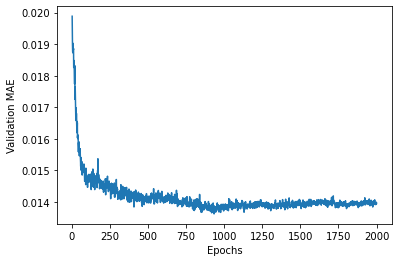

In [16]:
#plotting full mae history
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

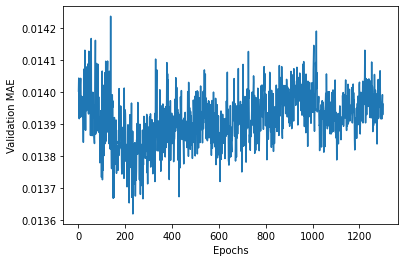

In [17]:
#plotting truncated MAE history
truncated_mae_history = average_mae_history[700:15000]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [18]:
#getting the epoch number of lowest mean average MAE
min_mean_average_mae=np.amin(average_mae_history)
best_epoch_number=average_mae_history.index(min_mean_average_mae)+1
print ('best_epoch_number:',best_epoch_number)

best_epoch_number: 933


learning_rate 0.001
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 99)                5544      
_________________________________________________________________
dense_25 (Dense)             (None, 73)                7300      
_________________________________________________________________
dense_26 (Dense)             (None, 63)                4662      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                640       
_________________________________________________________________
dense_28 (Dense)             (None, 41)                451       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 42        
Total params: 18,639
Trainable params: 18,639
Non-trainable params: 0
______________________________

222/222 - 1s - loss: 1.2472e-06 - mae: 8.3946e-04
Epoch 120/933
222/222 - 1s - loss: 3.9790e-06 - mae: 0.0015
Epoch 121/933
222/222 - 1s - loss: 2.5499e-06 - mae: 0.0012
Epoch 122/933
222/222 - 1s - loss: 9.8824e-07 - mae: 7.4180e-04
Epoch 123/933
222/222 - 1s - loss: 1.1381e-06 - mae: 7.6982e-04
Epoch 124/933
222/222 - 1s - loss: 3.1400e-06 - mae: 0.0013
Epoch 125/933
222/222 - 1s - loss: 1.3380e-06 - mae: 8.6062e-04
Epoch 126/933
222/222 - 1s - loss: 1.5349e-06 - mae: 8.9503e-04
Epoch 127/933
222/222 - 1s - loss: 9.6422e-07 - mae: 7.2912e-04
Epoch 128/933
222/222 - 1s - loss: 1.2382e-06 - mae: 8.4216e-04
Epoch 129/933
222/222 - 1s - loss: 2.9114e-06 - mae: 0.0012
Epoch 130/933
222/222 - 1s - loss: 2.2579e-06 - mae: 0.0011
Epoch 131/933
222/222 - 1s - loss: 2.4599e-06 - mae: 0.0012
Epoch 132/933
222/222 - 1s - loss: 1.5029e-06 - mae: 9.1832e-04
Epoch 133/933
222/222 - 1s - loss: 1.0360e-06 - mae: 7.5080e-04
Epoch 134/933
222/222 - 1s - loss: 1.3265e-06 - mae: 8.5011e-04
Epoch 135/933


Epoch 249/933
222/222 - 1s - loss: 6.0260e-07 - mae: 5.7528e-04
Epoch 250/933
222/222 - 1s - loss: 7.9778e-07 - mae: 6.1809e-04
Epoch 251/933
222/222 - 1s - loss: 1.5459e-06 - mae: 9.1693e-04
Epoch 252/933
222/222 - 1s - loss: 7.7089e-07 - mae: 6.4546e-04
Epoch 253/933
222/222 - 1s - loss: 1.0863e-06 - mae: 7.7977e-04
Epoch 254/933
222/222 - 1s - loss: 6.8521e-07 - mae: 6.1750e-04
Epoch 255/933
222/222 - 1s - loss: 4.3655e-07 - mae: 4.8551e-04
Epoch 256/933
222/222 - 1s - loss: 7.1147e-07 - mae: 6.1116e-04
Epoch 257/933
222/222 - 1s - loss: 8.3363e-07 - mae: 6.8430e-04
Epoch 258/933
222/222 - 1s - loss: 7.9461e-07 - mae: 6.5675e-04
Epoch 259/933
222/222 - 1s - loss: 8.2078e-07 - mae: 6.6756e-04
Epoch 260/933
222/222 - 1s - loss: 6.9968e-07 - mae: 6.2955e-04
Epoch 261/933
222/222 - 1s - loss: 5.5340e-07 - mae: 5.4261e-04
Epoch 262/933
222/222 - 1s - loss: 4.8828e-07 - mae: 5.1792e-04
Epoch 263/933
222/222 - 1s - loss: 1.1748e-06 - mae: 8.1762e-04
Epoch 264/933
222/222 - 1s - loss: 2.589

222/222 - 1s - loss: 1.0563e-06 - mae: 7.4219e-04
Epoch 378/933
222/222 - 1s - loss: 7.9247e-07 - mae: 6.3490e-04
Epoch 379/933
222/222 - 1s - loss: 2.5756e-07 - mae: 3.7809e-04
Epoch 380/933
222/222 - 1s - loss: 6.6337e-07 - mae: 6.0353e-04
Epoch 381/933
222/222 - 1s - loss: 1.1159e-06 - mae: 7.4324e-04
Epoch 382/933
222/222 - 1s - loss: 3.5056e-07 - mae: 4.4640e-04
Epoch 383/933
222/222 - 1s - loss: 2.5055e-07 - mae: 3.7320e-04
Epoch 384/933
222/222 - 1s - loss: 3.0451e-07 - mae: 4.0309e-04
Epoch 385/933
222/222 - 1s - loss: 4.2753e-07 - mae: 4.9136e-04
Epoch 386/933
222/222 - 1s - loss: 8.5710e-07 - mae: 6.8291e-04
Epoch 387/933
222/222 - 1s - loss: 7.8648e-07 - mae: 6.5145e-04
Epoch 388/933
222/222 - 1s - loss: 4.1546e-07 - mae: 4.8125e-04
Epoch 389/933
222/222 - 1s - loss: 8.1555e-07 - mae: 6.5558e-04
Epoch 390/933
222/222 - 1s - loss: 2.3857e-07 - mae: 3.6269e-04
Epoch 391/933
222/222 - 1s - loss: 5.5864e-07 - mae: 5.3532e-04
Epoch 392/933
222/222 - 1s - loss: 1.3393e-06 - mae: 8

Epoch 506/933
222/222 - 1s - loss: 6.2604e-07 - mae: 5.9089e-04
Epoch 507/933
222/222 - 1s - loss: 2.1919e-07 - mae: 3.4602e-04
Epoch 508/933
222/222 - 1s - loss: 2.2220e-07 - mae: 3.5003e-04
Epoch 509/933
222/222 - 1s - loss: 3.4607e-07 - mae: 4.1443e-04
Epoch 510/933
222/222 - 1s - loss: 2.5076e-06 - mae: 0.0012
Epoch 511/933
222/222 - 1s - loss: 3.3870e-07 - mae: 4.1974e-04
Epoch 512/933
222/222 - 1s - loss: 1.8576e-07 - mae: 3.1067e-04
Epoch 513/933
222/222 - 1s - loss: 1.9811e-07 - mae: 3.3091e-04
Epoch 514/933
222/222 - 1s - loss: 1.8669e-07 - mae: 3.1766e-04
Epoch 515/933
222/222 - 1s - loss: 2.7918e-07 - mae: 3.8012e-04
Epoch 516/933
222/222 - 1s - loss: 3.6192e-07 - mae: 4.4984e-04
Epoch 517/933
222/222 - 1s - loss: 3.4441e-07 - mae: 4.3606e-04
Epoch 518/933
222/222 - 1s - loss: 2.0481e-07 - mae: 3.3257e-04
Epoch 519/933
222/222 - 1s - loss: 3.5036e-07 - mae: 4.5458e-04
Epoch 520/933
222/222 - 1s - loss: 3.3486e-07 - mae: 4.4061e-04
Epoch 521/933
222/222 - 1s - loss: 4.4271e-0

222/222 - 0s - loss: 1.1732e-07 - mae: 2.4973e-04
Epoch 635/933
222/222 - 1s - loss: 1.2577e-07 - mae: 2.6358e-04
Epoch 636/933
222/222 - 0s - loss: 4.0529e-07 - mae: 4.7638e-04
Epoch 637/933
222/222 - 0s - loss: 4.4993e-07 - mae: 4.9533e-04
Epoch 638/933
222/222 - 1s - loss: 1.1801e-06 - mae: 8.1767e-04
Epoch 639/933
222/222 - 0s - loss: 3.8424e-07 - mae: 4.1905e-04
Epoch 640/933
222/222 - 1s - loss: 1.2602e-07 - mae: 2.6105e-04
Epoch 641/933
222/222 - 0s - loss: 1.1405e-07 - mae: 2.5123e-04
Epoch 642/933
222/222 - 0s - loss: 2.3268e-07 - mae: 3.5623e-04
Epoch 643/933
222/222 - 0s - loss: 3.3222e-07 - mae: 4.1359e-04
Epoch 644/933
222/222 - 0s - loss: 3.1874e-07 - mae: 4.1274e-04
Epoch 645/933
222/222 - 0s - loss: 2.1526e-07 - mae: 3.4513e-04
Epoch 646/933
222/222 - 0s - loss: 3.8458e-07 - mae: 4.5346e-04
Epoch 647/933
222/222 - 0s - loss: 8.7495e-07 - mae: 6.8514e-04
Epoch 648/933
222/222 - 0s - loss: 3.0653e-07 - mae: 4.1458e-04
Epoch 649/933
222/222 - 0s - loss: 4.7588e-07 - mae: 5

Epoch 763/933
222/222 - 0s - loss: 5.4591e-07 - mae: 5.5013e-04
Epoch 764/933
222/222 - 1s - loss: 3.0072e-07 - mae: 4.0572e-04
Epoch 765/933
222/222 - 1s - loss: 2.4476e-07 - mae: 3.6673e-04
Epoch 766/933
222/222 - 1s - loss: 1.3171e-07 - mae: 2.6978e-04
Epoch 767/933
222/222 - 1s - loss: 3.2394e-07 - mae: 4.0872e-04
Epoch 768/933
222/222 - 1s - loss: 1.7053e-07 - mae: 3.0995e-04
Epoch 769/933
222/222 - 1s - loss: 6.6101e-07 - mae: 5.8357e-04
Epoch 770/933
222/222 - 1s - loss: 2.9614e-07 - mae: 4.0990e-04
Epoch 771/933
222/222 - 1s - loss: 3.4623e-07 - mae: 4.2827e-04
Epoch 772/933
222/222 - 0s - loss: 2.5556e-07 - mae: 3.7867e-04
Epoch 773/933
222/222 - 0s - loss: 6.5441e-07 - mae: 5.6788e-04
Epoch 774/933
222/222 - 0s - loss: 2.1168e-07 - mae: 3.3107e-04
Epoch 775/933
222/222 - 0s - loss: 1.2485e-07 - mae: 2.6139e-04
Epoch 776/933
222/222 - 0s - loss: 2.6523e-07 - mae: 3.7524e-04
Epoch 777/933
222/222 - 0s - loss: 2.9781e-07 - mae: 3.8654e-04
Epoch 778/933
222/222 - 0s - loss: 4.846

222/222 - 0s - loss: 1.4478e-07 - mae: 2.8177e-04
Epoch 892/933
222/222 - 1s - loss: 2.4771e-07 - mae: 3.7235e-04
Epoch 893/933
222/222 - 1s - loss: 1.8722e-07 - mae: 3.2183e-04
Epoch 894/933
222/222 - 1s - loss: 1.9842e-07 - mae: 3.3469e-04
Epoch 895/933
222/222 - 1s - loss: 3.9959e-07 - mae: 4.6525e-04
Epoch 896/933
222/222 - 0s - loss: 3.2095e-07 - mae: 4.2756e-04
Epoch 897/933
222/222 - 1s - loss: 3.7882e-07 - mae: 4.5580e-04
Epoch 898/933
222/222 - 0s - loss: 3.0730e-07 - mae: 3.9487e-04
Epoch 899/933
222/222 - 1s - loss: 3.9199e-07 - mae: 4.4236e-04
Epoch 900/933
222/222 - 0s - loss: 1.4756e-07 - mae: 2.8279e-04
Epoch 901/933
222/222 - 0s - loss: 1.7657e-07 - mae: 3.0831e-04
Epoch 902/933
222/222 - 0s - loss: 1.6823e-07 - mae: 3.0258e-04
Epoch 903/933
222/222 - 0s - loss: 2.9666e-07 - mae: 4.0106e-04
Epoch 904/933
222/222 - 0s - loss: 8.1702e-07 - mae: 6.4721e-04
Epoch 905/933
222/222 - 0s - loss: 2.9239e-07 - mae: 4.0074e-04
Epoch 906/933
222/222 - 1s - loss: 9.5746e-08 - mae: 2

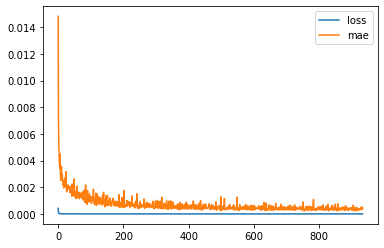

In [19]:
model = build_model(parameters)
history= model.fit(train_data, train_targets,epochs=best_epoch_number,
          batch_size=batch_size, verbose=2)
pd.DataFrame(history.history).plot()
plt.show()

In [24]:
# this saves the model that is used to generate the figures for thesis

model.save('model_A')


INFO:tensorflow:Assets written to: model_A\assets


In [27]:
# this loads the model you just saved above

model_saved = tf.keras.models.load_model("model_A")

In [20]:
#this function will plot crossplots
from sklearn.metrics import mean_absolute_percentage_error
import statistics
from matplotlib.ticker import MaxNLocator

def plot(y,ypred):
    
    #the following will get the shape of the input ytest or ypred
    x=([len(l) for l in ypred])[1]
    for i in range(0,x):
        plt.rcParams["figure.figsize"] = (5,5) #change the figure size here
        a = plt.axes(aspect='equal')
        plt.scatter(y[:,i], ypred[:,i],marker='s',color='b')
        plt.xlabel('Cum. CO2 simulation (1e9 m3)')
        plt.ylabel('Cum. CO2 ANN (1e9 m3)')
        ls = [0, np.amax(y[:,i])]
        plt.xlim(ls)
        plt.ylim(ls)
        _ = plt.plot(ls, ls, color='red')
        
        #plt.figure(figsize=(5,5))
        
        size=12
        large_size=15

        plt.rc('font', size=size)        
        plt.rc('axes', titlesize=size)   
        plt.rc('axes', labelsize=size)  
        #plt.rc('xtick', labelsize=size)   
        #plt.rc('ytick', labelsize=size)   
        plt.rc('legend', fontsize=size)   
        plt.rc('figure', titlesize=large_size) 
        
        plt.grid(False)
        
        plt.suptitle('Model A')
        
        
        plt.savefig('figure_cross_plot_model_A.png',dpi=330, bbox_inches='tight')
        
        
        plt.show()
        
def metrcs(y,ypred):
    #the following will get the shape of the input ytest or ypred
    x=([len(a) for a in ypred])[1]
    
    for i in range(0,x):
        MAE=metrics.mean_absolute_error(y[:,i],ypred[:,i])
        R2=metrics.r2_score(y[:,i],ypred[:,i])
        MAPE=metrics.mean_absolute_percentage_error(y[:,i],ypred[:,i])
        print ('MAE=',MAE,'R2=',R2, "MAPE=",MAPE)
        
def relative_error(y,ypred):
    
    x=([len(l) for l in ypred])[1]
    for i in range(0,x):
        error=abs(y[:,i]-ypred[:,i])/y[:,i]
        min_error=np.amin(error)
        mean=np.mean(error)
        median=np.median(error)
        max_error=np.amax(error)
        std_dev=statistics.stdev(error)
        print('min=',min_error,'mean=',mean,'median=',median,'max=',max_error, "std_dev=",std_dev)
        plt.rcParams["figure.figsize"] = (5,5) 
        plt.scatter(np.arange(1,len(y)+1).reshape(len(y),1), error,marker='o', color='r', s=50)
        plt.xlabel('Test data points')
        plt.ylabel('Absolute relative error')
        lsy=[min_error, max_error]
        lsx=[0,len(y)+1]
        plt.xlim(lsx)
        plt.ylim(lsy)
        plt.grid(False)
        plt.suptitle('Model A')
        plt.savefig('figure_mean_rel_error_per_experiment_model_A.png',dpi=330, bbox_inches='tight')
        plt.show()
        plt.figure(5)
        plt.suptitle('Model A')
        plt.rcParams["figure.figsize"] = (5,5) 
        plt.grid(False)
        plt.hist(error, bins=50)
        plt.xlabel('Prediction Error')
        plt.xlim([min_error, max_error])
        plt.ylabel('Count')
        
        plt.savefig('figure_histogram_model_A.png',dpi=330, bbox_inches='tight')

def mean_relative_error(y,ypred):
    container=np.array([])
    x=([len(l) for l in ypred])[1]
    for i in range(0,x):
        error=abs(y[:,i]-ypred[:,i])/y[:,i]
        #this outer loop will loop over the timesteps
        for timestep in range(71):  
            #datasets contains 71 timestep each. inner loop will extract the same timesteps for all dataset
            #for ex: there are 20 data for testing dataset which have a timestep of 1
            for dataset in range(0,len(error),71): 
                container=np.append(container,error[timestep+dataset])
        mean_rel_err=np.array([])
        #this loop is for taking the average of the error at each timesteps
        #step size will be the total number of datapoints in each timestep. ex: for 20 dataset step size will be 20
        for i in range(0,len(container),int(len(container)/71.0)): 
            mean_rel_err=np.append(mean_rel_err,np.mean(container[i:i+int(len(container)/71.0),]))
        plt.figure(6)
        plt.rcParams["figure.figsize"] = (5,5) 
        plt.scatter(np.arange(1,72,1),mean_rel_err,c='r')
        plt.xlabel('Timestep number')
        plt.ylabel('Mean relative error')
        plt.grid(False)
        
        plt.show()
        
def mean_rel_error_per_experiment(y,ypred): #this function plots the mean error values with respect to experiment id 
    x=([len(l) for l in ypred])[1]
    for i in range(0,x):
        mean_rel_err=np.array([])
        error=abs(y[:,i]-ypred[:,i])/y[:,i]
        for i in range(0,len(error),71): 
            mean_rel_err=np.append(mean_rel_err,np.mean(error[i:i+71]))
        
        plt.figure(7)
        plt.rcParams["figure.figsize"] = (5,5) 
        plt.scatter(np.arange(1,len(error)/71+1,1),mean_rel_err,c='r')
        plt.xlabel('Experiment number')
        plt.ylabel('Mean relative error')
        plt.xticks(np.arange(1,len(error)/71+1,3))
        
        size=12
        large_size=15

        plt.rc('font', size=size)        
        #plt.rc('axes', titlesize=large_size)   
        #plt.rc('axes', labelsize=large_size)  
        plt.rc('xtick', labelsize=size)   
        #|plt.rc('ytick', labelsize=size)   
        plt.rc('legend', fontsize=size)   
        plt.rc('figure', titlesize=large_size) 
        plt.grid(False)
        
        plt.suptitle('Model A')
        
        
        plt.show()

In [ ]:
#train data pred and true values plotted

y_pred=model.predict(train_data)

plot(y,y_pred)
metrcs(y,y_pred)
relative_error(y,y_pred)
mean_relative_error(y,y_pred)
mean_rel_error_per_experiment(y,y_pred)

In [ ]:
y_test_pred = model.predict(test_data)

plot(y_test_actual,y_test_pred)
metrcs(y_test_actual,y_test_pred)
relative_error(y_test_actual,y_test_pred)
mean_relative_error(y_test_actual,y_test_pred)
mean_rel_error_per_experiment(y_test_actual,y_test_pred)

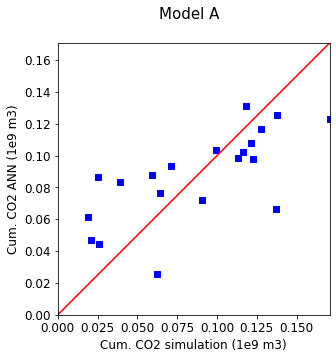

MAE= 0.026910314343496704 R2= 0.48271391233103333 MAPE= 0.5670022713835372
min= 0.040585264439283626 mean= 0.5670022713835372 median= 0.24092688337998674 max= 2.464735143972723 std_dev= 0.7054787315313461


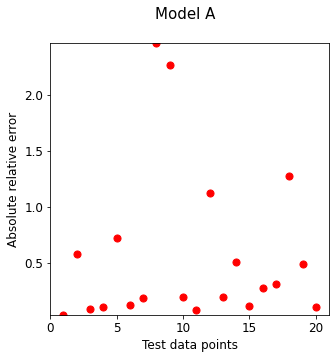

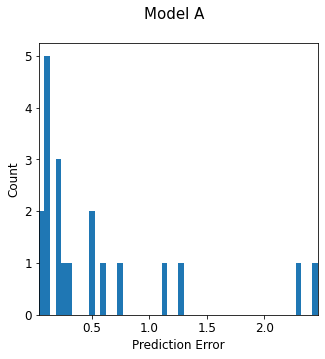

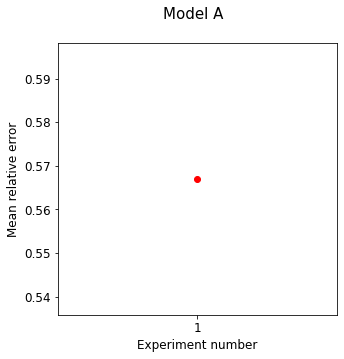

In [26]:
#prediction of last timesteps
y_test_last_timesteps_pred = model.predict(test_last_timesteps_data)

plot(test_last_timesteps_actual,y_test_last_timesteps_pred)
metrcs(test_last_timesteps_actual,y_test_last_timesteps_pred)
relative_error(test_last_timesteps_actual,y_test_last_timesteps_pred)
#mean_relative_error(test_last_timesteps_actual,y_test_last_timesteps_pred)
mean_rel_error_per_experiment(test_last_timesteps_actual,y_test_last_timesteps_pred)

#convert to dataframe and print out to csv file

actual=pd.DataFrame(test_last_timesteps_actual)
predicted=pd.DataFrame(y_test_last_timesteps_pred)

actual.columns=['actual_values']
predicted.columns=['predicted_values']

merged=pd.concat([actual, predicted], axis=1)

merged.to_excel('actual_predicted_model_a.xlsx')

In [ ]:
#this cell is for reading the files. it makes the computation way faster than reading the files inside the function

import pandas as pd
import numpy as np
from math import sqrt
import math

permxpor_file=pd.read_csv('perm_x_por_sum.csv')
permxpor_file=permxpor_file[['i','j','permxpor']].to_numpy() 

boundary_grid_file=pd.read_csv('boundary_grid.csv')
boundary_grid_file=boundary_grid_file[['I','J']].to_numpy()

boundary_file=pd.read_csv('boundary_constraint.csv')
boundary_file=boundary_file[['I','J','boundary_with_fault_zones']].to_numpy()

In [ ]:
"""Generator functions starts here!!!"""
def boundary_constraint(params,boundary_file): 
    constraint = np.array([])
    for out in range(0,3,2):  #out iterates between inj and pro grid numbers
        for rows in range(len(boundary_file)):
            if round(params[out+1])==boundary_file[rows,1]: #compare j values
            #print (perm[rows])
                if round(params[out])==boundary_file[rows,0]:
                    constraint=np.append(constraint,boundary_file[rows,2])
    
    if sum(constraint)==2.0:
        multiplier=1.0
    else:
        multiplier=0.7  #these are the fitness multiplier to penalize out of boundary individuals
    
    return multiplier

def permxpor_generator(params,permxpor_file):
    permxpor_container = np.array([]) #empty array used as a container of permxpor
    for out in range(0,3,2):
        #print(out)#out iterates between inj and pro grid numbers
        for rows in range(len(permxpor_file)):
            #print (rows) #len function is working properly
            if round(params[out+1])==permxpor_file[rows,1]: #compare j values
                #print (permxpor_file[rows])
                if round(params[out])==permxpor_file[rows,0]: #compare i values
                    permxpor_container=np.append(permxpor_container,
                                                 permxpor_file[rows,2]) #return the matched permxpor value
                    
    return permxpor_container

#min distance generator for inj grid address only, if you want to make for pro grid one change the params in formula 
def min_distance_generator(params, boundary_grid_file): 
    distance_container=np.array([])
    for row in range(len(boundary_grid_file)):
        distance=sqrt((boundary_grid_file[row,0]-round(params[0]))**2+(boundary_grid_file[row,1]-round(params[1]))**2)
        distance_container=np.append(distance_container,distance)
    min_distance=np.amin(distance_container)
    
    return min_distance

def distance_generator(params):
    import math
    distance=math.sqrt((round(params[0])-round(params[2]))**2+(round(params[1]-round(params[3])))**2)
    return distance

"""Normalizer function starts here!!!"""

def normalizer(params):
    i_inj=(round(params[0])- 1.00)/(95.0- 1.00)
    j_inj=(round(params[1])- 1.00)/(152.00- 1.00)
    i_pro=(round(params[2])- 1.00)/(95.0- 1.00)
    j_pro=(round(params[3])- 1.00)/(152.00- 1.00)
    time=1.00
    params=np.array([i_inj,j_inj,i_pro,j_pro,time])
    return params

'''update the min max values'''
#           'i_inj',     'j_inj',       'i_pro',       j_pro'     'time'
#                0            1            2            3            4   
# min       1.000000     1.000000     1.000000     1.000000    31.000000      
# max      95.000000   152.000000    95.000000   152.000000  2161.000000   
 

def permxpor_normalizer(perms):
    perms[0]=(perms[0]-  41.106744 )/( 394.800930-  41.106744 ) 
    perms[1]=(perms[1]- 38.693733)/( 427.480096- 38.693733)
    
    return perms,

def min_distance_normalizer(min_distance):
    min_distance=(min_distance-0.000000)/( 35.777088-0.000000)
    return min_distance

def distance_normalizer(distance):
    distance=(distance-5.099020)/(159.062881-5.099020)
    return distance

'''update the min max values'''
#'perm_x_por_inj_sum','perm_x_por_pro_sum','min_distance_inj','distance'
#                  5            6            7            8    
# min      41.106744    38.693733     0.000000     5.099020  
# max     394.800930   427.480096    35.777088   159.062881  

def converter_2(fitness_value):
    cum_co2=fitness_value*10**9
    return cum_co2


In [ ]:
#model trained without edge gridblocks. lhs_100_centered
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    print('The process began')
    
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)
    
    
    """this code written by me, start"""
    #iterator is required to iterate in elements of tuple logbook.select("max")
    iterator=0
    #create a numpy array for later use as container and write best individuals to csv file
    all_in_one=np.zeros([1,6])
    all_individuals=np.zeros([1,6])
    """this code written by me, end"""
    
    # Begin the generational process
    for gen in range(1, ngen + 1):
        
        """this code written by me, start"""
        #loop is for printing out the best ind and fitness values of each generation
        for ind in population:
            
            #here i want to print out all the individuals during the optimization
            tuple_ind=tuple(ind)
            tuple_fitness=tuple(ind.fitness.values)
            tuples_to_array=np.asarray((gen,)+tuple_ind+tuple_fitness)
            all_individuals=np.append(all_individuals,tuples_to_array.reshape(1,6),axis=0)
            
            if ind.fitness.values==logbook.select("max")[iterator]: 
                print('best_individual',ind,
                      'Fitness',ind.fitness.values)
                tuple1=tuple(ind) #convert individual into tuple
                tuple2=tuple(ind.fitness.values) #convert individual fitness into tuple
                tuple3=(gen-1,)+tuple1+tuple2 #combine generation, individual, fitnesses into one tuple
                to_array=np.asarray(tuple3)  #convert combined tuple into an array
                reshaped=np.reshape(to_array,(1,6)) #reshape array
                all_in_one=np.append(all_in_one,reshaped,axis=0) #add new values in a new row using axis=0 option
                break #print only one ind per best fitness
        iterator+=1
        """this code written by me, start"""
        
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)
    
    """this code written by me, start"""
    #print("sonunda",all_in_one)
    best_individuals = pd.DataFrame(all_in_one)
    all_individuals=pd.DataFrame(all_individuals)
    #print (all_in_one)
    all_individuals.columns=["generation","i_inj","j_inj","i_pro","j_pro","fitness_value"]
    best_individuals.columns = ["generation","i_inj","j_inj","i_pro","j_pro","fitness_value"]
    all_individuals.to_csv("all_individuals_lhs_maximin_centered_310_hptuned.csv")
    best_individuals.to_csv("best_individuals_lhs_maximin_centered_310_hptuned.csv")
    """this code written by me, end"""
    
    return population, logbook


# boundaries for layer size parameters:
# [layer_layer_1_size, hidden_layer_2_size, hidden_layer_3_size, hidden_layer_4_size]
BOUNDS_LOW =  [1,  1,   1,  1]
BOUNDS_HIGH = [95,  152,  95,  152]



NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants:
POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 3
CROWDING_FACTOR = 10.0  # crowding factor for crossover and mutation

# set the random seed:
RANDOM_SEED = 88
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax_lhs_maximin_centered_sample_100_shuffled", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual_lhs_maximin_centered_sample_100_shuffled", list,
               fitness=creator.FitnessMax_lhs_maximin_centered_sample_100_shuffled)

# define the layer_size_attributes individually:
for i in range(NUM_OF_PARAMS):
    # "layer_size_attribute_0", "layer_size_attribute_1", ...
    toolbox.register("layer_size_attribute_" + str(i),
                     random.uniform,
                     BOUNDS_LOW[i],
                     BOUNDS_HIGH[i])

# create a tuple containing an layer_size_attribute generator for each hidden layer:
layer_size_attributes = ()
for i in range(NUM_OF_PARAMS):
    layer_size_attributes = layer_size_attributes + \
                            (toolbox.__getattribute__("layer_size_attribute_" + str(i)),)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator",
                 tools.initCycle,
                 creator.Individual_lhs_maximin_centered_sample_100_shuffled,
                 layer_size_attributes,
                 n=1)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator",
                 tools.initRepeat,
                 list,
                 toolbox.individualCreator)


# fitness calculation
def accuracy(individual):
    multiplier=boundary_constraint(individual,boundary_file)
    perm_x_por=permxpor_generator(individual,permxpor_file)
    min_distance=min_distance_generator(individual, boundary_grid_file)
    distance=distance_generator(individual)
    
    #normalize all values
    perm_x_por=permxpor_normalizer(perm_x_por)
    min_distance=min_distance_normalizer(min_distance)
    distance=distance_normalizer(distance)
    individual=normalizer(individual)

    
    #append the values one by one
    individual=np.append(individual,perm_x_por)
    individual=np.append(individual,min_distance)
    individual=np.append(individual,distance)
    
    #reshape individual for ANN model
    individual=np.reshape(individual,(1,9))
    
    #evaluate the fitness function
    accuracy= model(individual)
    fitness=np.array(accuracy[:,0])*multiplier
    #print (multiplier,accuracy[:,0],"after multiplying fitness became",fitness)
    
    
    return fitness,


toolbox.register("evaluate", accuracy)

# genetic operators:mutFlipBit

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)

toolbox.register("mate",
                 tools.cxSimulatedBinaryBounded,
                 low=BOUNDS_LOW,
                 up=BOUNDS_HIGH,
                 eta=CROWDING_FACTOR)

toolbox.register("mutate",
                 tools.mutPolynomialBounded,
                 low=BOUNDS_LOW,
                 up=BOUNDS_HIGH,
                 eta=CROWDING_FACTOR,
                 indpb=1.0/NUM_OF_PARAMS)


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = eaSimpleWithElitism(population,
                                                      toolbox,
                                                      cxpb=P_CROSSOVER,
                                                      mutpb=P_MUTATION,
                                                      ngen=MAX_GENERATIONS,
                                                      stats=stats,
                                                      halloffame=hof,
                                                      verbose=True)
    #print all of the best solutions found:
    
    #for i in range(0,15):
     #   print (converter(hof.items[i]))
        
    
    # print info for best solution found:
    
       
    print("-- Best Individual = ", hof.items[0])
    print("-- Best Fitness--= ", hof.items[0].fitness.values[0])
    
    #print converted solutions here below
    
    best = hof.items[0]
    
    cum_co2 = converter_2(hof.items[0].fitness.values[0])
    print("-- Best Individual = ", best)
    print("-- Best Fitness-- Cumulative CO2 = ", cum_co2)

    # extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average fitness over Generations')

    plt.show()


if __name__ == "__main__":
    main()